# Generate Gene List for FunGen xQTL Analysis

## Overview
This analysis is trying to understand the functional pathway signals for the gene list we found from xQTL data. We are trying to answer the question -- we have limit genes overlapped with GVC and TWAS, does that true or we did incorrect analysis. For this, we need to answer it through: 
1. functional pathways enrichment 
    1. for GVC list -- to check the pathways for gold standard
    2. for genes in xQTL data we have -- to check the overview pathways we have;
    3. for specific genes in xQTL data only -- to check the additional pathways we have;
2. PPI analysis -- for the protein level evidence may show the indirect effect
3. Are xQTL-only genes missed by TWAS/GVC because they are tissue-specific/cell type specific? -- need to check the resource of those xQTL-only gene -- or aggregate
4. Identify if xQTL-only genes are regulators or targets in known gene regulatory circuits.
5. The prediction to disease? -- AUC

In [22]:
library(tidyverse)
library(data.table)

### load gene lists

In [23]:
TL1_sig_gene = fread("~/project/image_QTL/twas/TL1_gene_list.tsv", sep= '\t')

In [24]:
image_AD1_sig_gene = fread("~/project/image_QTL/twas/image_AD1_gene_list.tsv", sep= '\t')
image_AD2_sig_gene = fread("~/project/image_QTL/twas/image_AD2_gene_list.tsv", sep= '\t')
image_Aging1_sig_gene = fread("~/project/image_QTL/twas/image_Aging1_gene_list.tsv", sep= '\t')
image_Aging2_sig_gene = fread("~/project/image_QTL/twas/image_Aging2_gene_list.tsv", sep= '\t')
image_Aging3_sig_gene = fread("~/project/image_QTL/twas/image_Aging3_gene_list.tsv", sep= '\t')
image_Aging4_sig_gene = fread("~/project/image_QTL/twas/image_Aging4_gene_list.tsv", sep= '\t')
image_Aging5_sig_gene = fread("~/project/image_QTL/twas/image_Aging5_gene_list.tsv", sep= '\t')

In [25]:
TL1_AD1_Aging3 = union(intersect(TL1_sig_gene$gene_id, image_Aging3_sig_gene$gene_id), intersect(TL1_sig_gene$gene_id, image_AD1_sig_gene$gene_id)) |> unique()

In [26]:
TL1_AD1 = intersect(TL1_sig_gene$gene_id, image_AD1_sig_gene$gene_id) |> unique()

In [27]:
AD2_Aging4_sig_gene = union(image_AD2_sig_gene$gene_id, image_Aging4_sig_gene$gene_id) |> unique()

In [28]:
AD1_Aging5_sig_gene = union(image_AD1_sig_gene$gene_id, image_Aging5_sig_gene$gene_id)|> unique()

In [29]:
AD2_Aging2_sig_gene = union(image_AD2_sig_gene$gene_id, image_Aging2_sig_gene$gene_id)|> unique()

In [30]:
AD_sig_gene = union(image_AD1_sig_gene$gene_id, image_AD2_sig_gene$gene_id)|> unique()

In [31]:
AD2_Aging2_overlap_sig_gene <- intersect(image_AD2_sig_gene$gene_id,
                                         image_Aging2_sig_gene$gene_id) |> unique()


In [32]:
length(AD2_Aging2_overlap_sig_gene)

[1] 23

In [12]:
dim(TL1_sig_gene)

[1] 818   5

In [13]:
TL1_sig_gene = unique(TL1_sig_gene)

In [14]:
dim(TL1_sig_gene)

[1] 818   5

In [15]:
head(TL1_sig_gene)

#chr  start     end       gene_id         gene_name
1 chr10 103268872 105304950 ENSG00000065621          
2 chr10 102877569 104918184 ENSG00000107960          
3 chr10 103309698 105338465 ENSG00000148841          
4 chr10   3080000   7840000 ENSG00000108021          
5 chr10  92480000  97760000 ENSG00000119969          
6 chr11         0   3560000 ENSG00000177951

### image_dementia_xQTL list

In [33]:

library(clusterProfiler)
library(org.Hs.eg.db)


In [34]:
TL1_sig_gene_ego <- enrichGO(
  gene          = TL1_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [35]:
head(TL1_sig_gene_ego, n=5)

ID         Description                        GeneRatio BgRatio  
GO:0032200 GO:0032200 telomere organization              27/608    218/21261
GO:0016233 GO:0016233 telomere capping                   11/608    42/21261 
GO:0034502 GO:0034502 protein localization to chromosome 18/608    127/21261
GO:0006334 GO:0006334 nucleosome assembly                18/608    138/21261
GO:0034728 GO:0034728 nucleosome organization            19/608    160/21261
           pvalue       p.adjust     qvalue      
GO:0032200 1.682527e-10 7.122139e-07 6.765531e-07
GO:0016233 1.828783e-08 3.232484e-05 3.070633e-05
GO:0034502 2.290917e-08 3.232484e-05 3.070633e-05
GO:0006334 8.480296e-08 8.974273e-05 8.524929e-05
GO:0034728 1.695274e-07 1.435219e-04 1.363357e-04
           geneID                                                                                                                                                                                                                                                                                                                                                                                                                                         
GO:0032200 ENSG00000107960/ENSG00000178971/ENSG00000117748/ENSG00000101442/ENSG00000197409/ENSG00000197238/ENSG00000273542/ENSG00000128513/ENSG00000149311/ENSG00000257949/ENSG00000118655/ENSG00000145414/ENSG00000286522/ENSG00000273983/ENSG00000278828/ENSG00000197153/ENSG00000275126/ENSG00000275379/ENSG00000204569/ENSG00000147601/ENSG00000102977/ENSG00000258366/ENSG00000163806/ENSG00000164362/ENSG00000132604/ENSG00000132383/ENSG00000133302
GO:0016233 ENSG00000107960/ENSG00000178971/ENSG00000128513/ENSG00000149311/ENSG00000257949/ENSG00000118655/ENSG00000147601/ENSG00000102977/ENSG00000258366/ENSG00000163806/ENSG00000132604                                                                                                                                                                                                                                                                
GO:0034502 ENSG00000117748/ENSG00000197238/ENSG00000273542/ENSG00000128513/ENSG00000278463/ENSG00000275126/ENSG00000164808/ENSG00000147601/ENSG00000184445/ENSG00000102977/ENSG00000163806/ENSG00000063978/ENSG00000164362/ENSG00000124635/ENSG00000132604/ENSG00000132383/ENSG00000133302/ENSG00000176476                                                                                                                                                
GO:0006334 ENSG00000167670/ENSG00000180596/ENSG00000197409/ENSG00000197238/ENSG00000233822/ENSG00000273542/ENSG00000286522/ENSG00000276410/ENSG00000273802/ENSG00000273983/ENSG00000185130/ENSG00000278828/ENSG00000197153/ENSG00000274641/ENSG00000275126/ENSG00000275379/ENSG00000178021/ENSG00000124635                                                                                                                                                
GO:0034728 ENSG00000167670/ENSG00000180596/ENSG00000197409/ENSG00000197238/ENSG00000233822/ENSG00000273542/ENSG00000286522/ENSG00000276410/ENSG00000273802/ENSG00000273983/ENSG00000185130/ENSG00000278828/ENSG00000197153/ENSG00000274641/ENSG00000275126/ENSG00000275379/ENSG00000178021/ENSG00000124635/ENSG00000189308                                                                                                                                
           Count
GO:0032200 27   
GO:0016233 11   
GO:0034502 18   
GO:0006334 18   
GO:0034728 19

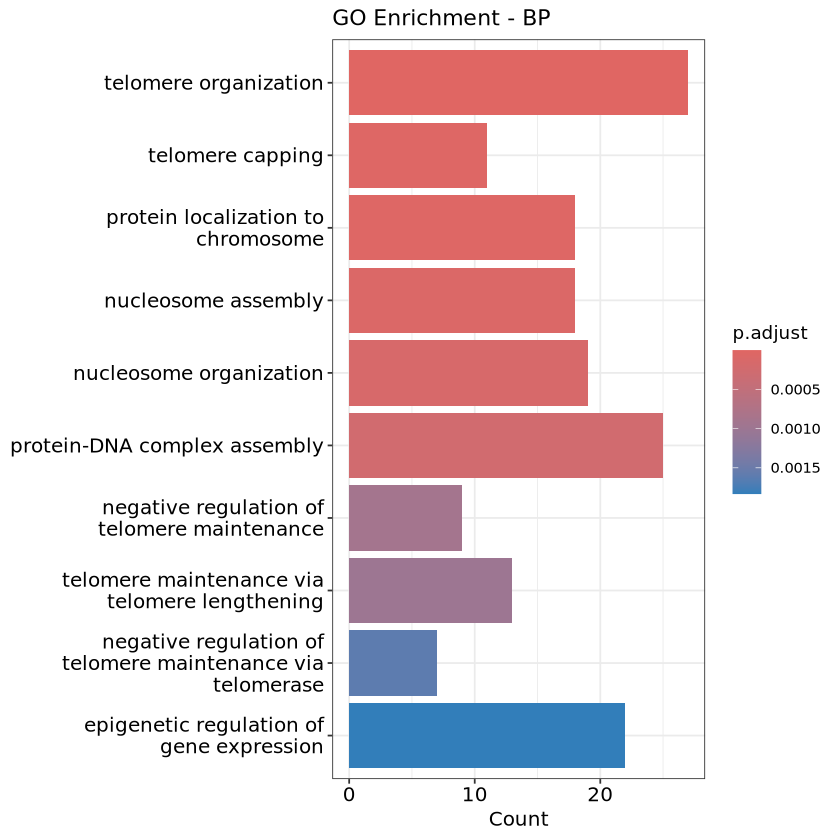

In [15]:
barplot(TL1_sig_gene_ego, showCategory = 10, title = "GO Enrichment - BP")

In [36]:
TL1_sig_gene_ego |> as.data.frame() |> filter(str_detect(Description, "cilium|microtubule|vesicle|tubulin"))

ID        
GO:0007020 GO:0007020
GO:0046785 GO:0046785
GO:0006891 GO:0006891
GO:0031109 GO:0031109
GO:0098693 GO:0098693
GO:0010968 GO:0010968
GO:0090063 GO:0090063
GO:1902018 GO:1902018
GO:0048193 GO:0048193
GO:0006890 GO:0006890
GO:0090043 GO:0090043
GO:0000301 GO:0000301
GO:0001578 GO:0001578
GO:0031116 GO:0031116
GO:1902850 GO:1902850
GO:0031122 GO:0031122
GO:0090042 GO:0090042
GO:0031112 GO:0031112
GO:0044458 GO:0044458
GO:0099003 GO:0099003
GO:1905515 GO:1905515
GO:0031113 GO:0031113
GO:0061512 GO:0061512
GO:0016079 GO:0016079
GO:1902017 GO:1902017
GO:0060271 GO:0060271
GO:0006906 GO:0006906
GO:0070507 GO:0070507
GO:1905508 GO:1905508
GO:0099504 GO:0099504
...        ...       
GO:0016050 GO:0016050
GO:0098927 GO:0098927
GO:0051315 GO:0051315
GO:0097494 GO:0097494
GO:0051988 GO:0051988
GO:0140112 GO:0140112
GO:0098876 GO:0098876
GO:0007018 GO:0007018
GO:0097479 GO:0097479
GO:0031338 GO:0031338
GO:0034453 GO:0034453
GO:0048278 GO:0048278
GO:0048207 GO:0048207
GO:0048208 GO:0048208
GO:0045724 GO:0045724
GO:0006888 GO:0006888
GO:0099022 GO:0099022
GO:0099518 GO:0099518
GO:0048199 GO:0048199
GO:0048488 GO:0048488
GO:0035459 GO:0035459
GO:0006901 GO:0006901
GO:0006904 GO:0006904
GO:0048489 GO:0048489
GO:2000300 GO:2000300
GO:0036465 GO:0036465
GO:0003341 GO:0003341
GO:0060294 GO:0060294
GO:0001539 GO:0001539
GO:0060285 GO:0060285
           Description                                                          
GO:0007020 microtubule nucleation                                               
GO:0046785 microtubule polymerization                                           
GO:0006891 intra-Golgi vesicle-mediated transport                               
GO:0031109 microtubule polymerization or depolymerization                       
GO:0098693 regulation of synaptic vesicle cycle                                 
GO:0010968 regulation of microtubule nucleation                                 
GO:0090063 positive regulation of microtubule nucleation                        
GO:1902018 negative regulation of cilium assembly                               
GO:0048193 Golgi vesicle transport                                              
GO:0006890 retrograde vesicle-mediated transport, Golgi to endoplasmic reticulum
GO:0090043 regulation of tubulin deacetylation                                  
GO:0000301 retrograde transport, vesicle recycling within Golgi                 
GO:0001578 microtubule bundle formation                                         
GO:0031116 positive regulation of microtubule polymerization                    
GO:1902850 microtubule cytoskeleton organization involved in mitosis            
GO:0031122 cytoplasmic microtubule organization                                 
GO:0090042 tubulin deacetylation                                                
GO:0031112 positive regulation of microtubule polymerization or depolymerization
GO:0044458 motile cilium assembly                                               
GO:0099003 vesicle-mediated transport in synapse                                
GO:1905515 non-motile cilium assembly                                           
GO:0031113 regulation of microtubule polymerization                             
GO:0061512 protein localization to cilium                                       
GO:0016079 synaptic vesicle exocytosis                                          
GO:1902017 regulation of cilium assembly                                        
GO:0060271 cilium assembly                                                      
GO:0006906 vesicle fusion                                                       
GO:0070507 regulation of microtubule cytoskeleton organization                  
GO:1905508 protein localization to microtubule organizing center                
GO:0099504 synaptic vesicle cycle                                               
...        ...                                                                  
GO:0016050 vesicle organization                        

In [16]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/TL1_GO_BP.png', width = 6, height = 6)

In [17]:
TL1_sig_gene_ego_cc <- enrichGO(
  gene          = TL1_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [18]:
head(TL1_sig_gene_ego_cc, n=5)

ID         Description                  GeneRatio BgRatio  
GO:0000781 GO:0000781 chromosome, telomeric region 27/639    199/22568
GO:0000786 GO:0000786 nucleosome                   21/639    137/22568
GO:0000782 GO:0000782 telomere cap complex         8/639     13/22568 
GO:0000783 GO:0000783 nuclear telomere cap complex 8/639     13/22568 
GO:0098687 GO:0098687 chromosomal region           39/639    444/22568
           pvalue       p.adjust     qvalue      
GO:0000781 1.644875e-11 8.882325e-09 8.137803e-09
GO:0000786 3.012338e-10 5.061151e-08 4.636922e-08
GO:0000782 4.491961e-10 5.061151e-08 4.636922e-08
GO:0000783 4.491961e-10 5.061151e-08 4.636922e-08
GO:0098687 4.686251e-10 5.061151e-08 4.636922e-08
           geneID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
GO:0000781 ENSG00000107960/ENSG00000178971/ENSG00000117748/ENSG00000197238/ENSG00000273542/ENSG00000128513/ENSG00000104738/ENSG00000149311/ENSG00000257949/ENSG00000118655/ENSG00000213639/ENSG00000276410/ENSG00000275126/ENSG00000204569/ENSG00000147601/ENSG00000102977/ENSG00000101596/ENSG00000258366/ENSG00000163806/ENSG00000164362/ENSG00000094916/ENSG00000132604/ENSG00000132383/ENSG00000133302/ENSG00000092203/ENSG00000183765/ENSG00000100242                                                                                                                                                                                                
GO:0000786 ENSG00000180596/ENSG00000197409/ENSG00000197238/ENSG00000233822/ENSG00000273542/ENSG00000198959/ENSG00000286522/ENSG00000276410/ENSG00000278463/ENSG00000273802/ENSG00000273983/ENSG00000185130/ENSG00000196747/ENSG00000197903/ENSG00000278828/ENSG00000197153/ENSG00000274641/ENSG00000275126/ENSG00000275379/ENSG00000124635/ENSG00000133302                                                                                                                                                                                                                                                                                                
GO:0000782 ENSG00000107960/ENSG00000178971/ENSG00000128513/ENSG00000257949/ENSG00000147601/ENSG00000102977/ENSG00000164362/ENSG00000132604                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
GO:0000783 ENSG00000107960/ENSG00000178971/ENSG00000128513/ENSG00000257949/ENSG00000147601/ENSG00000102977/ENSG00000164362/ENSG00000132604                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
GO:0098687 ENSG00000107960/ENSG00000119969/ENSG00000178971/ENSG00000117748/ENSG00000197238/ENSG00000273542/ENS

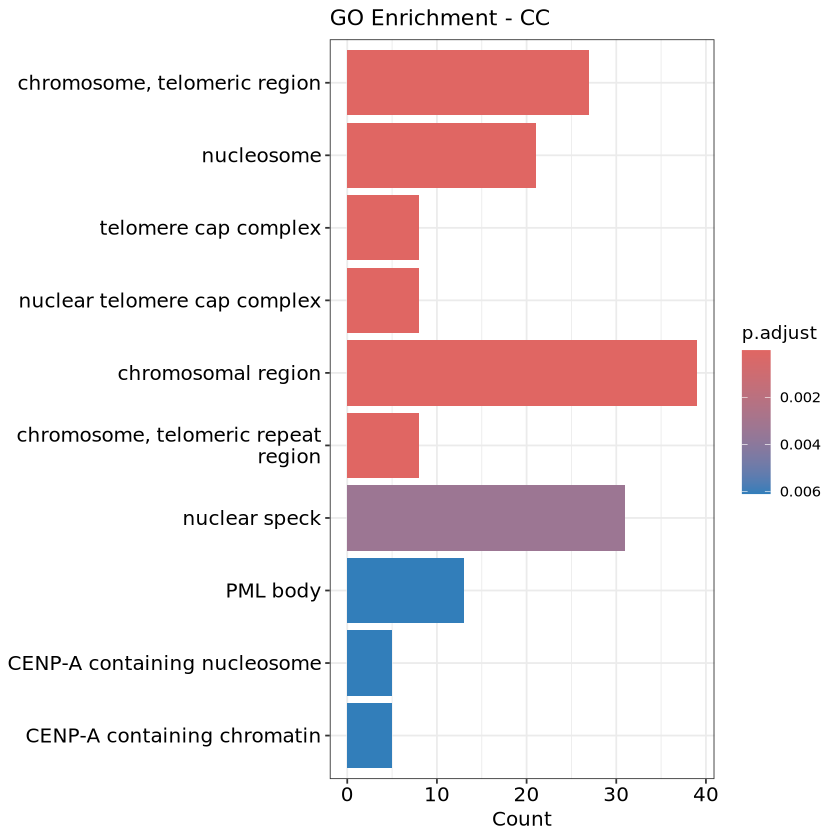

In [23]:
barplot(TL1_sig_gene_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [24]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/TL1_GO_CC.png', width = 6, height = 6)

In [25]:
TL1_sig_gene_ego_mf <- enrichGO(
  gene          = TL1_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [26]:
head(TL1_sig_gene_ego_mf, n=5)

ID         Description                                   GeneRatio
GO:0030527 GO:0030527 structural constituent of chromatin           19/636   
GO:0043047 GO:0043047 single-stranded telomeric DNA binding         7/636    
GO:0098847 GO:0098847 sequence-specific single stranded DNA binding 7/636    
GO:0098505 GO:0098505 G-rich strand telomeric DNA binding           6/636    
GO:0042162 GO:0042162 telomeric DNA binding                         10/636   
           BgRatio   pvalue       p.adjust     qvalue      
GO:0030527 101/21059 1.634238e-10 1.255095e-07 1.212777e-07
GO:0043047 12/21059  1.539659e-08 5.912290e-06 5.712945e-06
GO:0098847 15/21059  1.155618e-07 2.695066e-05 2.604196e-05
GO:0098505 10/21059  1.403680e-07 2.695066e-05 2.604196e-05
GO:0042162 40/21059  2.199851e-07 3.378971e-05 3.265042e-05
           geneID                                                                                                                                                                                                                                                                                                         
GO:0030527 ENSG00000180596/ENSG00000197409/ENSG00000197238/ENSG00000233822/ENSG00000273542/ENSG00000286522/ENSG00000276410/ENSG00000278463/ENSG00000273802/ENSG00000273983/ENSG00000185130/ENSG00000196747/ENSG00000197903/ENSG00000278828/ENSG00000197153/ENSG00000274641/ENSG00000275126/ENSG00000275379/ENSG00000124635
GO:0043047 ENSG00000107960/ENSG00000178971/ENSG00000117748/ENSG00000128513/ENSG00000147601/ENSG00000132604/ENSG00000132383                                                                                                                                                                                                
GO:0098847 ENSG00000107960/ENSG00000178971/ENSG00000117748/ENSG00000128513/ENSG00000147601/ENSG00000132604/ENSG00000132383                                                                                                                                                                                                
GO:0098505 ENSG00000178971/ENSG00000117748/ENSG00000128513/ENSG00000147601/ENSG00000132604/ENSG00000132383                                                                                                                                                                                                                
GO:0042162 ENSG00000107960/ENSG00000178971/ENSG00000117748/ENSG00000128513/ENSG00000257949/ENSG00000147601/ENSG00000102977/ENSG00000164362/ENSG00000132604/ENSG00000132383                                                                                                                                                
           Count
GO:0030527 19   
GO:0043047  7   
GO:0098847  7   
GO:0098505  6   
GO:0042162 10

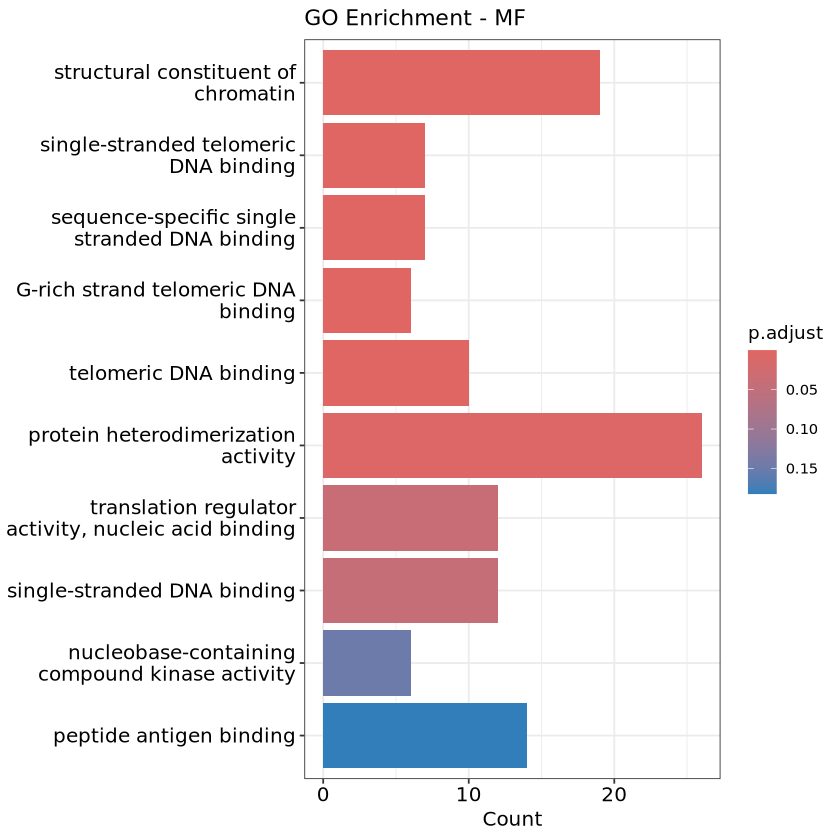

In [27]:
barplot(TL1_sig_gene_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [28]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/TL1_GO_MF.png', width = 6, height = 6)

### TL1_AD1_Aging3_xQTL list

In [29]:
TL1_AD1_Aging3_ego <- enrichGO(
  gene          = TL1_AD1_Aging3,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [30]:
head(TL1_AD1_Aging3_ego, n=5)

ID         Description                                              
GO:0007052 GO:0007052 mitotic spindle organization                             
GO:1902850 GO:1902850 microtubule cytoskeleton organization involved in mitosis
GO:0006751 GO:0006751 glutathione catabolic process                            
GO:0033504 GO:0033504 floor plate development                                  
GO:1901748 GO:1901748 leukotriene D4 metabolic process                         
           GeneRatio BgRatio   pvalue      p.adjust  qvalue  
GO:0007052 2/12      146/21261 0.002954671 0.1124278 0.074632
GO:1902850 2/12      180/21261 0.004449241 0.1124278 0.074632
GO:0006751 1/12      10/21261  0.005631012 0.1124278 0.074632
GO:0033504 1/12      11/21261  0.006192512 0.1124278 0.074632
GO:1901748 1/12      11/21261  0.006192512 0.1124278 0.074632
           geneID                          Count
GO:0007052 ENSG00000100242/ENSG00000047849 2    
GO:1902850 ENSG00000100242/ENSG00000047849 2    
GO:0006751 ENSG00000131067                 1    
GO:0033504 ENSG00000100211                 1    
GO:1901748 ENSG00000131067                 1

In [31]:
TL1_AD1_Aging3_ego %>% as.data.frame |> filter(str_detect(Description, "cilium|vesicle"))

ID         Description                              GeneRatio
GO:0098693 GO:0098693 regulation of synaptic vesicle cycle     1/12     
GO:1902855 GO:1902855 regulation of non-motile cilium assembly 1/12     
GO:1902018 GO:1902018 negative regulation of cilium assembly   1/12     
GO:0060271 GO:0060271 cilium assembly                          2/12     
GO:0044782 GO:0044782 cilium organization                      2/12     
GO:1905515 GO:1905515 non-motile cilium assembly               1/12     
GO:1902017 GO:1902017 regulation of cilium assembly            1/12     
GO:0016079 GO:0016079 synaptic vesicle exocytosis              1/12     
GO:0099504 GO:0099504 synaptic vesicle cycle                   1/12     
GO:0099003 GO:0099003 vesicle-mediated transport in synapse    1/12     
           BgRatio   pvalue      p.adjust  qvalue    
GO:0098693 13/21261  0.007314639 0.1124278 0.07463200
GO:1902855 13/21261  0.007314639 0.1124278 0.07463200
GO:1902018 19/21261  0.010674056 0.1124278 0.07463200
GO:0060271 396/21261 0.020187007 0.1124278 0.07463200
GO:0044782 425/21261 0.023045852 0.1124278 0.07463200
GO:1905515 70/21261  0.038811175 0.1182297 0.07848346
GO:1902017 75/21261  0.041529852 0.1182297 0.07848346
GO:0016079 98/21261  0.053945212 0.1345600 0.08932383
GO:0099504 216/21261 0.115354915 0.1815276 0.12050193
GO:0099003 241/21261 0.127886864 0.1850522 0.12284164
           geneID                          Count
GO:0098693 ENSG00000101152                 1    
GO:1902855 ENSG00000047849                 1    
GO:1902018 ENSG00000047849                 1    
GO:0060271 ENSG00000100211/ENSG00000047849 2    
GO:0044782 ENSG00000100211/ENSG00000047849 2    
GO:1905515 ENSG00000047849                 1    
GO:1902017 ENSG00000047849                 1    
GO:0016079 ENSG00000101152                 1    
GO:0099504 ENSG00000101152                 1    
GO:0099003 ENSG00000101152                 1

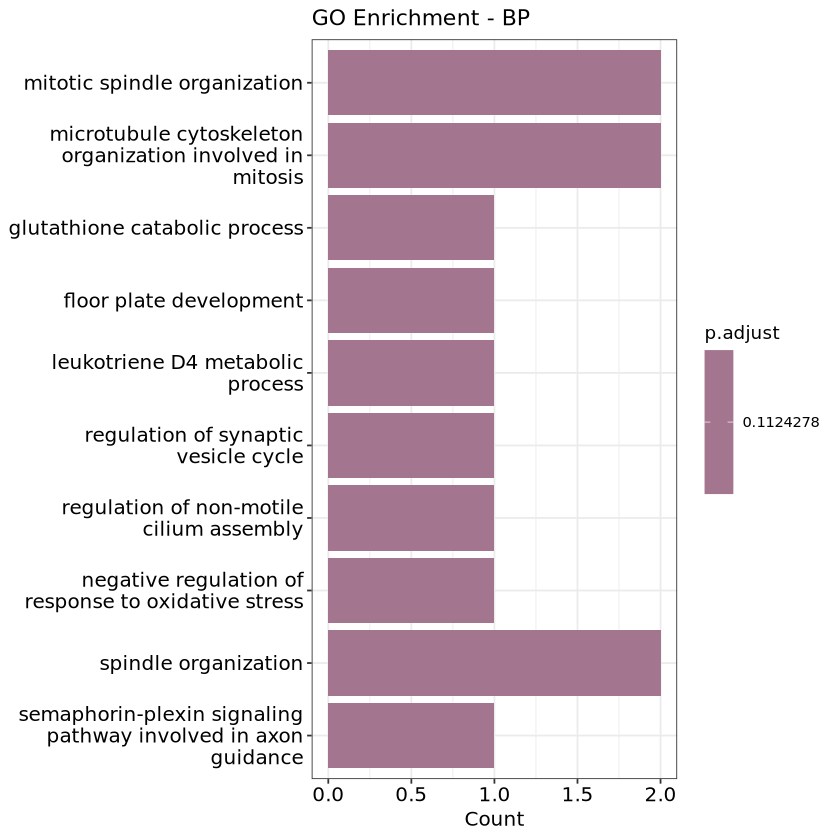

In [32]:
barplot(TL1_AD1_Aging3_ego, showCategory = 10, title = "GO Enrichment - BP")

In [33]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/TL1_AD1_Aging3_GO_BP.png', width = 6, height = 6)

In [34]:
TL1_AD1_Aging3_ego_cc <- enrichGO(
  gene          = TL1_AD1_Aging3,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [35]:
head(TL1_AD1_Aging3_ego_cc, n=5)

ID         Description                                           
GO:0002116 GO:0002116 semaphorin receptor complex                           
GO:0034992 GO:0034992 microtubule organizing center attachment site         
GO:0034993 GO:0034993 meiotic nuclear membrane microtubule tethering complex
GO:0106083 GO:0106083 nuclear membrane protein complex                      
GO:0106094 GO:0106094 nuclear membrane microtubule tethering complex        
           GeneRatio BgRatio  pvalue      p.adjust   qvalue     geneID         
GO:0002116 1/13      11/22568 0.006319583 0.05316885 0.03938434 ENSG00000164050
GO:0034992 1/13      11/22568 0.006319583 0.05316885 0.03938434 ENSG00000100242
GO:0034993 1/13      11/22568 0.006319583 0.05316885 0.03938434 ENSG00000100242
GO:0106083 1/13      11/22568 0.006319583 0.05316885 0.03938434 ENSG00000100242
GO:0106094 1/13      11/22568 0.006319583 0.05316885 0.03938434 ENSG00000100242
           Count
GO:0002116 1    
GO:0034992 1    
GO:0034993 1    
GO:0106083 1    
GO:0106094 1

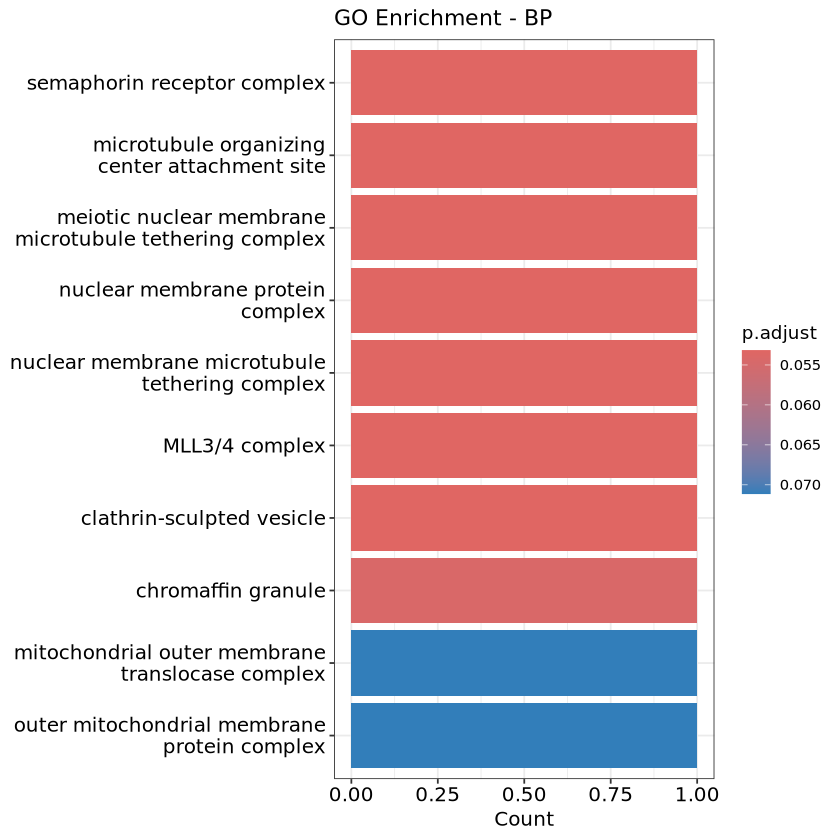

In [36]:
barplot(TL1_AD1_Aging3_ego_cc, showCategory = 10, title = "GO Enrichment - BP")

In [37]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/TL1_AD1_Aging3_GO_CC.png', width = 6, height = 6)

In [38]:
TL1_AD1_Aging3_ego_mf <- enrichGO(
  gene          = TL1_AD1_Aging3,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [39]:
head(TL1_AD1_Aging3_ego_mf, n=10)

ID         Description                            GeneRatio
GO:0017154 GO:0017154 semaphorin receptor activity           1/13     
GO:0043008 GO:0043008 ATP-dependent protein binding          1/13     
GO:0005521 GO:0005521 lamin binding                          1/13     
GO:0008242 GO:0008242 omega peptidase activity               1/13     
GO:0046965 GO:0046965 nuclear retinoid X receptor binding    1/13     
GO:0032794 GO:0032794 GTPase activating protein binding      1/13     
GO:0008017 GO:0008017 microtubule binding                    2/13     
GO:0030215 GO:0030215 semaphorin receptor binding            1/13     
GO:0003713 GO:0003713 transcription coactivator activity     2/13     
GO:0042974 GO:0042974 nuclear retinoic acid receptor binding 1/13     
           BgRatio   pvalue      p.adjust   qvalue    
GO:0017154 12/21059  0.007384582 0.05410013 0.02847375
GO:0043008 13/21059  0.007997686 0.05410013 0.02847375
GO:0005521 16/21059  0.009834901 0.05410013 0.02847375
GO:0008242 17/21059  0.010446608 0.05410013 0.02847375
GO:0046965 17/21059  0.010446608 0.05410013 0.02847375
GO:0032794 19/21059  0.011668976 0.05410013 0.02847375
GO:0008017 289/21059 0.013248548 0.05410013 0.02847375
GO:0030215 24/21059  0.014718798 0.05410013 0.02847375
GO:0003713 321/21059 0.016169834 0.05410013 0.02847375
GO:0042974 28/21059  0.017152399 0.05410013 0.02847375
           geneID                          Count
GO:0017154 ENSG00000164050                 1    
GO:0043008 ENSG00000101152                 1    
GO:0005521 ENSG00000100242                 1    
GO:0008242 ENSG00000131067                 1    
GO:0046965 ENSG00000198646                 1    
GO:0032794 ENSG00000164050                 1    
GO:0008017 ENSG00000100242/ENSG00000047849 2    
GO:0030215 ENSG00000164050                 1    
GO:0003713 ENSG00000198646/ENSG00000100201 2    
GO:0042974 ENSG00000198646                 1

In [40]:
# MAP1LC3A, SUN2, KIF9, MAP4, SETD2-tubulin binding

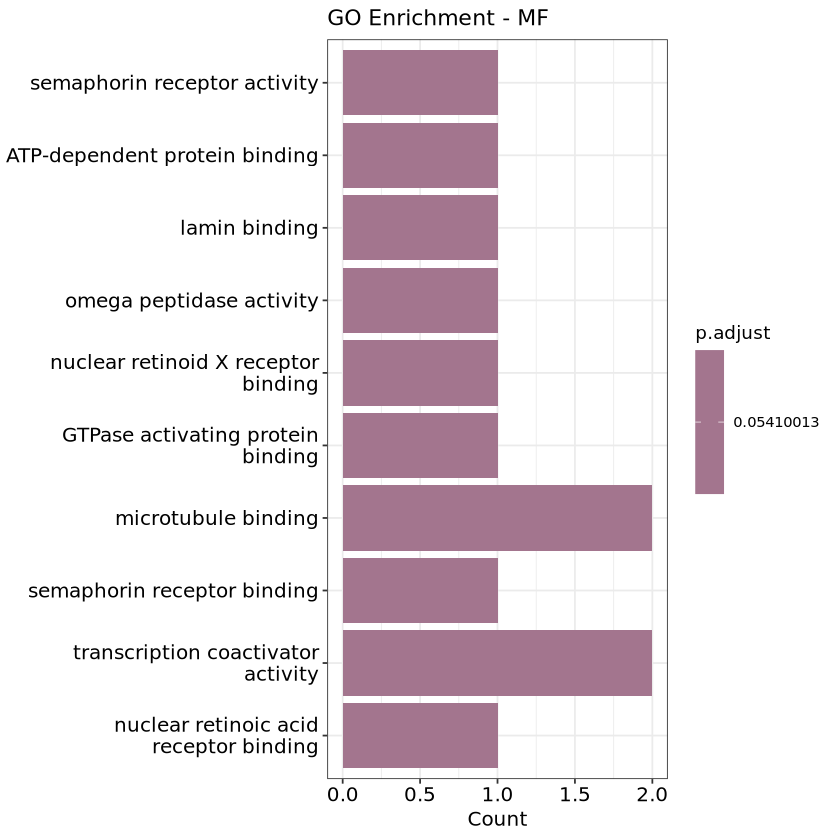

In [41]:
barplot(TL1_AD1_Aging3_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [42]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/TL1_AD1_Aging3_GO_MF.png', width = 6, height = 6)

### TL1_AD1 list

In [43]:
TL1_AD1_ego <- enrichGO(
  gene          = TL1_AD1,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [44]:
head(TL1_AD1_ego, n=5)

ID        
GO:1902855 GO:1902855
GO:1902287 GO:1902287
GO:0061430 GO:0061430
GO:1902285 GO:1902285
GO:0033689 GO:0033689
           Description                                                               
GO:1902855 regulation of non-motile cilium assembly                                  
GO:1902287 semaphorin-plexin signaling pathway involved in axon guidance             
GO:0061430 bone trabecula morphogenesis                                              
GO:1902285 semaphorin-plexin signaling pathway involved in neuron projection guidance
GO:0033689 negative regulation of osteoblast proliferation                           
           GeneRatio BgRatio  pvalue      p.adjust   qvalue     
GO:1902855 1/3       13/21261 0.001833309 0.02981191 0.007409393
GO:1902287 1/3       14/21261 0.001974240 0.02981191 0.007409393
GO:0061430 1/3       16/21261 0.002256062 0.02981191 0.007409393
GO:1902285 1/3       16/21261 0.002256062 0.02981191 0.007409393
GO:0033689 1/3       18/21261 0.002537831 0.02981191 0.007409393
           geneID          Count
GO:1902855 ENSG00000047849 1    
GO:1902287 ENSG00000164050 1    
GO:0061430 ENSG00000164050 1    
GO:1902285 ENSG00000164050 1    
GO:0033689 ENSG00000164050 1

In [45]:
TL1_AD1_ego %>% as.data.frame |> filter(str_detect(Description, "cilium|vesicle"))

ID         Description                              GeneRatio
GO:1902855 GO:1902855 regulation of non-motile cilium assembly 1/3      
GO:1902018 GO:1902018 negative regulation of cilium assembly   1/3      
GO:1905515 GO:1905515 non-motile cilium assembly               1/3      
GO:1902017 GO:1902017 regulation of cilium assembly            1/3      
GO:0060271 GO:0060271 cilium assembly                          1/3      
GO:0044782 GO:0044782 cilium organization                      1/3      
           BgRatio   pvalue      p.adjust   qvalue      geneID          Count
GO:1902855 13/21261  0.001833309 0.02981191 0.007409393 ENSG00000047849 1    
GO:1902018 19/21261  0.002678696 0.02981191 0.007409393 ENSG00000047849 1    
GO:1905515 70/21261  0.009845217 0.03222071 0.008008071 ENSG00000047849 1    
GO:1902017 75/21261  0.010545964 0.03301345 0.008205098 ENSG00000047849 1    
GO:0060271 396/21261 0.054845206 0.06541136 0.016257208 ENSG00000047849 1    
GO:0044782 425/21261 0.058780895 0.06541136 0.016257208 ENSG00000047849 1

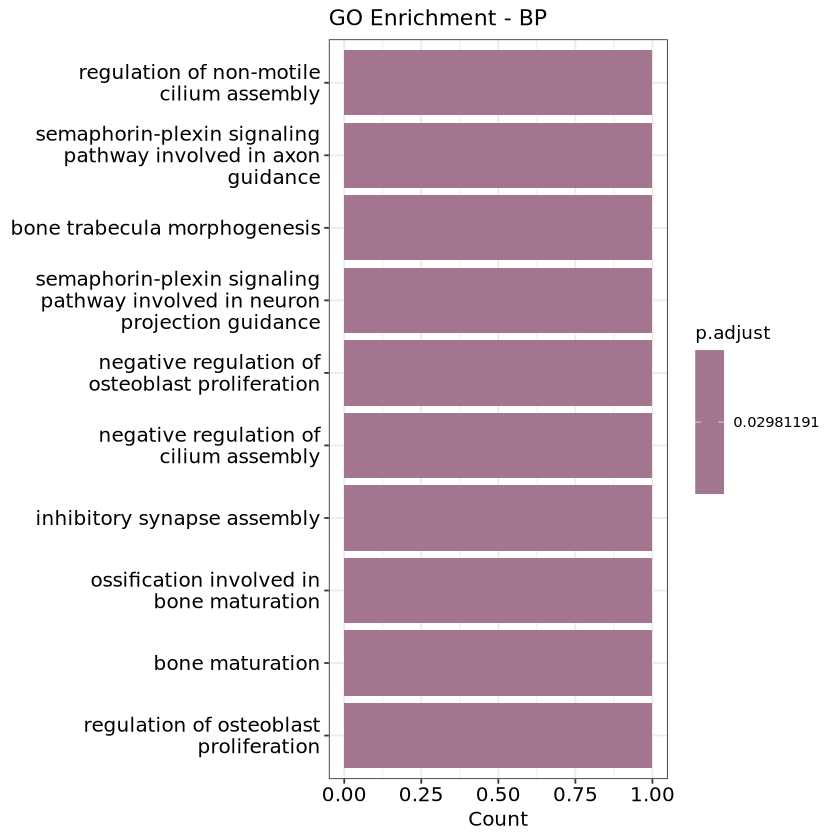

In [46]:
barplot(TL1_AD1_ego, showCategory = 10, title = "GO Enrichment - BP")

In [47]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/TL1_AD1_GO_BP.png', width = 6, height = 6)

In [48]:
TL1_AD1_ego_cc <- enrichGO(
  gene          = TL1_AD1,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [49]:
head(TL1_AD1_ego_cc, n=5)

ID         Description                    GeneRatio BgRatio  
GO:0002116 GO:0002116 semaphorin receptor complex    1/4       11/22568 
GO:0005875 GO:0005875 microtubule associated complex 1/4       165/22568
GO:0005930 GO:0005930 axoneme                        1/4       171/22568
GO:0097014 GO:0097014 ciliary plasm                  1/4       172/22568
GO:0072686 GO:0072686 mitotic spindle                1/4       211/22568
           pvalue      p.adjust   qvalue     geneID          Count
GO:0002116 0.001948368 0.01753531 0.00615274 ENSG00000164050 1    
GO:0005875 0.028927686 0.06638271 0.02329218 ENSG00000047849 1    
GO:0005930 0.029967633 0.06638271 0.02329218 ENSG00000047849 1    
GO:0097014 0.030140876 0.06638271 0.02329218 ENSG00000047849 1    
GO:0072686 0.036879283 0.06638271 0.02329218 ENSG00000047849 1

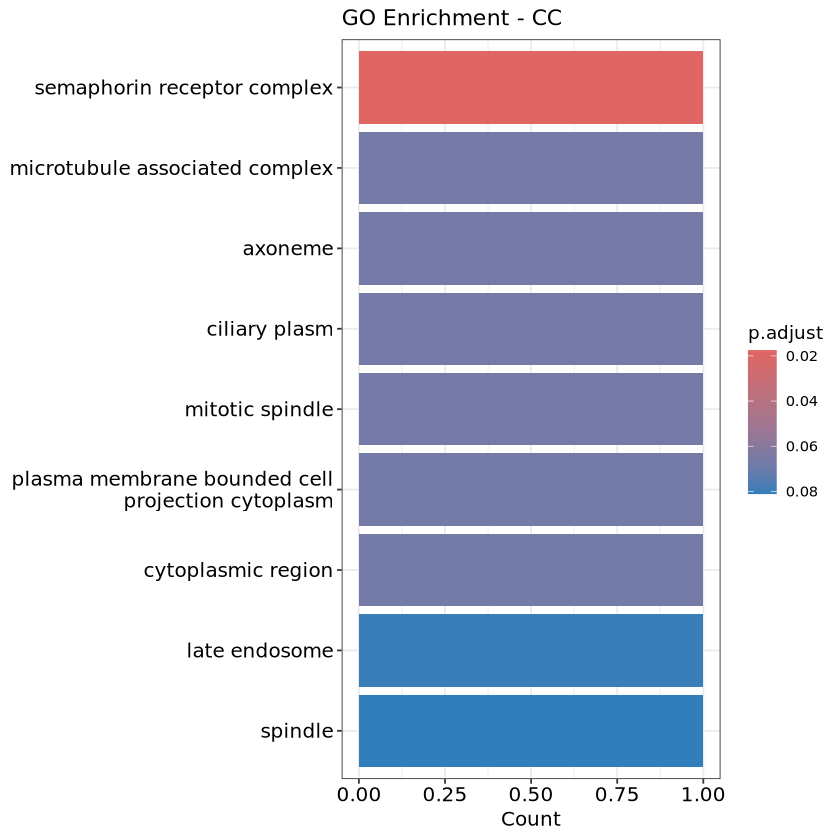

In [50]:
barplot(TL1_AD1_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [51]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/TL1_AD1_GO_CC.png', width = 6, height = 6)

In [52]:
TL1_AD1_ego_mf <- enrichGO(
  gene          = TL1_AD1,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [53]:
head(TL1_AD1_ego_mf, n=10)

ID         Description                                GeneRatio
GO:0017154 GO:0017154 semaphorin receptor activity               1/4      
GO:0032794 GO:0032794 GTPase activating protein binding          1/4      
GO:0030215 GO:0030215 semaphorin receptor binding                1/4      
GO:0005085 GO:0005085 guanyl-nucleotide exchange factor activity 1/4      
GO:0008017 GO:0008017 microtubule binding                        1/4      
GO:0005096 GO:0005096 GTPase activator activity                  1/4      
GO:0015631 GO:0015631 tubulin binding                            1/4      
           BgRatio   pvalue      p.adjust   qvalue      geneID          Count
GO:0017154 12/21059  0.002277525 0.01061937 0.004790692 ENSG00000164050 1    
GO:0032794 19/21059  0.003604284 0.01061937 0.004790692 ENSG00000164050 1    
GO:0030215 24/21059  0.004551158 0.01061937 0.004790692 ENSG00000164050 1    
GO:0005085 248/21059 0.046283396 0.06507729 0.029358177 ENSG00000164077 1    
GO:0008017 289/21059 0.053777467 0.06507729 0.029358177 ENSG00000047849 1    
GO:0005096 300/21059 0.055780536 0.06507729 0.029358177 ENSG00000164050 1    
GO:0015631 397/21059 0.073306594 0.07330659 0.033070644 ENSG00000047849 1

In [54]:
# MAP1LC3A, SUN2, KIF9, MAP4, SETD2-tubulin binding

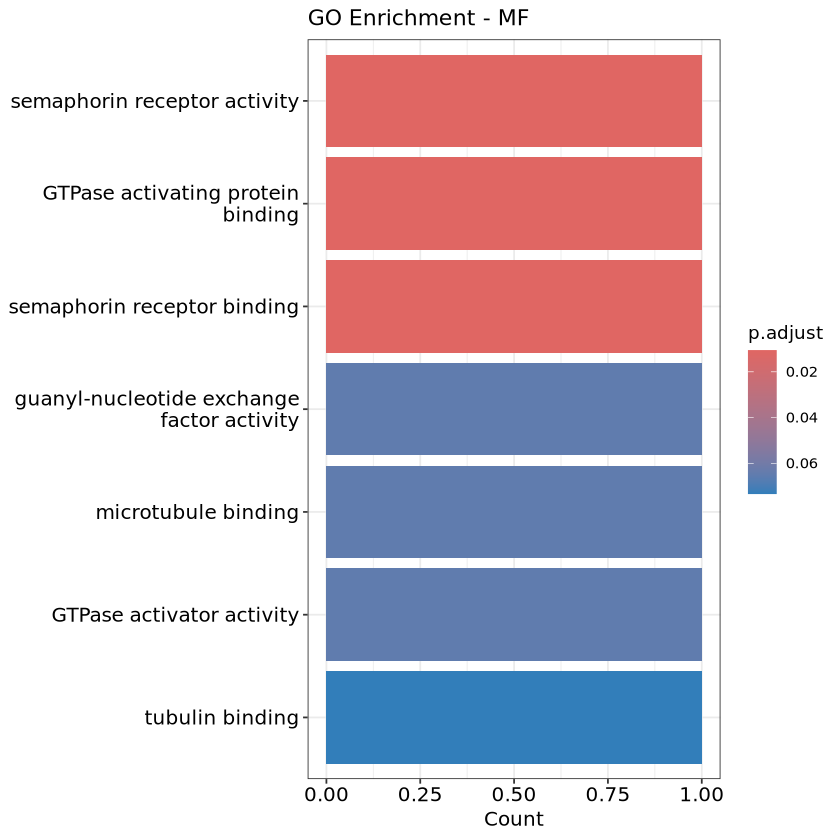

In [55]:
barplot(TL1_AD1_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [56]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/TL1_AD1_GO_MF.png', width = 6, height = 6)

### image_AD_xQTL list

In [57]:
AD_xQTL_ego <- enrichGO(
  gene          = AD_sig_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [58]:
head(AD_xQTL_ego, n=5)

ID         Description                                            
GO:0034502 GO:0034502 protein localization to chromosome                     
GO:1902459 GO:1902459 positive regulation of stem cell population maintenance
GO:0051220 GO:0051220 cytoplasmic sequestering of protein                    
GO:0006893 GO:0006893 Golgi to plasma membrane transport                     
GO:0071168 GO:0071168 protein localization to chromatin                      
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0034502 7/147     127/21261 2.927209e-05 0.06881868 0.06390559
GO:1902459 4/147     51/21261  4.258841e-04 0.26292213 0.24415165
GO:0051220 3/147     23/21261  5.181495e-04 0.26292213 0.24415165
GO:0006893 4/147     59/21261  7.431771e-04 0.26292213 0.24415165
GO:0071168 4/147     60/21261  7.920218e-04 0.26292213 0.24415165
           geneID                                                                                                         
GO:0034502 ENSG00000181555/ENSG00000254093/ENSG00000258724/ENSG00000105229/ENSG00000278463/ENSG00000275126/ENSG00000139579
GO:1902459 ENSG00000032219/ENSG00000173473/ENSG00000089094/ENSG00000181315                                                
GO:0051220 ENSG00000107882/ENSG00000185104/ENSG00000198561                                                                
GO:0006893 ENSG00000138175/ENSG00000137177/ENSG00000073969/ENSG00000115306                                                
GO:0071168 ENSG00000181555/ENSG00000105229/ENSG00000278463/ENSG00000275126                                                
           Count
GO:0034502 7    
GO:1902459 4    
GO:0051220 3    
GO:0006893 4    
GO:0071168 4

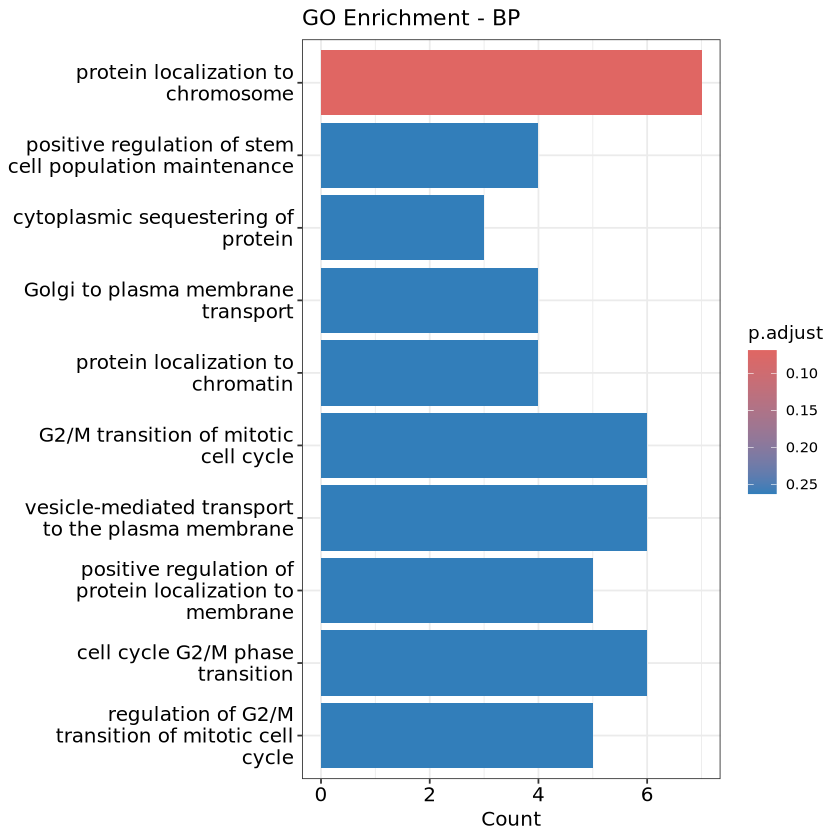

In [59]:
barplot(AD_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [60]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_AD_GO_BP.png', width = 6, height = 6)

In [61]:
AD_xQTL_ego_cc <- enrichGO(
  gene          = AD_sig_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [62]:
head(AD_xQTL_ego_cc, n=5)

ID         Description                    GeneRatio BgRatio  
GO:0001741 GO:0001741 XY body                        3/155     16/22568 
GO:0000803 GO:0000803 sex chromosome                 3/155     42/22568 
GO:0000775 GO:0000775 chromosome, centromeric region 7/155     277/22568
GO:0030496 GO:0030496 midbody                        6/155     210/22568
GO:0044545 GO:0044545 NSL complex                    2/155     13/22568 
           pvalue       p.adjust   qvalue    
GO:0001741 0.0001666354 0.04732447 0.04244819
GO:0000803 0.0029976585 0.19758055 0.17722199
GO:0000775 0.0030976648 0.19758055 0.17722199
GO:0030496 0.0033509422 0.19758055 0.17722199
GO:0044545 0.0034785308 0.19758055 0.17722199
           geneID                                                                                                         
GO:0001741 ENSG00000173473/ENSG00000012048/ENSG00000143194                                                                
GO:0000803 ENSG00000173473/ENSG00000012048/ENSG00000143194                                                                
GO:0000775 ENSG00000173473/ENSG00000254093/ENSG00000258724/ENSG00000120071/ENSG00000278463/ENSG00000275126/ENSG00000175216
GO:0030496 ENSG00000138175/ENSG00000185909/ENSG00000175806/ENSG00000137177/ENSG00000198561/ENSG00000133104                
GO:0044545 ENSG00000120071/ENSG00000025293                                                                                
           Count
GO:0001741 3    
GO:0000803 3    
GO:0000775 7    
GO:0030496 6    
GO:0044545 2

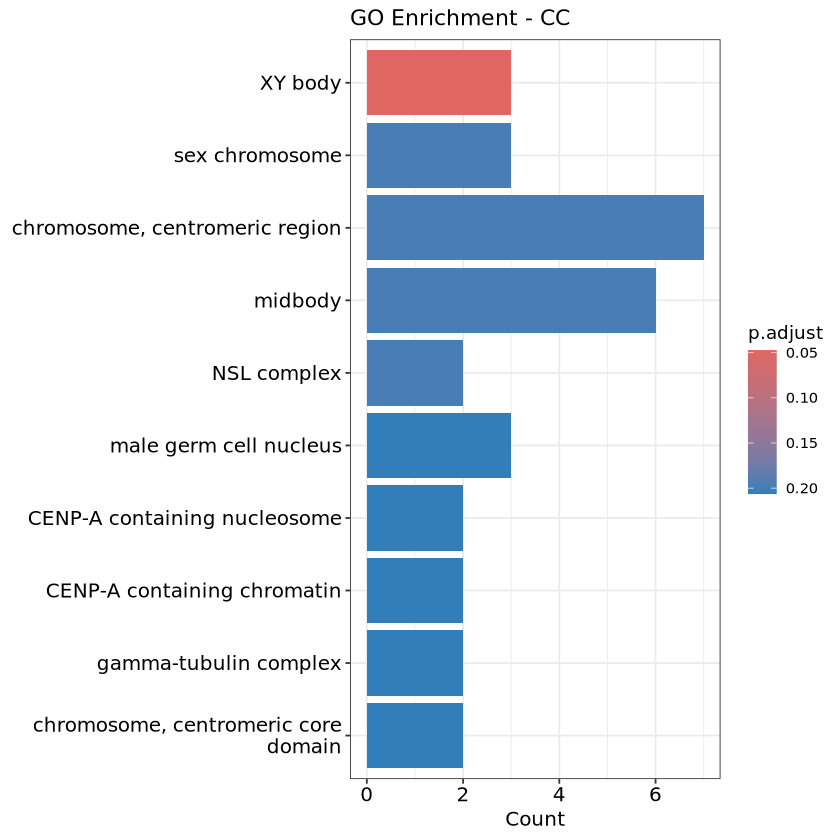

In [63]:
barplot(AD_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [64]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_AD_GO_CC.png', width = 6, height = 6)

In [65]:
AD_xQTL_ego_mf <- enrichGO(
  gene          = AD_sig_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [66]:
head(AD_xQTL_ego_mf, n=5)

ID        
GO:0016667 GO:0016667
GO:0019903 GO:0019903
GO:0044389 GO:0044389
GO:0019887 GO:0019887
GO:0016671 GO:0016671
           Description                                                                       
GO:0016667 oxidoreductase activity, acting on a sulfur group of donors                       
GO:0019903 protein phosphatase binding                                                       
GO:0044389 ubiquitin-like protein ligase binding                                             
GO:0019887 protein kinase regulator activity                                                 
GO:0016671 oxidoreductase activity, acting on a sulfur group of donors, disulfide as acceptor
           GeneRatio BgRatio   pvalue       p.adjust  qvalue   
GO:0016667 4/150     60/21059  0.0008846577 0.1244597 0.1165991
GO:0019903 6/150     175/21059 0.0016116137 0.1244597 0.1165991
GO:0044389 9/150     382/21059 0.0017037453 0.1244597 0.1165991
GO:0019887 7/150     249/21059 0.0020870705 0.1244597 0.1165991
GO:0016671 2/150     10/21059  0.0021844840 0.1244597 0.1165991
           geneID                                                                                                                                         
GO:0016667 ENSG00000175806/ENSG00000174099/ENSG00000086619/ENSG00000213593                                                                                
GO:0019903 ENSG00000104643/ENSG00000147324/ENSG00000146535/ENSG00000146648/ENSG00000183735/ENSG00000132842                                                
GO:0044389 ENSG00000100567/ENSG00000050130/ENSG00000147324/ENSG00000146648/ENSG00000105229/ENSG00000012048/ENSG00000185104/ENSG00000170581/ENSG00000133104
GO:0019887 ENSG00000073417/ENSG00000146648/ENSG00000088992/ENSG00000204435/ENSG00000186834/ENSG00000185104/ENSG00000175224                                
GO:0016671 ENSG00000175806/ENSG00000174099                                                                                                                
           Count
GO:0016667 4    
GO:0019903 6    
GO:0044389 9    
GO:0019887 7    
GO:0016671 2

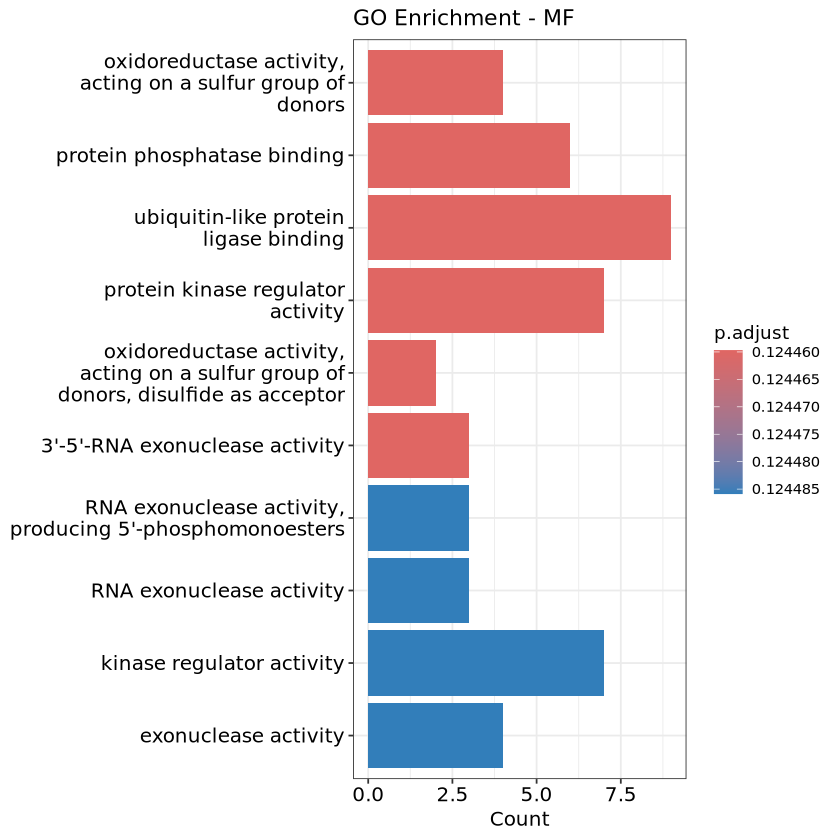

In [67]:
barplot(AD_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [68]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_AD_GO_MF.png', width = 6, height = 6)

### AD2_Aging2_overlap

In [69]:
AD2_Aging2_overlap_ego <- enrichGO(
  gene          = AD2_Aging2_overlap_sig_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [70]:
head(AD2_Aging2_overlap_ego, n=5)

ID        
GO:0050767 GO:0050767
GO:0045732 GO:0045732
GO:2000179 GO:2000179
GO:0050769 GO:0050769
GO:0030514 GO:0030514
           Description                                                GeneRatio
GO:0050767 regulation of neurogenesis                                 4/20     
GO:0045732 positive regulation of protein catabolic process           3/20     
GO:2000179 positive regulation of neural precursor cell proliferation 2/20     
GO:0050769 positive regulation of neurogenesis                        3/20     
GO:0030514 negative regulation of BMP signaling pathway               2/20     
           BgRatio   pvalue       p.adjust  qvalue   
GO:0050767 427/21261 0.0006021562 0.1669927 0.1244191
GO:0045732 250/21261 0.0015793339 0.1669927 0.1244191
GO:2000179 65/21261  0.0016875964 0.1669927 0.1244191
GO:0050769 270/21261 0.0019675580 0.1669927 0.1244191
GO:0030514 73/21261  0.0021226265 0.1669927 0.1244191
           geneID                                                         
GO:0050767 ENSG00000110492/ENSG00000174989/ENSG00000038427/ENSG00000133104
GO:0045732 ENSG00000174989/ENSG00000135119/ENSG00000185104                
GO:2000179 ENSG00000110492/ENSG00000038427                                
GO:0050769 ENSG00000110492/ENSG00000174989/ENSG00000038427                
GO:0030514 ENSG00000174106/ENSG00000133104                                
           Count
GO:0050767 4    
GO:0045732 3    
GO:2000179 2    
GO:0050769 3    
GO:0030514 2

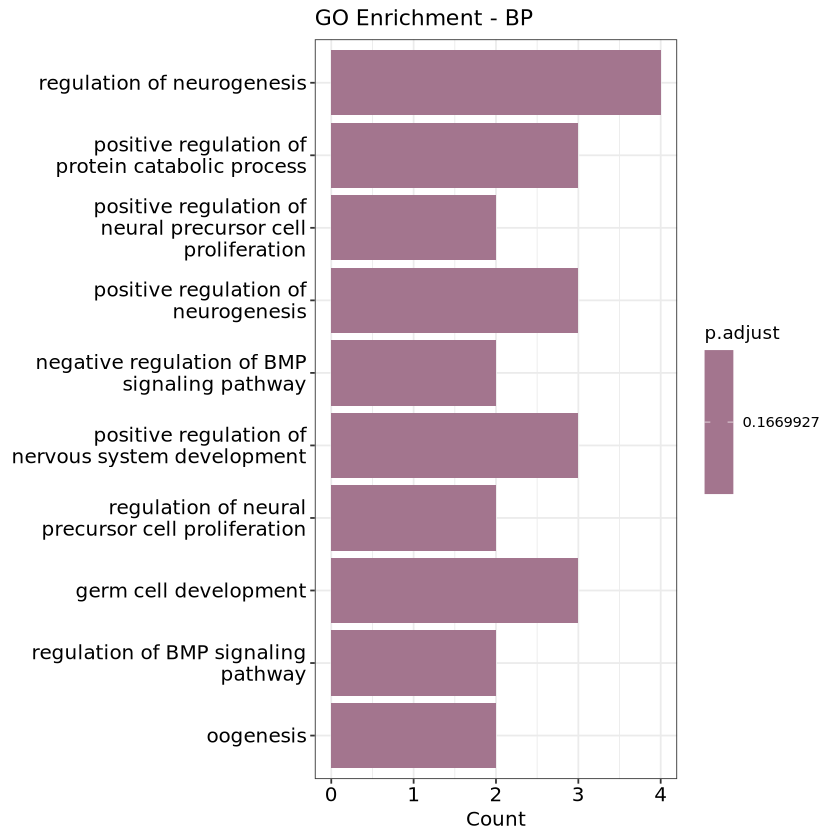

In [71]:
barplot(AD2_Aging2_overlap_ego, showCategory = 10, title = "GO Enrichment - BP")

In [72]:
AD2_Aging2_overlap_ego_cc <- enrichGO(
  gene          = AD2_Aging2_overlap_sig_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [73]:
head(AD2_Aging2_overlap_ego_cc, n=10)

ID         Description                             GeneRatio
GO:0072534 GO:0072534 perineuronal net                        1/21     
GO:0098966 GO:0098966 perisynaptic extracellular matrix       1/21     
GO:0099535 GO:0099535 synapse-associated extracellular matrix 1/21     
GO:0033391 GO:0033391 chromatoid body                         1/21     
GO:0001741 GO:0001741 XY body                                 1/21     
GO:0043186 GO:0043186 P granule                               1/21     
GO:0045495 GO:0045495 pole plasm                              1/21     
GO:0060293 GO:0060293 germ plasm                              1/21     
GO:0036464 GO:0036464 cytoplasmic ribonucleoprotein granule   2/21     
GO:0035770 GO:0035770 ribonucleoprotein granule               2/21     
           BgRatio   pvalue     p.adjust  qvalue   
GO:0072534 11/22568  0.01019049 0.1597295 0.1276590
GO:0098966 12/22568  0.01111198 0.1597295 0.1276590
GO:0099535 13/22568  0.01203265 0.1597295 0.1276590
GO:0033391 14/22568  0.01295250 0.1597295 0.1276590
GO:0001741 16/22568  0.01478976 0.1597295 0.1276590
GO:0043186 27/22568  0.02483663 0.1676473 0.1339871
GO:0045495 27/22568  0.02483663 0.1676473 0.1339871
GO:0060293 27/22568  0.02483663 0.1676473 0.1339871
GO:0036464 293/22568 0.02998756 0.1727089 0.1380324
GO:0035770 312/22568 0.03365329 0.1727089 0.1380324
           geneID                          Count
GO:0072534 ENSG00000038427                 1    
GO:0098966 ENSG00000038427                 1    
GO:0099535 ENSG00000038427                 1    
GO:0033391 ENSG00000143194                 1    
GO:0001741 ENSG00000143194                 1    
GO:0043186 ENSG00000143194                 1    
GO:0045495 ENSG00000143194                 1    
GO:0060293 ENSG00000143194                 1    
GO:0036464 ENSG00000135473/ENSG00000143194 2    
GO:0035770 ENSG00000135473/ENSG00000143194 2

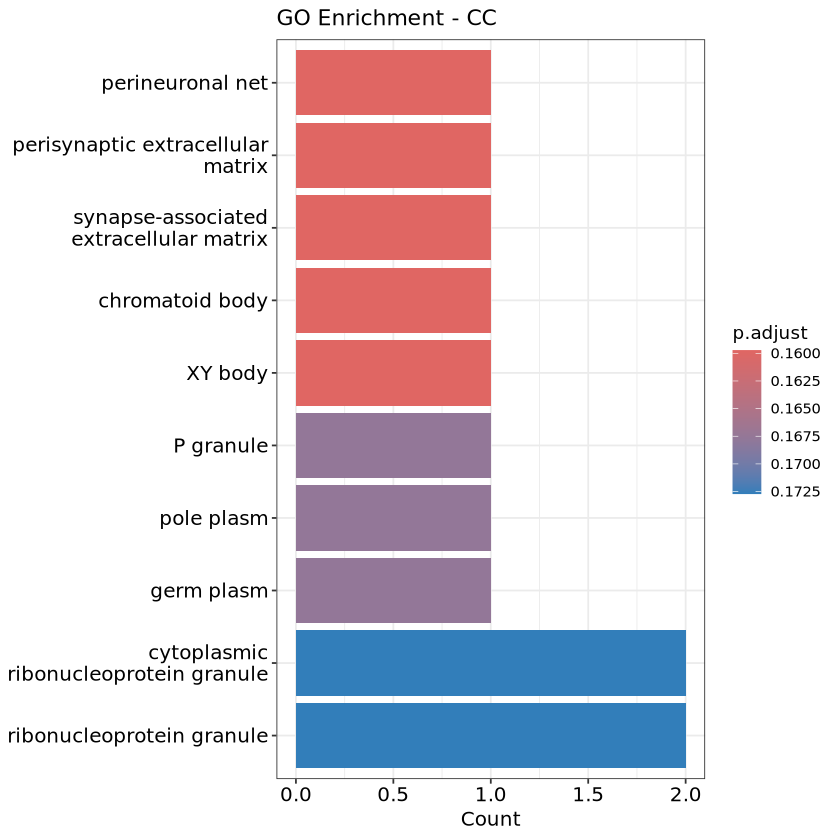

In [74]:
barplot(AD2_Aging2_overlap_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [75]:
AD2_Aging2_overlap_ego_mf <- enrichGO(
  gene          = AD2_Aging2_overlap_sig_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [76]:
head(AD2_Aging2_overlap_ego_mf, n=5)

ID        
GO:0016671 GO:0016671
GO:0035374 GO:0035374
GO:0004535 GO:0004535
GO:0070990 GO:0070990
GO:0000287 GO:0000287
           Description                                                                       
GO:0016671 oxidoreductase activity, acting on a sulfur group of donors, disulfide as acceptor
GO:0035374 chondroitin sulfate binding                                                       
GO:0004535 poly(A)-specific ribonuclease activity                                            
GO:0070990 snRNP binding                                                                     
GO:0000287 magnesium ion binding                                                             
           GeneRatio BgRatio   pvalue      p.adjust  qvalue    
GO:0016671 1/20      10/21059  0.009458655 0.1075899 0.07187181
GO:0035374 1/20      10/21059  0.009458655 0.1075899 0.07187181
GO:0004535 1/20      14/21059  0.013218266 0.1075899 0.07187181
GO:0070990 1/20      18/21059  0.016964319 0.1075899 0.07187181
GO:0000287 2/20      241/21059 0.021638121 0.1075899 0.07187181
           geneID                          Count
GO:0016671 ENSG00000174099                 1    
GO:0035374 ENSG00000110492                 1    
GO:0004535 ENSG00000135473                 1    
GO:0070990 ENSG00000174106                 1    
GO:0000287 ENSG00000088992/ENSG00000069020 2

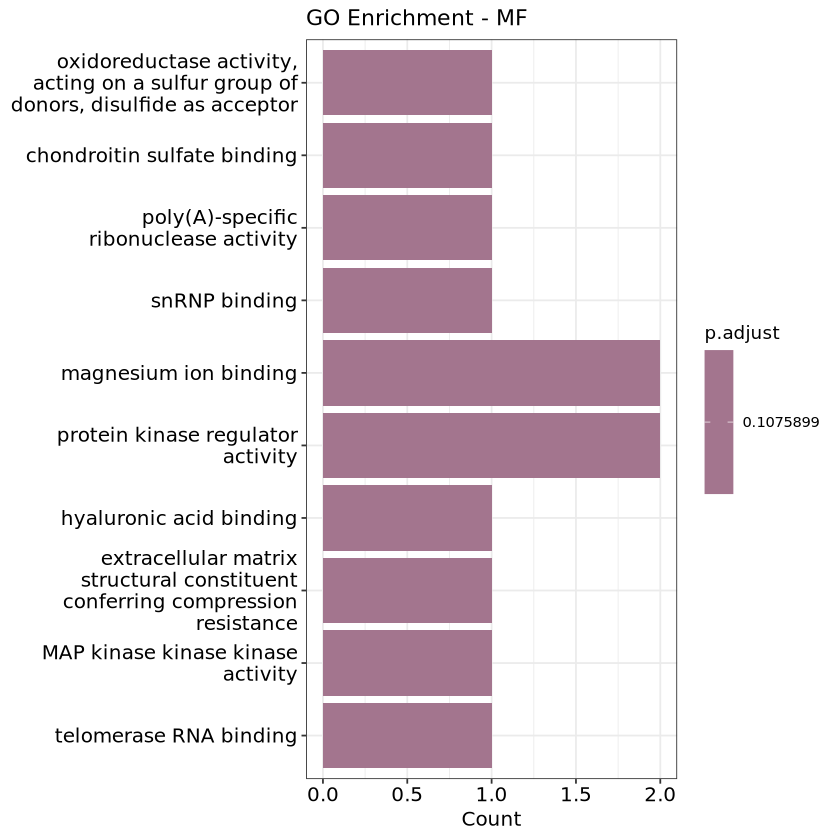

In [77]:
barplot(AD2_Aging2_overlap_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

### AD2_Aging2_union

In [19]:
AD2_Aging2_union_ego <- enrichGO(
  gene          = AD2_Aging2_sig_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [20]:
head(AD2_Aging2_union_ego, n=5)

ID         Description                                        
GO:0032200 GO:0032200 telomere organization                              
GO:0000723 GO:0000723 telomere maintenance                               
GO:0006310 GO:0006310 DNA recombination                                  
GO:0000086 GO:0000086 G2/M transition of mitotic cell cycle              
GO:0010389 GO:0010389 regulation of G2/M transition of mitotic cell cycle
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0032200 9/147     218/21261 2.151325e-05 0.03456346 0.03187516
GO:0000723 8/147     185/21261 4.494827e-05 0.03456346 0.03187516
GO:0006310 11/147    365/21261 4.847610e-05 0.03456346 0.03187516
GO:0000086 7/147     158/21261 1.168843e-04 0.06250387 0.05764240
GO:0010389 6/147     121/21261 1.972907e-04 0.06658360 0.06140482
           geneID                                                                                                                                                                         
GO:0032200 ENSG00000275126/ENSG00000254093/ENSG00000139579/ENSG00000102882/ENSG00000169592/ENSG00000132604/ENSG00000181625/ENSG00000106399/ENSG00000108384                                
GO:0000723 ENSG00000254093/ENSG00000139579/ENSG00000102882/ENSG00000169592/ENSG00000132604/ENSG00000181625/ENSG00000106399/ENSG00000108384                                                
GO:0006310 ENSG00000176563/ENSG00000012048/ENSG00000204410/ENSG00000139579/ENSG00000169592/ENSG00000132604/ENSG00000181625/ENSG00000149923/ENSG00000106399/ENSG00000185480/ENSG00000108384
GO:0000086 ENSG00000158402/ENSG00000012048/ENSG00000254093/ENSG00000139579/ENSG00000176155/ENSG00000149930/ENSG00000108384                                                                
GO:0010389 ENSG00000158402/ENSG00000012048/ENSG00000254093/ENSG00000139579/ENSG00000149930/ENSG00000108384                                                                                
           Count
GO:0032200  9   
GO:0000723  8   
GO:0006310 11   
GO:0000086  7   
GO:0010389  6

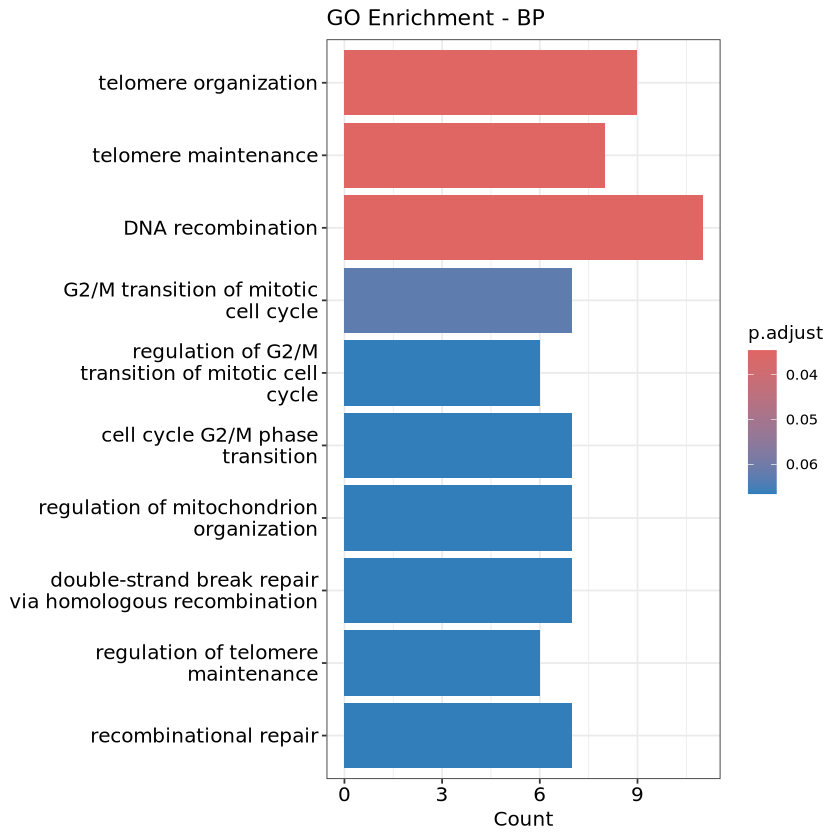

In [21]:
barplot(AD2_Aging2_union_ego, showCategory = 10, title = "GO Enrichment - BP")

In [81]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_AD2_Aging2_union_BP.png', width = 6, height = 6)

In [82]:
AD2_Aging2_union_ego_cc <- enrichGO(
  gene          = AD2_Aging2_sig_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [83]:
head(AD2_Aging2_union_ego_cc, n=10)

ID         Description                             GeneRatio
GO:0098978 GO:0098978 glutamatergic synapse                   10/155   
GO:0044545 GO:0044545 NSL complex                             2/155    
GO:1902554 GO:1902554 serine/threonine protein kinase complex 5/155    
GO:0001741 GO:0001741 XY body                                 2/155    
GO:0001673 GO:0001673 male germ cell nucleus                  3/155    
GO:0043505 GO:0043505 CENP-A containing nucleosome            2/155    
GO:0061638 GO:0061638 CENP-A containing chromatin             2/155    
GO:1902911 GO:1902911 protein kinase complex                  5/155    
GO:0000930 GO:0000930 gamma-tubulin complex                   2/155    
GO:0034506 GO:0034506 chromosome, centromeric core domain     2/155    
           BgRatio   pvalue       p.adjust  qvalue   
GO:0098978 440/22568 0.0009547099 0.1734801 0.1630721
GO:0044545 13/22568  0.0034785308 0.1734801 0.1630721
GO:1902554 154/22568 0.0042663444 0.1734801 0.1630721
GO:0001741 16/22568  0.0052798087 0.1734801 0.1630721
GO:0001673 54/22568  0.0061000655 0.1734801 0.1630721
GO:0043505 18/22568  0.0066715105 0.1734801 0.1630721
GO:0061638 18/22568  0.0066715105 0.1734801 0.1630721
GO:1902911 174/22568 0.0071008181 0.1734801 0.1630721
GO:0000930 20/22568  0.0082108182 0.1734801 0.1630721
GO:0034506 20/22568  0.0082108182 0.1734801 0.1630721
           geneID                                                                                                                                                         
GO:0098978 ENSG00000131094/ENSG00000115306/ENSG00000118407/ENSG00000156599/ENSG00000198561/ENSG00000102882/ENSG00000149927/ENSG00000124181/ENSG00000135905/ENSG00000110975
GO:0044545 ENSG00000120071/ENSG00000025293                                                                                                                                
GO:1902554 ENSG00000183735/ENSG00000204435/ENSG00000175224/ENSG00000103490/ENSG00000136560                                                                                
GO:0001741 ENSG00000012048/ENSG00000143194                                                                                                                                
GO:0001673 ENSG00000012048/ENSG00000143194/ENSG00000132604                                                                                                                
GO:0043505 ENSG00000278463/ENSG00000275126                                                                                                                                
GO:0061638 ENSG00000278463/ENSG00000275126                                                                                                                                
GO:1902911 ENSG00000183735/ENSG00000204435/ENSG00000175224/ENSG00000103490/ENSG00000136560                                                                                
GO:0000930 ENSG00000012048/ENSG00000037042                                                                                                                                
GO:0034506 ENSG00000278463/ENSG00000275126                                                                                                                                
           Count
GO:0098978 10   
GO:0044545  2   
GO:1902554  5   
GO:0001741  2   
GO:0001673  3   
GO:0043505  2   
GO:0061638  2   
GO:1902911  5   
GO:0000930  2   
GO:0034506  2

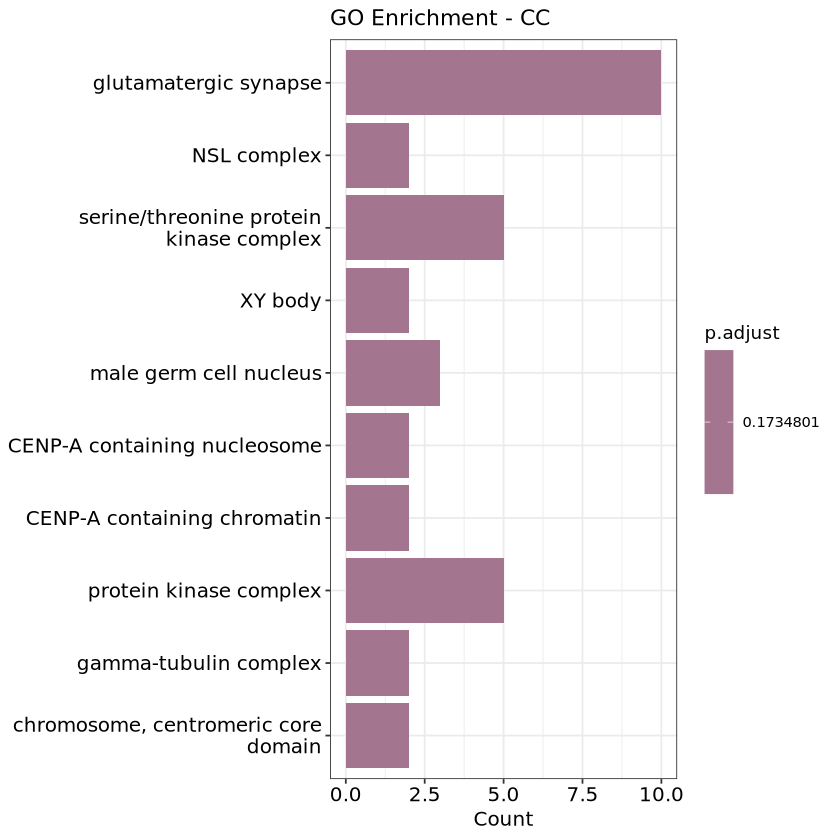

In [84]:
barplot(AD2_Aging2_union_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [85]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_AD2_Aging2_union_CC.png', width = 6, height = 6)

In [86]:
AD2_Aging2_union_ego_mf <- enrichGO(
  gene          = AD2_Aging2_sig_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [87]:
head(AD2_Aging2_union_ego_mf, n=5)

ID         Description                                              
GO:0042578 GO:0042578 phosphoric ester hydrolase activity                      
GO:0004722 GO:0004722 protein serine/threonine phosphatase activity            
GO:0016791 GO:0016791 phosphatase activity                                     
GO:0016889 GO:0016889 DNA endonuclease activity, producing 3'-phosphomonoesters
GO:0098505 GO:0098505 G-rich strand telomeric DNA binding                      
           GeneRatio BgRatio   pvalue       p.adjust  qvalue    
GO:0042578 11/148    390/21059 0.0001012207 0.0307711 0.02844835
GO:0004722 5/148     108/21059 0.0009991013 0.1111103 0.10272315
GO:0016791 8/148     292/21059 0.0010964830 0.1111103 0.10272315
GO:0016889 2/148     10/21059  0.0021275047 0.1216606 0.11247712
GO:0098505 2/148     10/21059  0.0021275047 0.1216606 0.11247712
           geneID                                                                                                                                                                         
GO:0042578 ENSG00000141349/ENSG00000158402/ENSG00000108861/ENSG00000115556/ENSG00000107902/ENSG00000102886/ENSG00000141298/ENSG00000149923/ENSG00000175175/ENSG00000124181/ENSG00000108389
GO:0004722 ENSG00000108861/ENSG00000141298/ENSG00000149923/ENSG00000175175/ENSG00000108389                                                                                                
GO:0016791 ENSG00000141349/ENSG00000158402/ENSG00000108861/ENSG00000107902/ENSG00000141298/ENSG00000149923/ENSG00000175175/ENSG00000108389                                                
GO:0016889 ENSG00000181625/ENSG00000108384                                                                                                                                                
GO:0098505 ENSG00000139579/ENSG00000132604                                                                                                                                                
           Count
GO:0042578 11   
GO:0004722  5   
GO:0016791  8   
GO:0016889  2   
GO:0098505  2

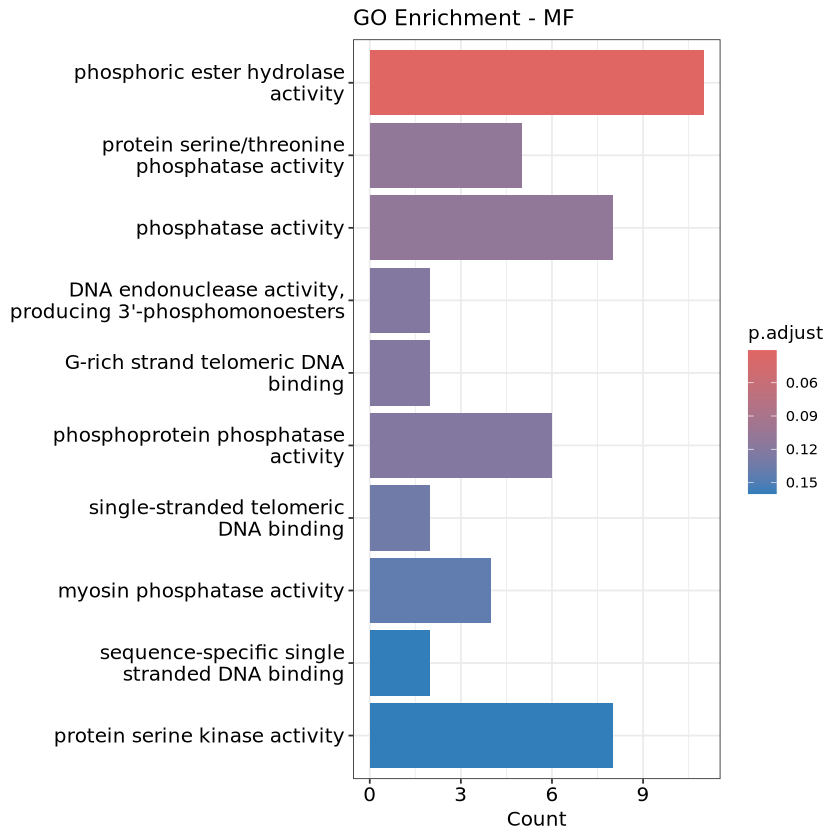

In [88]:
barplot(AD2_Aging2_union_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [89]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_AD2_Aging2_union_MF.png', width = 6, height = 6)

### AD2_Aging4_xQTL

In [90]:
AD2_Aging4_xQTL_ego <- enrichGO(
  gene          = AD2_Aging4_sig_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [91]:
head(AD2_Aging4_xQTL_ego, n=5)

ID         Description                                        
GO:0051568 GO:0051568 histone H3-K4 methylation                          
GO:0061036 GO:0061036 positive regulation of cartilage development       
GO:0009048 GO:0009048 dosage compensation by inactivation of X chromosome
GO:0007549 GO:0007549 dosage compensation                                
GO:0016570 GO:0016570 histone modification                               
           GeneRatio BgRatio   pvalue       p.adjust  qvalue   
GO:0051568 3/129     27/21261  0.0005737758 0.2866044 0.2738779
GO:0061036 3/129     32/21261  0.0009516783 0.2866044 0.2738779
GO:0009048 3/129     34/21261  0.0011380480 0.2866044 0.2738779
GO:0007549 3/129     36/21261  0.0013459527 0.2866044 0.2738779
GO:0016570 5/129     136/21261 0.0014523296 0.2866044 0.2738779
           geneID                                                                         
GO:0051568 ENSG00000120071/ENSG00000025293/ENSG00000272333                                
GO:0061036 ENSG00000125965/ENSG00000110492/ENSG00000153162                                
GO:0009048 ENSG00000120071/ENSG00000025293/ENSG00000012048                                
GO:0007549 ENSG00000120071/ENSG00000025293/ENSG00000012048                                
GO:0016570 ENSG00000120071/ENSG00000025293/ENSG00000012048/ENSG00000272333/ENSG00000196284
           Count
GO:0051568 3    
GO:0061036 3    
GO:0009048 3    
GO:0007549 3    
GO:0016570 5

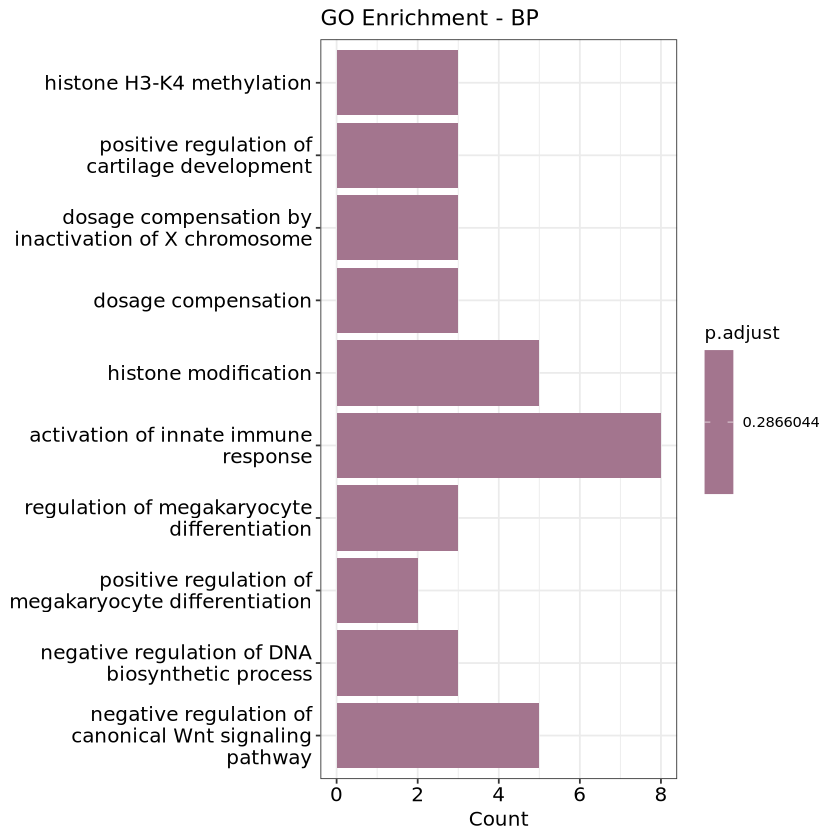

In [92]:
barplot(AD2_Aging4_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [93]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_AD2_Aging4_union_BP.png', width = 6, height = 6)

In [94]:
AD2_Aging4_xQTL_ego_cc <- enrichGO(
  gene          = AD2_Aging4_sig_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [95]:
head(AD2_Aging4_xQTL_ego_cc, n=10)

ID         Description                                         
GO:0044665 GO:0044665 MLL1/2 complex                                      
GO:0044545 GO:0044545 NSL complex                                         
GO:0001741 GO:0001741 XY body                                             
GO:0043505 GO:0043505 CENP-A containing nucleosome                        
GO:0061638 GO:0061638 CENP-A containing chromatin                         
GO:0000930 GO:0000930 gamma-tubulin complex                               
GO:0034506 GO:0034506 chromosome, centromeric core domain                 
GO:0099091 GO:0099091 postsynaptic specialization, intracellular component
GO:0035097 GO:0035097 histone methyltransferase complex                   
GO:0098687 GO:0098687 chromosomal region                                  
           GeneRatio BgRatio   pvalue      p.adjust  qvalue   
GO:0044665 3/137     45/22568  0.002577396 0.2062440 0.1975175
GO:0044545 2/137     13/22568  0.002731120 0.2062440 0.1975175
GO:0001741 2/137     16/22568  0.004151932 0.2062440 0.1975175
GO:0043505 2/137     18/22568  0.005251859 0.2062440 0.1975175
GO:0061638 2/137     18/22568  0.005251859 0.2062440 0.1975175
GO:0000930 2/137     20/22568  0.006470400 0.2062440 0.1975175
GO:0034506 2/137     20/22568  0.006470400 0.2062440 0.1975175
GO:0099091 2/137     20/22568  0.006470400 0.2062440 0.1975175
GO:0035097 3/137     77/22568  0.011543945 0.3270784 0.3132392
GO:0098687 7/137     444/22568 0.018886119 0.4245725 0.4066081
           geneID                                                                                                         
GO:0044665 ENSG00000120071/ENSG00000025293/ENSG00000272333                                                                
GO:0044545 ENSG00000120071/ENSG00000025293                                                                                
GO:0001741 ENSG00000012048/ENSG00000143194                                                                                
GO:0043505 ENSG00000278463/ENSG00000275126                                                                                
GO:0061638 ENSG00000278463/ENSG00000275126                                                                                
GO:0000930 ENSG00000012048/ENSG00000037042                                                                                
GO:0034506 ENSG00000278463/ENSG00000275126                                                                                
GO:0099091 ENSG00000156599/ENSG00000198561                                                                                
GO:0035097 ENSG00000120071/ENSG00000025293/ENSG00000272333                                                                
GO:0098687 ENSG00000120071/ENSG00000278463/ENSG00000275126/ENSG00000254093/ENSG00000175216/ENSG00000139579/ENSG00000107960
           Count
GO:0044665 3    
GO:0044545 2    
GO:0001741 2    
GO:0043505 2    
GO:0061638 2    
GO:0000930 2    
GO:0034506 2    
GO:0099091 2    
GO:0035097 3    
GO:0098687 7

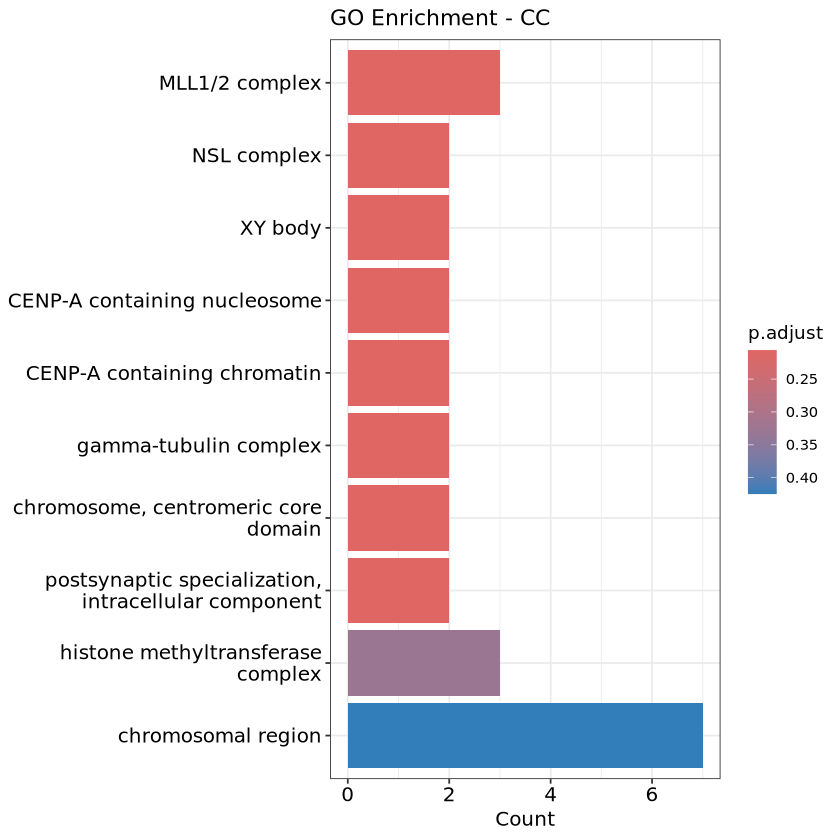

In [96]:
barplot(AD2_Aging4_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [97]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_AD2_Aging4_union_CC.png', width = 6, height = 6)

In [98]:
AD2_Aging4_xQTL_ego_mf <- enrichGO(
  gene          = AD2_Aging4_sig_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [99]:
head(AD2_Aging4_xQTL_ego_mf, n=5)

ID        
GO:0016667 GO:0016667
GO:0015036 GO:0015036
GO:0043047 GO:0043047
GO:0098847 GO:0098847
GO:0046982 GO:0046982
           Description                                                
GO:0016667 oxidoreductase activity, acting on a sulfur group of donors
GO:0015036 disulfide oxidoreductase activity                          
GO:0043047 single-stranded telomeric DNA binding                      
GO:0098847 sequence-specific single stranded DNA binding              
GO:0046982 protein heterodimerization activity                        
           GeneRatio BgRatio   pvalue       p.adjust  qvalue   
GO:0016667 4/133     60/21059  0.0005638587 0.1753600 0.1721253
GO:0015036 3/133     37/21059  0.0016354853 0.2543180 0.2496267
GO:0043047 2/133     12/21059  0.0025067125 0.2598625 0.2550690
GO:0098847 2/133     15/21059  0.0039388015 0.3062418 0.3005927
GO:0046982 7/133     360/21059 0.0079870303 0.4358942 0.4278535
           geneID                                                                                                         
GO:0016667 ENSG00000174099/ENSG00000086619/ENSG00000213593/ENSG00000239264                                                
GO:0015036 ENSG00000086619/ENSG00000213593/ENSG00000239264                                                                
GO:0043047 ENSG00000139579/ENSG00000107960                                                                                
GO:0098847 ENSG00000139579/ENSG00000107960                                                                                
GO:0046982 ENSG00000278463/ENSG00000275126/ENSG00000196787/ENSG00000120669/ENSG00000197780/ENSG00000153162/ENSG00000196284
           Count
GO:0016667 4    
GO:0015036 3    
GO:0043047 2    
GO:0098847 2    
GO:0046982 7

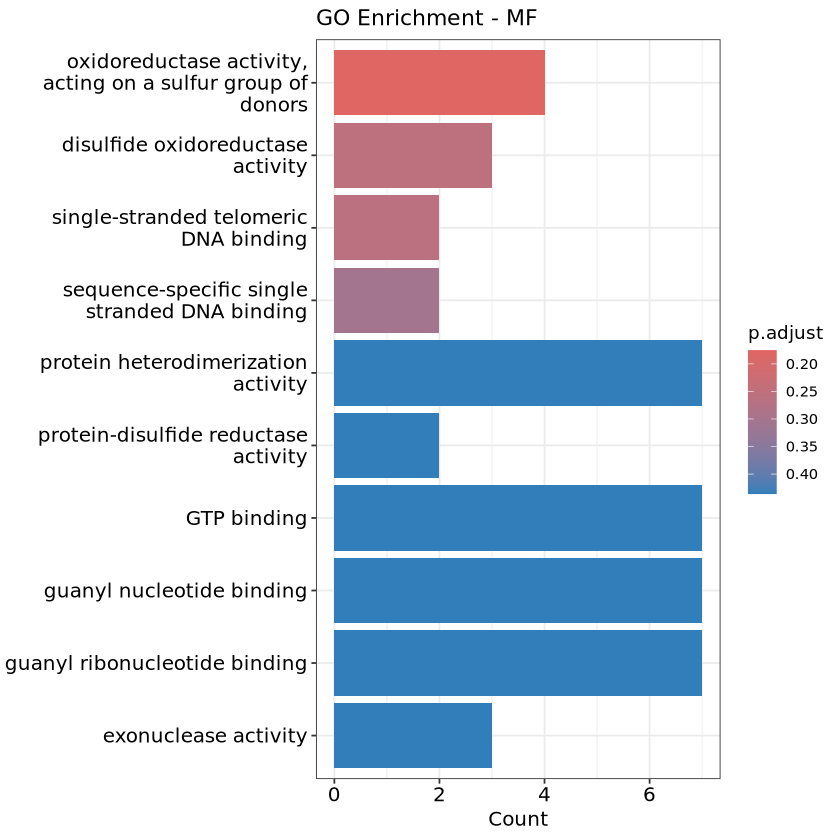

In [100]:
barplot(AD2_Aging4_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [101]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_AD2_Aging4_union_MF.png', width = 6, height = 6)

### image_AD1_xQTL list

In [102]:
AD1_sig_gene_ego <- enrichGO(
  gene          = unique(image_AD1_sig_gene$gene_id),
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [103]:
head(AD1_sig_gene_ego, n=10)

ID         Description                                            
GO:1900180 GO:1900180 regulation of protein localization to nucleus          
GO:1902459 GO:1902459 positive regulation of stem cell population maintenance
GO:0034502 GO:0034502 protein localization to chromosome                     
GO:1905634 GO:1905634 regulation of protein localization to chromatin        
GO:0006282 GO:0006282 regulation of DNA repair                               
GO:0051974 GO:0051974 negative regulation of telomerase activity             
GO:1904749 GO:1904749 regulation of protein localization to nucleolus        
GO:0045739 GO:0045739 positive regulation of DNA repair                      
GO:0098876 GO:0098876 vesicle-mediated transport to the plasma membrane      
GO:1902570 GO:1902570 protein localization to nucleolus                      
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:1900180 5/57      161/21261 0.0000712940 0.08926584 0.07467524
GO:1902459 3/57      51/21261  0.0003472582 0.08926584 0.07467524
GO:0034502 4/57      127/21261 0.0003754445 0.08926584 0.07467524
GO:1905634 2/57      11/21261  0.0003824161 0.08926584 0.07467524
GO:0006282 5/57      236/21261 0.0004226656 0.08926584 0.07467524
GO:0051974 2/57      12/21261  0.0004581092 0.08926584 0.07467524
GO:1904749 2/57      12/21261  0.0004581092 0.08926584 0.07467524
GO:0045739 4/57      142/21261 0.0005724840 0.09760853 0.08165430
GO:0098876 4/57      163/21261 0.0009586960 0.14529570 0.12154695
GO:1902570 2/57      21/21261  0.0014352058 0.17357899 0.14520731
           geneID                                                                         
GO:1900180 ENSG00000171206/ENSG00000107882/ENSG00000254093/ENSG00000258724/ENSG00000147324
GO:1902459 ENSG00000032219/ENSG00000173473/ENSG00000089094                                
GO:0034502 ENSG00000181555/ENSG00000254093/ENSG00000258724/ENSG00000105229                
GO:1905634 ENSG00000181555/ENSG00000105229                                                
GO:0006282 ENSG00000100811/ENSG00000181555/ENSG00000173473/ENSG00000146648/ENSG00000105229
GO:0051974 ENSG00000254093/ENSG00000258724                                                
GO:1904749 ENSG00000254093/ENSG00000258724                                                
GO:0045739 ENSG00000100811/ENSG00000173473/ENSG00000146648/ENSG00000105229                
GO:0098876 ENSG00000138175/ENSG00000076201/ENSG00000188042/ENSG00000137177                
GO:1902570 ENSG00000254093/ENSG00000258724                                                
           Count
GO:1900180 5    
GO:1902459 3    
GO:0034502 4    
GO:1905634 2    
GO:0006282 5    
GO:0051974 2    
GO:1904749 2    
GO:0045739 4    
GO:0098876 4    
GO:1902570 2

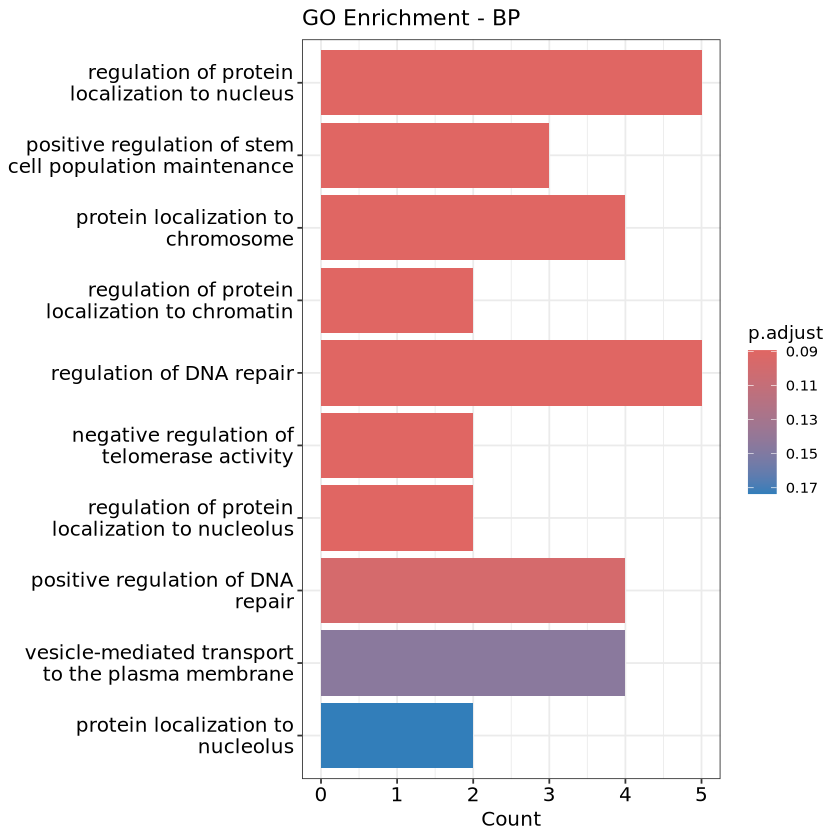

In [104]:
barplot(AD1_sig_gene_ego, showCategory = 10, title = "GO Enrichment - BP")

In [105]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_AD1_GO_BP.png', width = 6, height = 6)

In [106]:
AD1_sig_gene_ego_cc <- enrichGO(
  gene          = image_AD1_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [107]:
head(AD1_sig_gene_ego_cc, n=5)

ID         Description                    GeneRatio BgRatio  
GO:0005875 GO:0005875 microtubule associated complex 4/60      165/22568
GO:0030496 GO:0030496 midbody                        4/60      210/22568
GO:0101002 GO:0101002 ficolin-1-rich granule         4/60      235/22568
GO:0000228 GO:0000228 nuclear chromosome             4/60      245/22568
GO:0031253 GO:0031253 cell projection membrane       5/60      400/22568
           pvalue       p.adjust qvalue  
GO:0005875 0.0009768878 0.140816 0.118229
GO:0030496 0.0023644602 0.140816 0.118229
GO:0101002 0.0035409849 0.140816 0.118229
GO:0000228 0.0041062762 0.140816 0.118229
GO:0031253 0.0041909533 0.140816 0.118229
           geneID                                                                         
GO:0005875 ENSG00000088727/ENSG00000047849/ENSG00000137177/ENSG00000138107                
GO:0030496 ENSG00000138175/ENSG00000185909/ENSG00000175806/ENSG00000137177                
GO:0101002 ENSG00000160796/ENSG00000178035/ENSG00000164733/ENSG00000167658                
GO:0000228 ENSG00000100811/ENSG00000032219/ENSG00000254093/ENSG00000258724                
GO:0031253 ENSG00000104643/ENSG00000146535/ENSG00000146648/ENSG00000099940/ENSG00000128271
           Count
GO:0005875 4    
GO:0030496 4    
GO:0101002 4    
GO:0000228 4    
GO:0031253 5

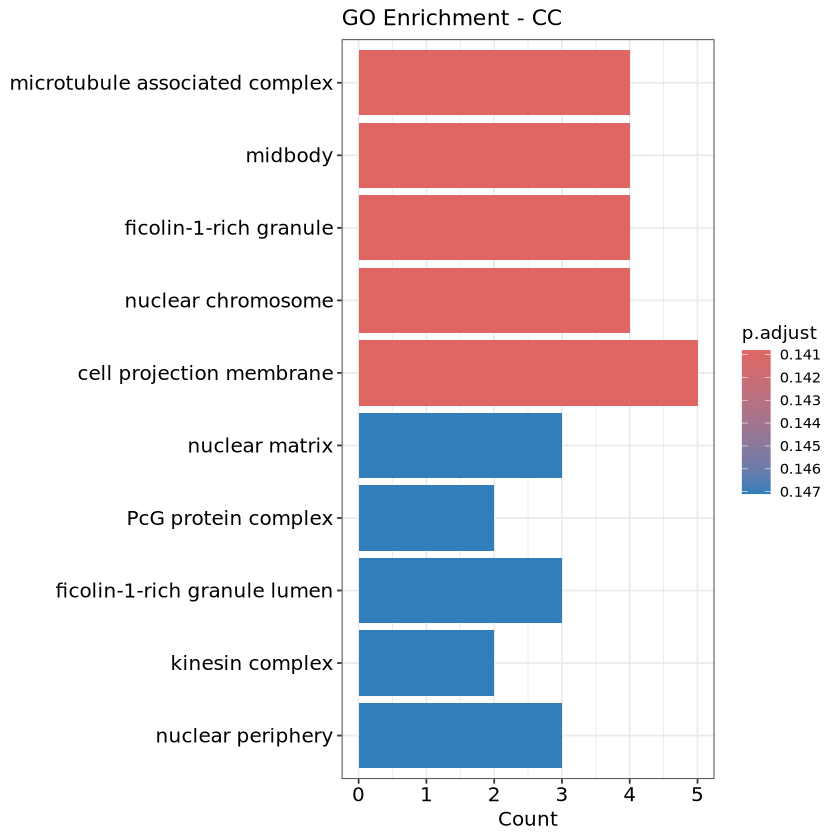

In [108]:
barplot(AD1_sig_gene_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [109]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_AD1_GO_CC.png', width = 6, height = 6)

In [110]:
image_AD1_sig_gene_ego_mf <- enrichGO(
  gene          = image_AD1_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [111]:
head(image_AD1_sig_gene_ego_mf, n=10)

ID         Description                           GeneRatio BgRatio  
GO:0015631 GO:0015631 tubulin binding                       6/59      397/21059
GO:0019903 GO:0019903 protein phosphatase binding           4/59      175/21059
GO:0070034 GO:0070034 telomerase RNA binding                2/59      28/21059 
GO:0031625 GO:0031625 ubiquitin protein ligase binding      5/59      363/21059
GO:0051721 GO:0051721 protein phosphatase 2A binding        2/59      33/21059 
GO:0019902 GO:0019902 phosphatase binding                   4/59      230/21059
GO:0044389 GO:0044389 ubiquitin-like protein ligase binding 5/59      382/21059
GO:0005525 GO:0005525 GTP binding                           5/59      411/21059
GO:0043014 GO:0043014 alpha-tubulin binding                 2/59      43/21059 
GO:0019001 GO:0019001 guanyl nucleotide binding             5/59      433/21059
           pvalue       p.adjust  qvalue   
GO:0015631 0.0008382768 0.1110114 0.0968404
GO:0019903 0.0014688592 0.1110114 0.0968404
GO:0070034 0.0027833649 0.1110114 0.0968404
GO:0031625 0.0034584384 0.1110114 0.0968404
GO:0051721 0.0038531076 0.1110114 0.0968404
GO:0019902 0.0039436688 0.1110114 0.0968404
GO:0044389 0.0042932577 0.1110114 0.0968404
GO:0005525 0.0058322450 0.1190401 0.1038442
GO:0043014 0.0064725309 0.1190401 0.1038442
GO:0019001 0.0072344819 0.1190401 0.1038442
           geneID                                                                                         
GO:0015631 ENSG00000138175/ENSG00000088727/ENSG00000181555/ENSG00000047849/ENSG00000188042/ENSG00000137177
GO:0019903 ENSG00000104643/ENSG00000147324/ENSG00000146535/ENSG00000146648                                
GO:0070034 ENSG00000254093/ENSG00000258724                                                                
GO:0031625 ENSG00000100567/ENSG00000050130/ENSG00000147324/ENSG00000146648/ENSG00000105229                
GO:0051721 ENSG00000147324/ENSG00000146535                                                                
GO:0019902 ENSG00000104643/ENSG00000147324/ENSG00000146535/ENSG00000146648                                
GO:0044389 ENSG00000100567/ENSG00000050130/ENSG00000147324/ENSG00000146648/ENSG00000105229                
GO:0005525 ENSG00000138175/ENSG00000147324/ENSG00000188042/ENSG00000146535/ENSG00000167658                
GO:0043014 ENSG00000181555/ENSG00000188042                                                                
GO:0019001 ENSG00000138175/ENSG00000147324/ENSG00000188042/ENSG00000146535/ENSG00000167658                
           Count
GO:0015631 6    
GO:0019903 4    
GO:0070034 2    
GO:0031625 5    
GO:0051721 2    
GO:0019902 4    
GO:0044389 5    
GO:0005525 5    
GO:0043014 2    
GO:0019001 5

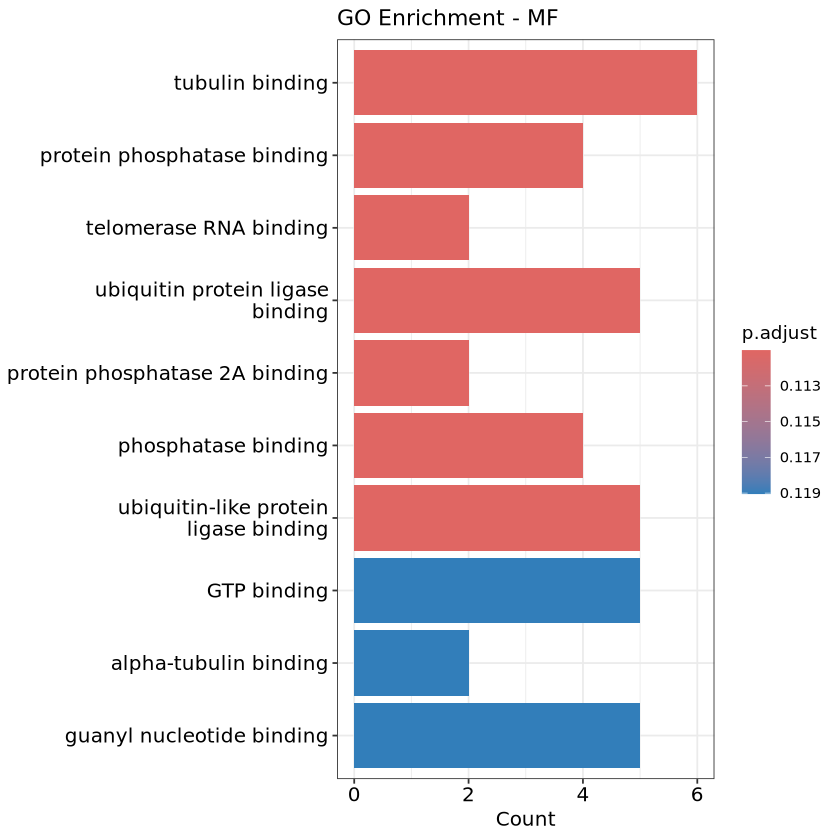

In [112]:
barplot(image_AD1_sig_gene_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [113]:
## ALR4C,GAN12(vascular), ARL3, EEF2; MAP4, KIF13A, ADORA2A(vascular), KDM2B

In [114]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_AD1_GO_MF.png', width = 6, height = 6)

### image_AD2_xQTL list

In [115]:
AD2_xQTL_ego <- enrichGO(
  gene          = image_AD2_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [116]:
head(AD2_xQTL_ego, n=5)

ID         Description                                        
GO:0009048 GO:0009048 dosage compensation by inactivation of X chromosome
GO:0007549 GO:0007549 dosage compensation                                
GO:0000086 GO:0000086 G2/M transition of mitotic cell cycle              
GO:0044839 GO:0044839 cell cycle G2/M phase transition                   
GO:0031056 GO:0031056 regulation of histone modification                 
           GeneRatio BgRatio   pvalue       p.adjust  qvalue   
GO:0009048 3/93      34/21261  0.0004394510 0.2857237 0.2657895
GO:0007549 3/93      36/21261  0.0005210389 0.2857237 0.2657895
GO:0000086 5/93      158/21261 0.0006532008 0.2857237 0.2657895
GO:0044839 5/93      174/21261 0.0010076767 0.2857237 0.2657895
GO:0031056 3/93      54/21261  0.0017100809 0.2857237 0.2657895
           geneID                                                                         
GO:0009048 ENSG00000120071/ENSG00000025293/ENSG00000012048                                
GO:0007549 ENSG00000120071/ENSG00000025293/ENSG00000012048                                
GO:0000086 ENSG00000158402/ENSG00000012048/ENSG00000254093/ENSG00000139579/ENSG00000176155
GO:0044839 ENSG00000158402/ENSG00000012048/ENSG00000254093/ENSG00000139579/ENSG00000176155
GO:0031056 ENSG00000120071/ENSG00000025293/ENSG00000012048                                
           Count
GO:0009048 3    
GO:0007549 3    
GO:0000086 5    
GO:0044839 5    
GO:0031056 3

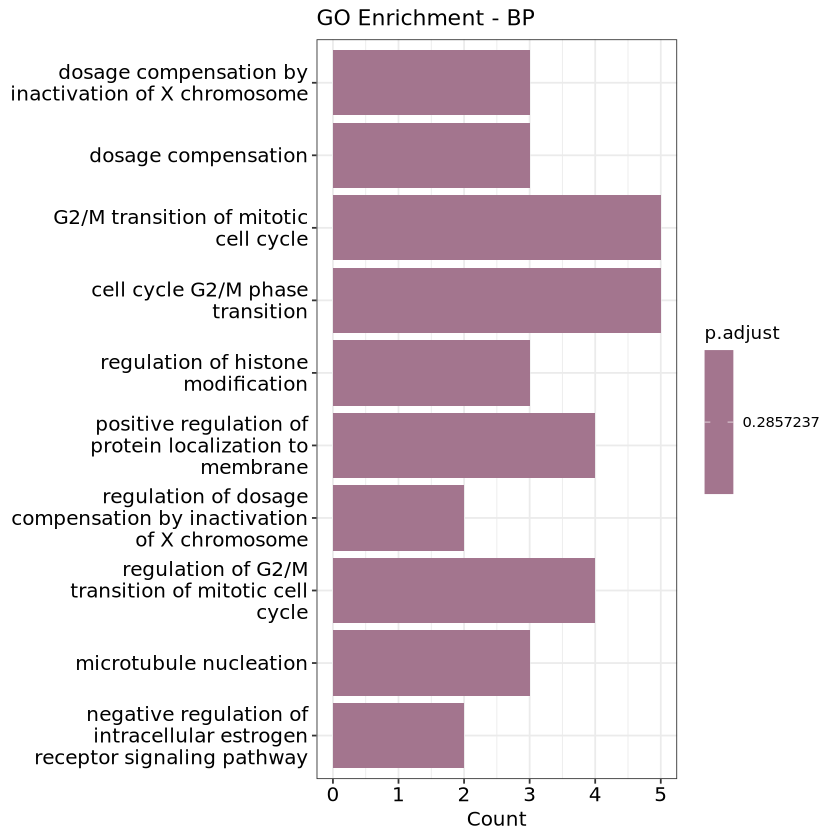

In [117]:
barplot(AD2_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [118]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_AD2_GO_BP.png', width = 6, height = 6)

In [119]:
AD2_xQTL_ego_cc <- enrichGO(
  gene          = image_AD2_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [120]:
head(AD2_xQTL_ego_cc, n=10)

ID         Description                                         
GO:0044545 GO:0044545 NSL complex                                         
GO:0001741 GO:0001741 XY body                                             
GO:0043505 GO:0043505 CENP-A containing nucleosome                        
GO:0061638 GO:0061638 CENP-A containing chromatin                         
GO:0000930 GO:0000930 gamma-tubulin complex                               
GO:0034506 GO:0034506 chromosome, centromeric core domain                 
GO:0099091 GO:0099091 postsynaptic specialization, intracellular component
GO:0000775 GO:0000775 chromosome, centromeric region                      
GO:0035770 GO:0035770 ribonucleoprotein granule                           
GO:0098687 GO:0098687 chromosomal region                                  
           GeneRatio BgRatio   pvalue      p.adjust   qvalue    
GO:0044545 2/98      13/22568  0.001411170 0.09147426 0.08108522
GO:0001741 2/98      16/22568  0.002152683 0.09147426 0.08108522
GO:0043505 2/98      18/22568  0.002729197 0.09147426 0.08108522
GO:0061638 2/98      18/22568  0.002729197 0.09147426 0.08108522
GO:0000930 2/98      20/22568  0.003370104 0.09147426 0.08108522
GO:0034506 2/98      20/22568  0.003370104 0.09147426 0.08108522
GO:0099091 2/98      20/22568  0.003370104 0.09147426 0.08108522
GO:0000775 5/98      277/22568 0.007221603 0.17151306 0.15203374
GO:0035770 5/98      312/22568 0.011684205 0.22405412 0.19860753
GO:0098687 6/98      444/22568 0.012928171 0.22405412 0.19860753
           geneID                                                                                         
GO:0044545 ENSG00000120071/ENSG00000025293                                                                
GO:0001741 ENSG00000012048/ENSG00000143194                                                                
GO:0043505 ENSG00000278463/ENSG00000275126                                                                
GO:0061638 ENSG00000278463/ENSG00000275126                                                                
GO:0000930 ENSG00000012048/ENSG00000037042                                                                
GO:0034506 ENSG00000278463/ENSG00000275126                                                                
GO:0099091 ENSG00000156599/ENSG00000198561                                                                
GO:0000775 ENSG00000120071/ENSG00000278463/ENSG00000275126/ENSG00000254093/ENSG00000175216                
GO:0035770 ENSG00000135473/ENSG00000143194/ENSG00000144580/ENSG00000144535/ENSG00000136270                
GO:0098687 ENSG00000120071/ENSG00000278463/ENSG00000275126/ENSG00000254093/ENSG00000175216/ENSG00000139579
           Count
GO:0044545 2    
GO:0001741 2    
GO:0043505 2    
GO:0061638 2    
GO:0000930 2    
GO:0034506 2    
GO:0099091 2    
GO:0000775 5    
GO:0035770 5    
GO:0098687 6

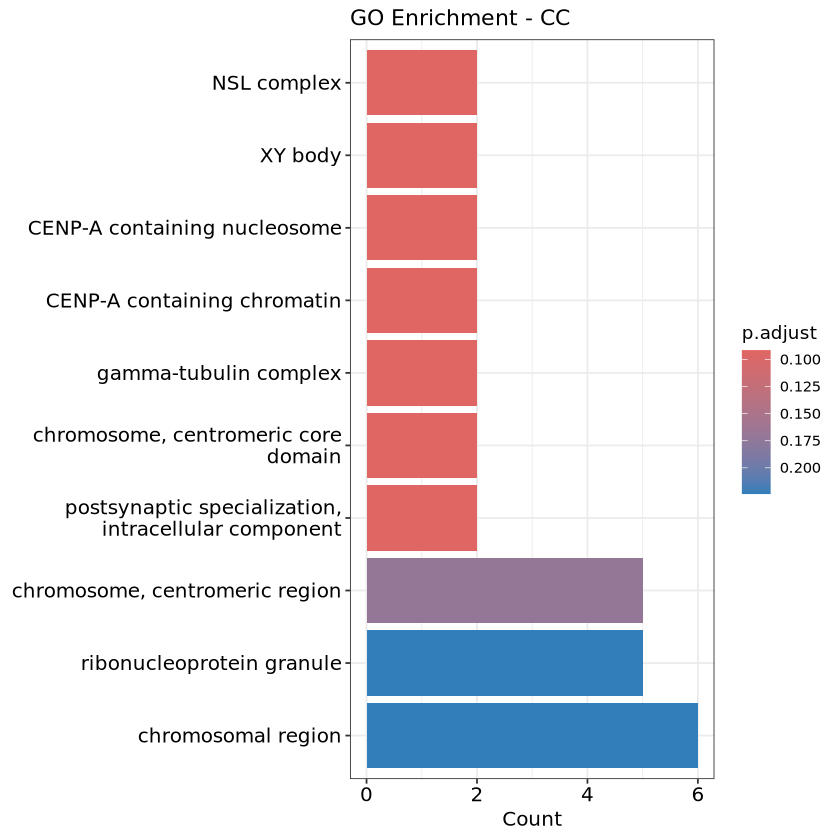

In [121]:
barplot(AD2_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [122]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_AD2_GO_CC.png', width = 6, height = 6)

In [123]:
AD2_xQTL_ego_mf <- enrichGO(
  gene          = image_AD2_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [124]:
head(AD2_xQTL_ego_mf, n=10)

ID        
GO:0016667 GO:0016667
GO:0019887 GO:0019887
GO:0019207 GO:0019207
GO:0030527 GO:0030527
GO:0015036 GO:0015036
GO:0000175 GO:0000175
GO:0016896 GO:0016896
GO:0004532 GO:0004532
GO:1990782 GO:1990782
GO:0008408 GO:0008408
           Description                                                
GO:0016667 oxidoreductase activity, acting on a sulfur group of donors
GO:0019887 protein kinase regulator activity                          
GO:0019207 kinase regulator activity                                  
GO:0030527 structural constituent of chromatin                        
GO:0015036 disulfide oxidoreductase activity                          
GO:0000175 3'-5'-RNA exonuclease activity                             
GO:0016896 RNA exonuclease activity, producing 5'-phosphomonoesters   
GO:0004532 RNA exonuclease activity                                   
GO:1990782 protein tyrosine kinase binding                            
GO:0008408 3'-5' exonuclease activity                                 
           GeneRatio BgRatio   pvalue      p.adjust qvalue   
GO:0016667 3/94      60/21059  0.002451710 0.358386 0.3411481
GO:0019887 5/94      249/21059 0.005189290 0.358386 0.3411481
GO:0019207 5/94      282/21059 0.008665716 0.358386 0.3411481
GO:0030527 3/94      101/21059 0.010471675 0.358386 0.3411481
GO:0015036 2/94      37/21059  0.011861571 0.358386 0.3411481
GO:0000175 2/94      38/21059  0.012484505 0.358386 0.3411481
GO:0016896 2/94      41/21059  0.014436984 0.358386 0.3411481
GO:0004532 2/94      43/21059  0.015807030 0.358386 0.3411481
GO:1990782 3/94      136/21059 0.023055166 0.358386 0.3411481
GO:0008408 2/94      61/21059  0.030422207 0.358386 0.3411481
           geneID                                                                         
GO:0016667 ENSG00000174099/ENSG00000086619/ENSG00000213593                                
GO:0019887 ENSG00000088992/ENSG00000204435/ENSG00000186834/ENSG00000185104/ENSG00000175224
GO:0019207 ENSG00000088992/ENSG00000204435/ENSG00000186834/ENSG00000185104/ENSG00000175224
GO:0030527 ENSG00000278463/ENSG00000275126/ENSG00000196787                                
GO:0015036 ENSG00000086619/ENSG00000213593                                                
GO:0000175 ENSG00000135473/ENSG00000144535                                                
GO:0016896 ENSG00000135473/ENSG00000144535                                                
GO:0004532 ENSG00000135473/ENSG00000144535                                                
GO:1990782 ENSG00000108861/ENSG00000134569/ENSG00000198561                                
GO:0008408 ENSG00000135473/ENSG00000144535                                                
           Count
GO:0016667 3    
GO:0019887 5    
GO:0019207 5    
GO:0030527 3    
GO:0015036 2    
GO:0000175 2    
GO:0016896 2    
GO:0004532 2    
GO:1990782 3    
GO:0008408 2

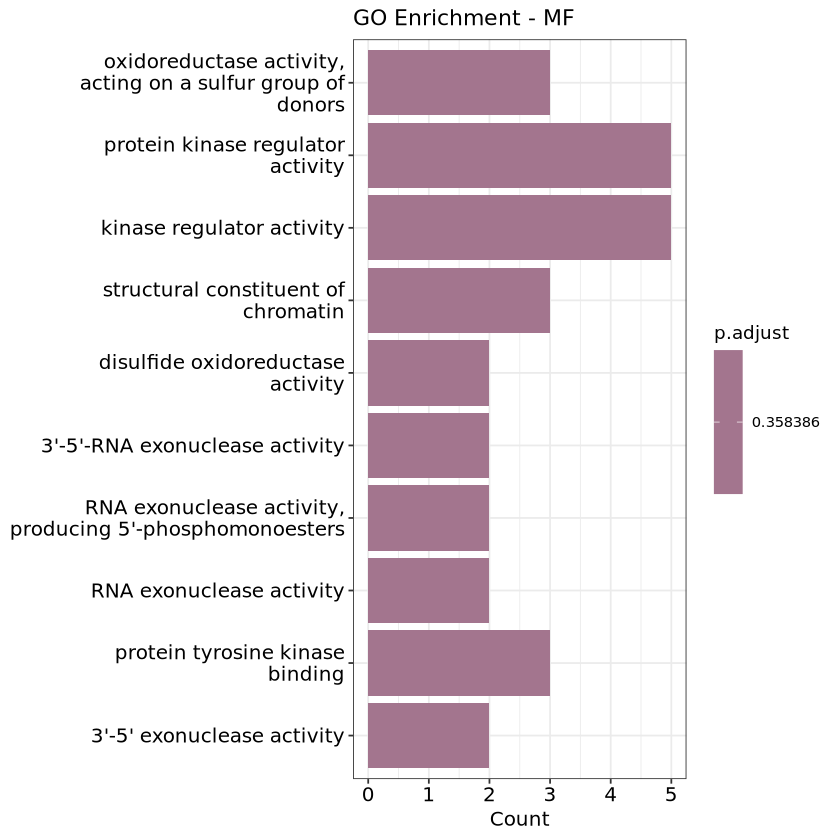

In [125]:
barplot(AD2_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [126]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_AD2_GO_MF.png', width = 6, height = 6)

### image_Aging1_xQTL list

In [127]:
Aging1_xQTL_ego <- enrichGO(
  gene          = image_Aging1_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [128]:
head(Aging1_xQTL_ego, n=5)

ID         Description                                              
GO:0006970 GO:0006970 response to osmotic stress                               
GO:1904869 GO:1904869 regulation of protein localization to Cajal body         
GO:1904871 GO:1904871 positive regulation of protein localization to Cajal body
GO:0006068 GO:0006068 ethanol catabolic process                                
GO:1903405 GO:1903405 protein localization to nuclear body                     
           GeneRatio BgRatio  pvalue      p.adjust  qvalue   
GO:0006970 4/117     89/21261 0.001483696 0.5077077 0.5067132
GO:1904869 2/117     12/21261 0.001911525 0.5077077 0.5067132
GO:1904871 2/117     12/21261 0.001911525 0.5077077 0.5067132
GO:0006068 2/117     13/21261 0.002250963 0.5077077 0.5067132
GO:1903405 2/117     13/21261 0.002250963 0.5077077 0.5067132
           geneID                                                         
GO:0006970 ENSG00000188603/ENSG00000166925/ENSG00000102908/ENSG00000088836
GO:1904869 ENSG00000146834/ENSG00000120438                                
GO:1904871 ENSG00000146834/ENSG00000120438                                
GO:0006068 ENSG00000196502/ENSG00000197165                                
GO:1903405 ENSG00000146834/ENSG00000120438                                
           Count
GO:0006970 4    
GO:1904869 2    
GO:1904871 2    
GO:0006068 2    
GO:1903405 2

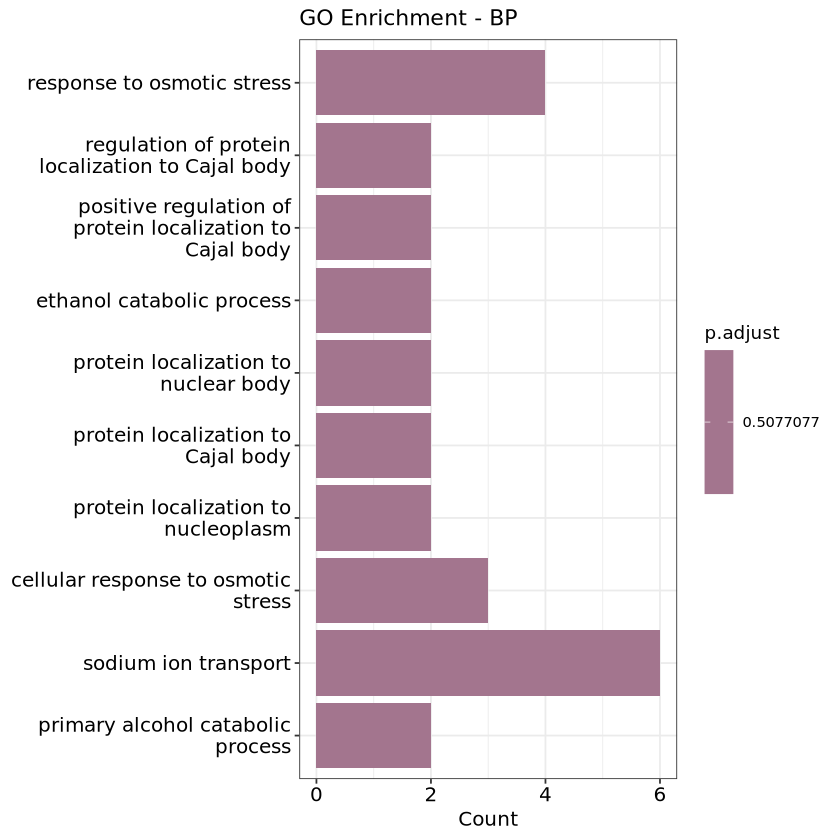

In [129]:
barplot(Aging1_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [130]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_Aging1_GO_BP.png', width = 6, height = 6)

In [131]:
Aging1_xQTL_ego_cc <- enrichGO(
  gene          = image_Aging1_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [132]:
head(Aging1_xQTL_ego_cc, n=5)

ID         Description                       GeneRatio BgRatio 
GO:0034358 GO:0034358 plasma lipoprotein particle       4/119     44/22568
GO:1990777 GO:1990777 lipoprotein particle              4/119     44/22568
GO:0032994 GO:0032994 protein-lipid complex             4/119     47/22568
GO:0034364 GO:0034364 high-density lipoprotein particle 3/119     33/22568
GO:0070971 GO:0070971 endoplasmic reticulum exit site   3/119     44/22568
           pvalue       p.adjust   qvalue     
GO:0034358 0.0000847565 0.01008458 0.009457313
GO:1990777 0.0000847565 0.01008458 0.009457313
GO:0032994 0.0001100136 0.01008458 0.009457313
GO:0034364 0.0006948678 0.04777216 0.044800685
GO:0070971 0.0016171102 0.08894106 0.083408841
           geneID                                                         
GO:0034358 ENSG00000184730/ENSG00000204444/ENSG00000148965/ENSG00000134339
GO:1990777 ENSG00000184730/ENSG00000204444/ENSG00000148965/ENSG00000134339
GO:0032994 ENSG00000184730/ENSG00000204444/ENSG00000148965/ENSG00000134339
GO:0034364 ENSG00000204444/ENSG00000148965/ENSG00000134339                
GO:0070971 ENSG00000170248/ENSG00000138674/ENSG00000206503                
           Count
GO:0034358 4    
GO:1990777 4    
GO:0032994 4    
GO:0034364 3    
GO:0070971 3

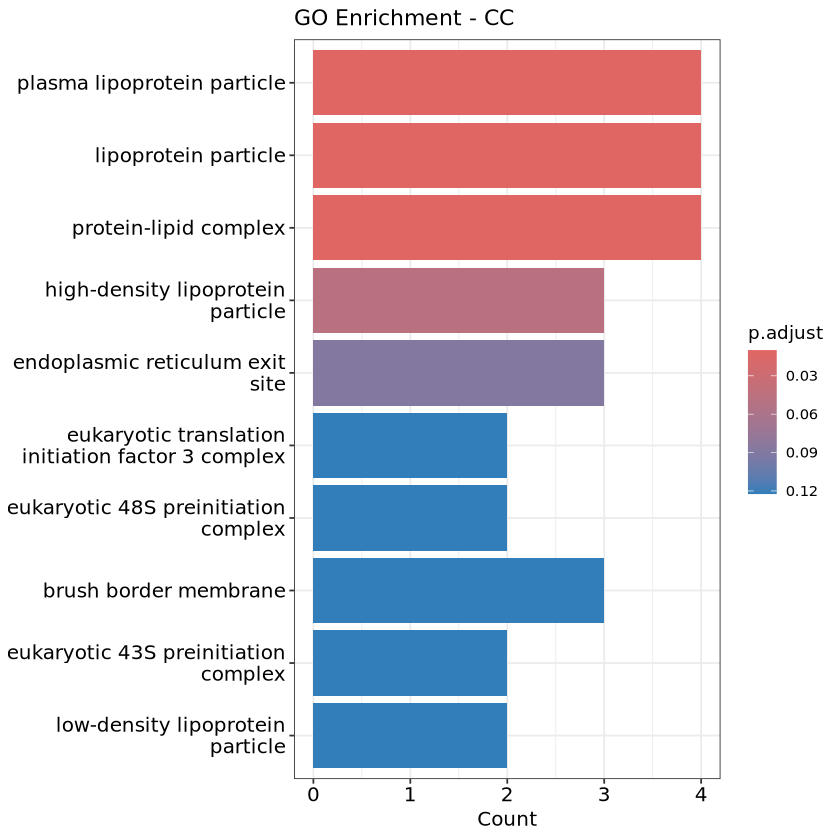

In [133]:
barplot(Aging1_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [134]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_Aging1_GO_CC.png', width = 6, height = 6)

In [135]:
Aging1_xQTL_ego_mf <- enrichGO(
  gene          = image_Aging1_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [136]:
head(Aging1_xQTL_ego_mf, n=10)

ID         Description                                             
GO:0004062 GO:0004062 aryl sulfotransferase activity                          
GO:0008135 GO:0008135 translation factor activity, RNA binding                
GO:0015081 GO:0015081 sodium ion transmembrane transporter activity           
GO:0003743 GO:0003743 translation initiation factor activity                  
GO:0022853 GO:0022853 active monoatomic ion transmembrane transporter activity
GO:0015386 GO:0015386 potassium:proton antiporter activity                    
GO:0015385 GO:0015385 sodium:proton antiporter activity                       
GO:0090079 GO:0090079 translation regulator activity, nucleic acid binding    
GO:0022821 GO:0022821 solute:potassium antiporter activity                    
GO:0089720 GO:0089720 caspase binding                                         
           GeneRatio BgRatio   pvalue      p.adjust  qvalue   
GO:0004062 2/116     10/21059  0.001315132 0.1641680 0.1571533
GO:0008135 4/116     97/21059  0.002042201 0.1641680 0.1571533
GO:0015081 5/116     164/21059 0.002157090 0.1641680 0.1571533
GO:0003743 3/116     52/21059  0.002957077 0.1641680 0.1571533
GO:0022853 6/116     262/21059 0.003323847 0.1641680 0.1571533
GO:0015386 2/116     16/21059  0.003432083 0.1641680 0.1571533
GO:0015385 2/116     18/21059  0.004344567 0.1721203 0.1647658
GO:0090079 4/116     123/21059 0.004797778 0.1721203 0.1647658
GO:0022821 2/116     21/21059  0.005899255 0.1881207 0.1800825
GO:0089720 2/116     24/21059  0.007670360 0.2201393 0.2107330
           geneID                                                                                         
GO:0004062 ENSG00000196502/ENSG00000197165                                                                
GO:0008135 ENSG00000178952/ENSG00000205609/ENSG00000184110/ENSG00000119718                                
GO:0015081 ENSG00000158865/ENSG00000135740/ENSG00000168575/ENSG00000066230/ENSG00000088836                
GO:0003743 ENSG00000205609/ENSG00000184110/ENSG00000119718                                                
GO:0022853 ENSG00000131055/ENSG00000158865/ENSG00000196296/ENSG00000135740/ENSG00000168575/ENSG00000066230
GO:0015386 ENSG00000135740/ENSG00000066230                                                                
GO:0015385 ENSG00000135740/ENSG00000066230                                                                
GO:0090079 ENSG00000178952/ENSG00000205609/ENSG00000184110/ENSG00000119718                                
GO:0022821 ENSG00000135740/ENSG00000066230                                                                
GO:0089720 ENSG00000140939/ENSG00000091106                                                                
           Count
GO:0004062 2    
GO:0008135 4    
GO:0015081 5    
GO:0003743 3    
GO:0022853 6    
GO:0015386 2    
GO:0015385 2    
GO:0090079 4    
GO:0022821 2    
GO:0089720 2

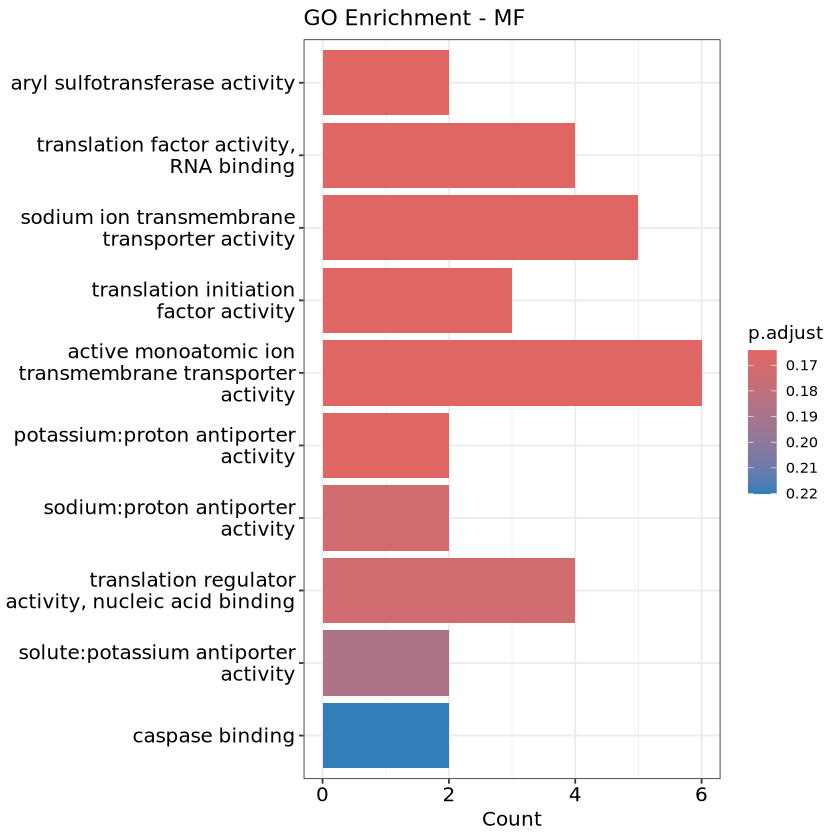

In [137]:
barplot(Aging1_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [138]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_Aging1_GO_MF.png', width = 6, height = 6)

### image_Aging2_xQTL list

In [139]:
Aging2_xQTL_ego <- enrichGO(
  gene          = image_Aging2_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [140]:
head(Aging2_xQTL_ego, n=5)

ID        
GO:0000723 GO:0000723
GO:0032200 GO:0032200
GO:0032204 GO:0032204
GO:1904356 GO:1904356
GO:1904357 GO:1904357
           Description                                                         
GO:0000723 telomere maintenance                                                
GO:0032200 telomere organization                                               
GO:0032204 regulation of telomere maintenance                                  
GO:1904356 regulation of telomere maintenance via telomere lengthening         
GO:1904357 negative regulation of telomere maintenance via telomere lengthening
           GeneRatio BgRatio   pvalue       p.adjust    qvalue     
GO:0000723 7/74      185/21261 3.710030e-06 0.005234852 0.004709786
GO:0032200 7/74      218/21261 1.087553e-05 0.007672687 0.006903100
GO:0032204 5/74      130/21261 9.090227e-05 0.036752529 0.033066172
GO:1904356 4/74      70/21261  1.041886e-04 0.036752529 0.033066172
GO:1904357 3/74      32/21261  1.867019e-04 0.052687284 0.047402637
           geneID                                                                                                         
GO:0000723 ENSG00000102882/ENSG00000169592/ENSG00000132604/ENSG00000181625/ENSG00000254093/ENSG00000106399/ENSG00000108384
GO:0032200 ENSG00000102882/ENSG00000169592/ENSG00000132604/ENSG00000181625/ENSG00000254093/ENSG00000106399/ENSG00000108384
GO:0032204 ENSG00000102882/ENSG00000169592/ENSG00000132604/ENSG00000181625/ENSG00000254093                                
GO:1904356 ENSG00000102882/ENSG00000132604/ENSG00000181625/ENSG00000254093                                                
GO:1904357 ENSG00000132604/ENSG00000181625/ENSG00000254093                                                                
           Count
GO:0000723 7    
GO:0032200 7    
GO:0032204 5    
GO:1904356 4    
GO:1904357 3

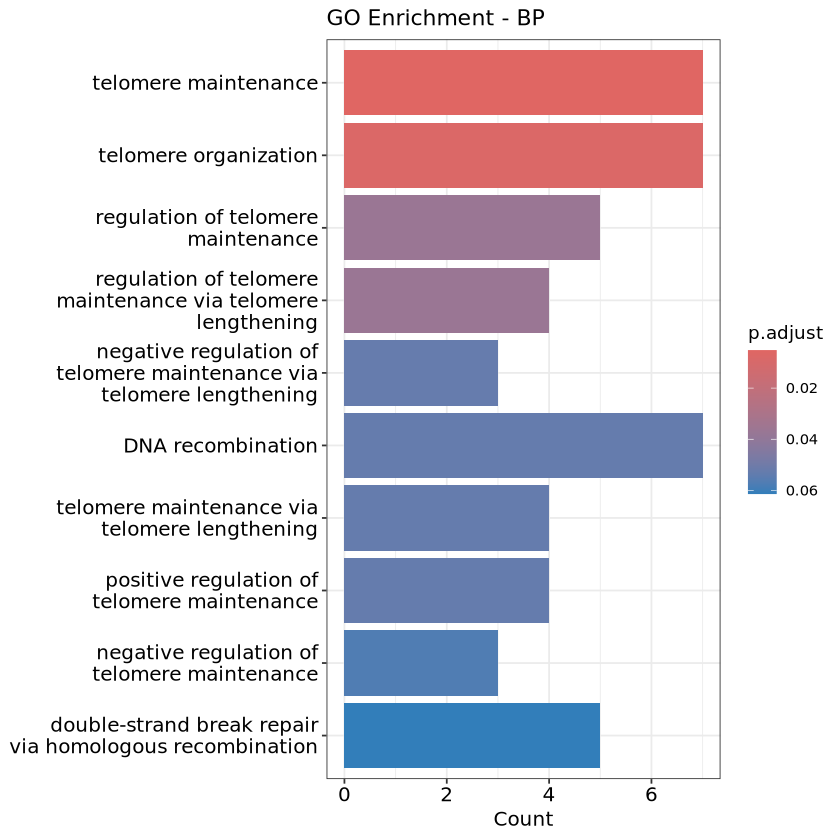

In [141]:
barplot(Aging2_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [142]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_Aging2_GO_BP.png', width = 6, height = 6)

In [143]:
Aging2_xQTL_ego_cc <- enrichGO(
  gene          = image_Aging2_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [144]:
head(Aging2_xQTL_ego_cc, n=5)

ID         Description                        GeneRatio BgRatio  
GO:0000151 GO:0000151 ubiquitin ligase complex           6/78      335/22568
GO:0005643 GO:0005643 nuclear pore                       3/78      101/22568
GO:0031463 GO:0031463 Cul3-RING ubiquitin ligase complex 2/78      36/22568 
GO:0000228 GO:0000228 nuclear chromosome                 4/78      245/22568
GO:0001673 GO:0001673 male germ cell nucleus             2/78      54/22568 
           pvalue      p.adjust  qvalue   
GO:0000151 0.001071085 0.1456676 0.1262753
GO:0005643 0.005191001 0.2639954 0.2288505
GO:0031463 0.006885018 0.2639954 0.2288505
GO:0000228 0.010328170 0.2639954 0.2288505
GO:0001673 0.015025213 0.2639954 0.2288505
           geneID                                                                                         
GO:0000151 ENSG00000174989/ENSG00000174943/ENSG00000123091/ENSG00000135108/ENSG00000122550/ENSG00000127334
GO:0005643 ENSG00000184575/ENSG00000136243/ENSG00000183426                                                
GO:0031463 ENSG00000174943/ENSG00000122550                                                                
GO:0000228 ENSG00000169592/ENSG00000181625/ENSG00000254093/ENSG00000106399                                
GO:0001673 ENSG00000132604/ENSG00000143194                                                                
           Count
GO:0000151 6    
GO:0005643 3    
GO:0031463 2    
GO:0000228 4    
GO:0001673 2

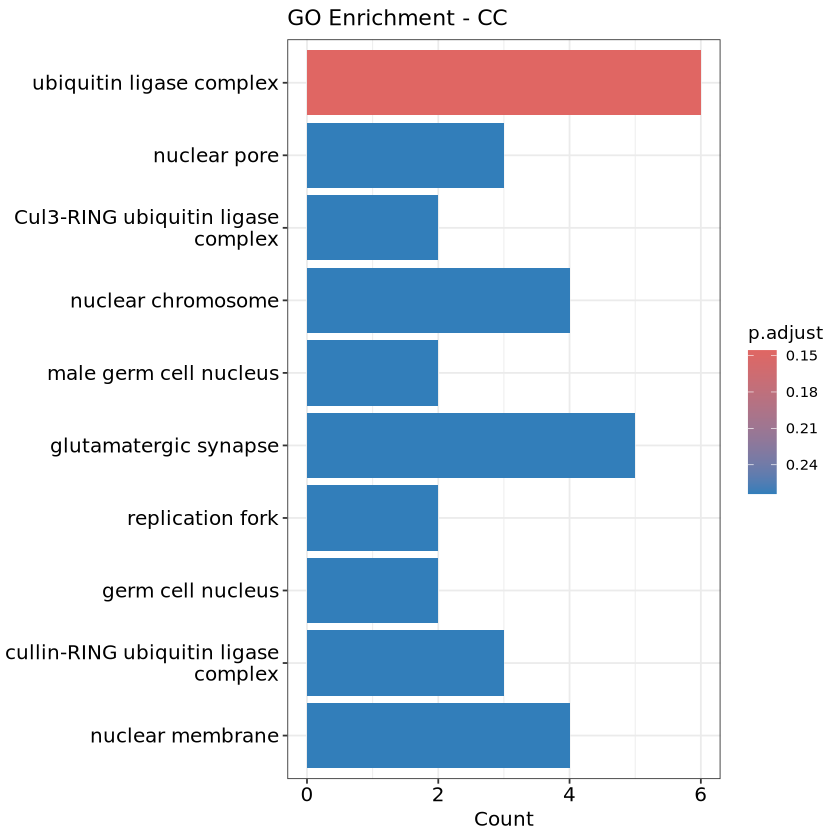

In [145]:
barplot(Aging2_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [146]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_Aging2_GO_CC.png', width = 6, height = 6)

In [147]:
Aging2_xQTL_ego_mf <- enrichGO(
  gene          = image_Aging2_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [148]:
head(Aging2_xQTL_ego_mf, n=15)

ID        
GO:0042578 GO:0042578
GO:0016889 GO:0016889
GO:0004722 GO:0004722
GO:0106310 GO:0106310
GO:0016791 GO:0016791
GO:0017018 GO:0017018
GO:0004709 GO:0004709
GO:0016894 GO:0016894
GO:0004721 GO:0004721
GO:0004674 GO:0004674
GO:0004520 GO:0004520
GO:0000287 GO:0000287
GO:0004712 GO:0004712
GO:0005539 GO:0005539
GO:0016504 GO:0016504
           Description                                                                                                 
GO:0042578 phosphoric ester hydrolase activity                                                                         
GO:0016889 DNA endonuclease activity, producing 3'-phosphomonoesters                                                   
GO:0004722 protein serine/threonine phosphatase activity                                                               
GO:0106310 protein serine kinase activity                                                                              
GO:0016791 phosphatase activity                                                                                        
GO:0017018 myosin phosphatase activity                                                                                 
GO:0004709 MAP kinase kinase kinase activity                                                                           
GO:0016894 endonuclease activity, active with either ribo- or deoxyribonucleic acids and producing 3'-phosphomonoesters
GO:0004721 phosphoprotein phosphatase activity                                                                         
GO:0004674 protein serine/threonine kinase activity                                                                    
GO:0004520 DNA endonuclease activity                                                                                   
GO:0000287 magnesium ion binding                                                                                       
GO:0004712 protein serine/threonine/tyrosine kinase activity                                                           
GO:0005539 glycosaminoglycan binding                                                                                   
GO:0016504 peptidase activator activity                                                                                
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0042578 7/74      390/21059 0.0004386819 0.03865061 0.03266813
GO:0016889 2/74      10/21059  0.0005382577 0.03865061 0.03266813
GO:0004722 4/74      108/21059 0.0005711912 0.03865061 0.03266813
GO:0106310 6/74      377/21059 0.0021047896 0.10249668 0.08663189
GO:0016791 5/74      292/21059 0.0036582807 0.10249668 0.08663189
GO:0017018 3/74      90/21059  0.0039307862 0.10249668 0.08663189
GO:0004709 2/74      27/21059  0.0040392781 0.10249668 0.08663189
GO:0016894 2/74      27/21059  0.0040392781 0.10249668 0.08663189
GO:0004721 4/74      192/21059 0.0046878569 0.10573722 0.08937084
GO:0004674 6/74      467/21059 0.0059868755 0.12153357 0.10272218
GO:0004520 2/74      42/21059  0.0095775282 0.17427623 0.14730114
GO:0000287 4/74      241/21059 0.0103020431 0.17427623 0.14730114
GO:0004712 2/74      49/21059  0.0128764329 0.20107045 0.16994806
GO:0005539 4/74      273/21059 0.0156510882 0.21775605 0.18405100
GO:0016504 2/74      56/21059  0.0165981419 0.21775605 0.18405100
           geneID                                                                                                         
GO:0042578 ENSG00000107902/ENSG00000102886/ENSG00000141298/ENSG00000149923/ENSG00000175175/ENSG00000124181/ENSG00000108389
GO:0016889 ENSG00000181625/ENSG00000108384                                                                                
GO:0004722 ENSG00000141298/ENSG00000149923/ENSG00000175175/ENSG00000108389                                                
GO:0106310 ENSG00000102882/ENSG00000006062/ENSG00000149930/ENSG00000086015/ENSG00000069020/ENSG00000127334                
GO:0016791 ENSG00000107902/ENSG00000141298/ENSG00000149923/ENSG00000

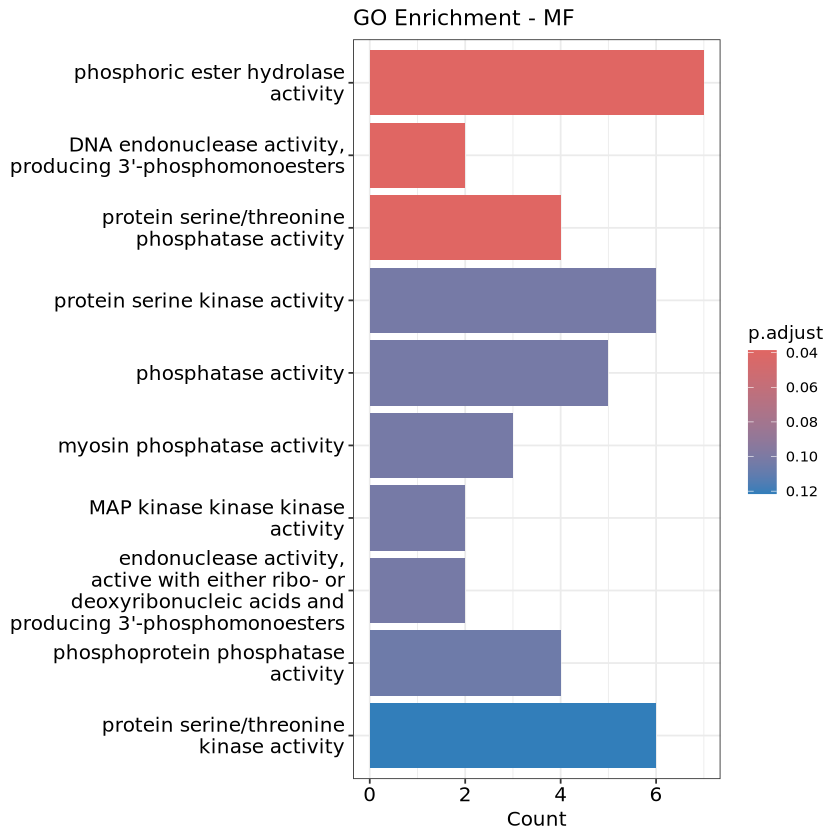

In [149]:
barplot(Aging2_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [150]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_Aging2_GO_MF.png', width = 6, height = 6)

### image_Aging3_xQTL list

In [151]:
Aging3_xQTL_ego <- enrichGO(
  gene          = image_Aging3_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [152]:
head(Aging3_xQTL_ego, n=10)

ID        
GO:0034763 GO:0034763
GO:0051647 GO:0051647
GO:0030307 GO:0030307
GO:0007009 GO:0007009
GO:0048708 GO:0048708
GO:0045773 GO:0045773
GO:0032872 GO:0032872
GO:0031281 GO:0031281
GO:0070302 GO:0070302
GO:0035934 GO:0035934
           Description                                                    
GO:0034763 negative regulation of transmembrane transport                 
GO:0051647 nucleus localization                                           
GO:0030307 positive regulation of cell growth                             
GO:0007009 plasma membrane organization                                   
GO:0048708 astrocyte differentiation                                      
GO:0045773 positive regulation of axon extension                          
GO:0032872 regulation of stress-activated MAPK cascade                    
GO:0031281 positive regulation of cyclase activity                        
GO:0070302 regulation of stress-activated protein kinase signaling cascade
GO:0035934 corticosterone secretion                                       
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0034763 5/56      160/21261 6.353188e-05 0.05209156 0.04061519
GO:0051647 3/56      33/21261  8.928427e-05 0.05209156 0.04061519
GO:0030307 5/56      183/21261 1.197273e-04 0.05209156 0.04061519
GO:0007009 5/56      194/21261 1.573212e-04 0.05209156 0.04061519
GO:0048708 4/56      105/21261 1.693250e-04 0.05209156 0.04061519
GO:0045773 3/56      44/21261  2.123275e-04 0.05209156 0.04061519
GO:0032872 5/56      208/21261 2.175224e-04 0.05209156 0.04061519
GO:0031281 3/56      45/21261  2.270699e-04 0.05209156 0.04061519
GO:0070302 5/56      211/21261 2.324363e-04 0.05209156 0.04061519
GO:0035934 2/56      10/21261  3.025042e-04 0.05546828 0.04324798
           geneID                                                                         
GO:0034763 ENSG00000232810/ENSG00000136717/ENSG00000185950/ENSG00000263715/ENSG00000120088
GO:0051647 ENSG00000136717/ENSG00000070831/ENSG00000100242                                
GO:0030307 ENSG00000112715/ENSG00000070831/ENSG00000187164/ENSG00000089094/ENSG00000186868
GO:0007009 ENSG00000115306/ENSG00000171044/ENSG00000136717/ENSG00000185294/ENSG00000073969
GO:0048708 ENSG00000232810/ENSG00000136717/ENSG00000102882/ENSG00000186868                
GO:0045773 ENSG00000112715/ENSG00000187164/ENSG00000186868                                
GO:0032872 ENSG00000232810/ENSG00000112715/ENSG00000147324/ENSG00000102882/ENSG00000078747
GO:0031281 ENSG00000102882/ENSG00000263715/ENSG00000120088                                
GO:0070302 ENSG00000232810/ENSG00000112715/ENSG00000147324/ENSG00000102882/ENSG00000078747
GO:0035934 ENSG00000263715/ENSG00000120088                                                
           Count
GO:0034763 5    
GO:0051647 3    
GO:0030307 5    
GO:0007009 5    
GO:0048708 4    
GO:0045773 3    
GO:0032872 5    
GO:0031281 3    
GO:0070302 5    
GO:0035934 2

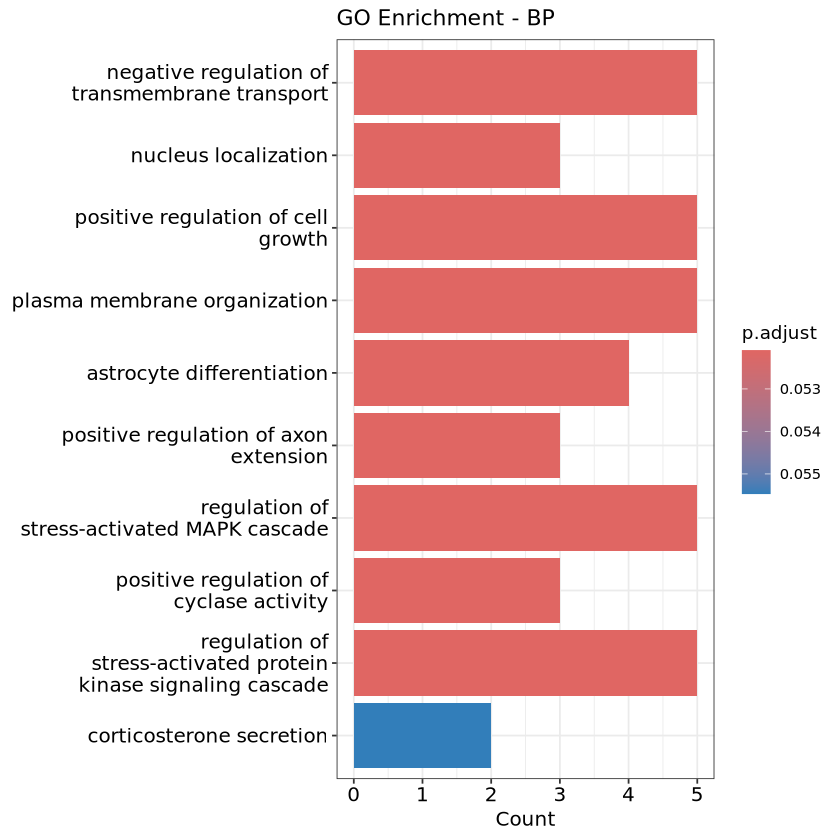

In [153]:
barplot(Aging3_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [154]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_Aging3_GO_BP.png', width = 6, height = 6)

In [155]:
Aging3_xQTL_ego_cc <- enrichGO(
  gene          = image_Aging3_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [156]:
head(Aging3_xQTL_ego_cc, n=5)

ID         Description           GeneRatio BgRatio   pvalue      
GO:0044754 GO:0044754 autolysosome          2/59      16/22568  0.0007875152
GO:0044304 GO:0044304 main axon             3/59      81/22568  0.0012528379
GO:0005767 GO:0005767 secondary lysosome    2/59      23/22568  0.0016409305
GO:0030673 GO:0030673 axolemma              2/59      26/22568  0.0020973254
GO:0098978 GO:0098978 glutamatergic synapse 5/59      440/22568 0.0058131608
           p.adjust   qvalue    
GO:0044754 0.09647697 0.08058145
GO:0044304 0.09647697 0.08058145
GO:0005767 0.09647697 0.08058145
GO:0030673 0.09647697 0.08058145
GO:0098978 0.17241457 0.14400759
           geneID                                                                         
GO:0044754 ENSG00000225190/ENSG00000101460                                                
GO:0044304 ENSG00000115306/ENSG00000136717/ENSG00000186868                                
GO:0005767 ENSG00000225190/ENSG00000101460                                                
GO:0030673 ENSG00000115306/ENSG00000186868                                                
GO:0098978 ENSG00000115306/ENSG00000136717/ENSG00000070831/ENSG00000102882/ENSG00000101460
           Count
GO:0044754 2    
GO:0044304 3    
GO:0005767 2    
GO:0030673 2    
GO:0098978 5

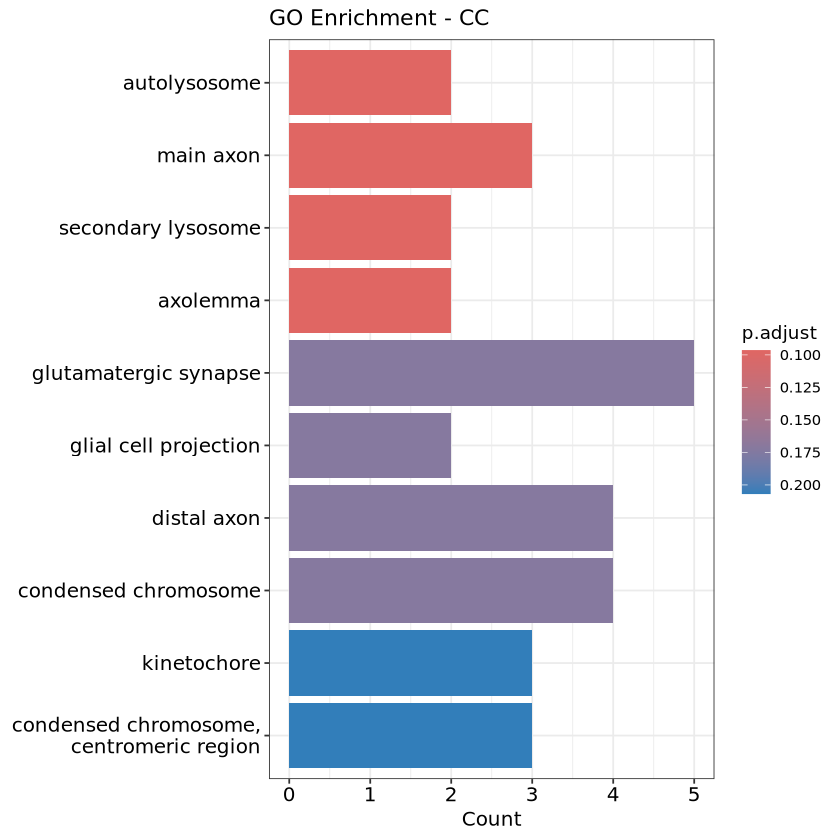

In [157]:
barplot(Aging3_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [158]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_Aging3_GO_CC.png', width = 6, height = 6)

PLEKHM1,MAP1LC3A, MAPT,STPBN1, CDC42,DOC2A,MAPK3,SPTBN1,MAP1LC3A are highly related with mitophagy.

In [159]:
Aging3_xQTL_ego_mf <- enrichGO(
  gene          = image_Aging3_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [160]:
head(Aging3_xQTL_ego_mf, n=10)

ID         Description                           GeneRatio BgRatio  
GO:0019902 GO:0019902 phosphatase binding                   5/55      230/21059
GO:0051721 GO:0051721 protein phosphatase 2A binding        2/55      33/21059 
GO:0017046 GO:0017046 peptide hormone binding               2/55      55/21059 
GO:0019903 GO:0019903 protein phosphatase binding           3/55      175/21059
GO:0043021 GO:0043021 ribonucleoprotein complex binding     3/55      201/21059
GO:0044389 GO:0044389 ubiquitin-like protein ligase binding 4/55      382/21059
GO:0019843 GO:0019843 rRNA binding                          2/55      81/21059 
GO:0051015 GO:0051015 actin filament binding                3/55      225/21059
GO:0005525 GO:0005525 GTP binding                           4/55      411/21059
GO:0042562 GO:0042562 hormone binding                       2/55      92/21059 
           pvalue       p.adjust  qvalue    
GO:0019902 0.0003318158 0.0713404 0.06007613
GO:0051721 0.0033572615 0.2164485 0.18227238
GO:0017046 0.0091022697 0.2164485 0.18227238
GO:0019903 0.0107855524 0.2164485 0.18227238
GO:0043021 0.0156210980 0.2164485 0.18227238
GO:0044389 0.0175808464 0.2164485 0.18227238
GO:0019843 0.0190206887 0.2164485 0.18227238
GO:0051015 0.0210098280 0.2164485 0.18227238
GO:0005525 0.0223202127 0.2164485 0.18227238
GO:0042562 0.0241311586 0.2164485 0.18227238
           geneID                                                                         
GO:0019902 ENSG00000147324/ENSG00000185950/ENSG00000102882/ENSG00000186868/ENSG00000100991
GO:0051721 ENSG00000147324/ENSG00000186868                                                
GO:0017046 ENSG00000263715/ENSG00000120088                                                
GO:0019903 ENSG00000147324/ENSG00000185950/ENSG00000186868                                
GO:0043021 ENSG00000104626/ENSG00000078747/ENSG00000100201                                
GO:0044389 ENSG00000100567/ENSG00000147324/ENSG00000078747/ENSG00000101460                
GO:0019843 ENSG00000104626/ENSG00000089094                                                
GO:0051015 ENSG00000115306/ENSG00000136717/ENSG00000187164                                
GO:0005525 ENSG00000147324/ENSG00000070831/ENSG00000228696/ENSG00000185829                
GO:0042562 ENSG00000263715/ENSG00000120088                                                
           Count
GO:0019902 5    
GO:0051721 2    
GO:0017046 2    
GO:0019903 3    
GO:0043021 3    
GO:0044389 4    
GO:0019843 2    
GO:0051015 3    
GO:0005525 4    
GO:0042562 2

GTPase activity: CDC42,ARL17B, ARL17A, ATPBP1(Ubiquitination of ABCE1 by NOT4 in Response to Mitochondrial Damage Links Co-translational Quality Control to PINK1-Directed Mitophagy)

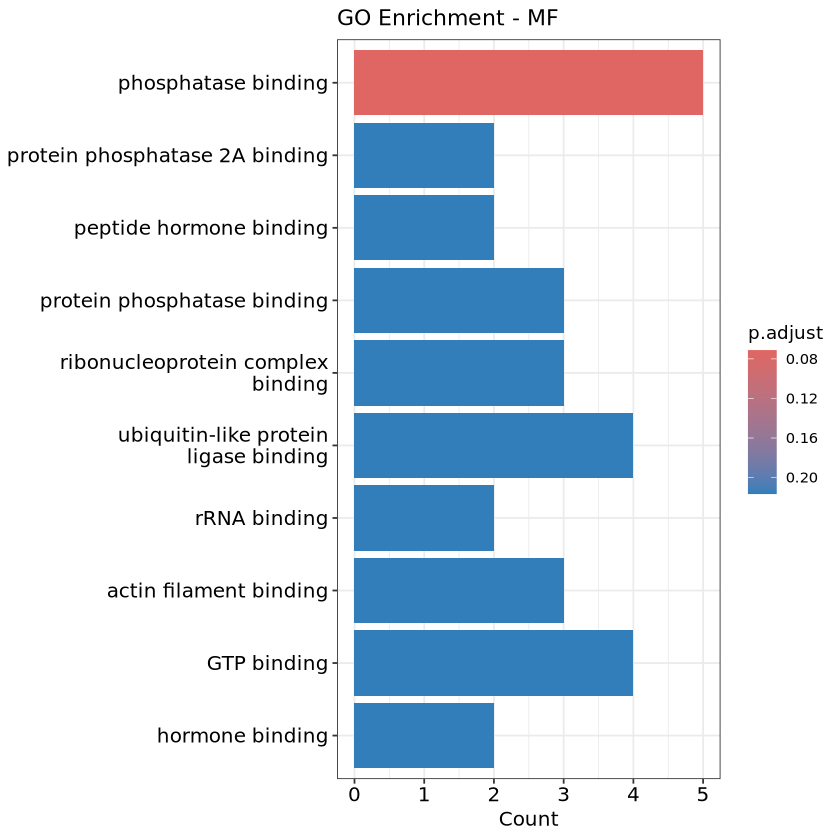

In [161]:
barplot(Aging3_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [162]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_Aging3_GO_MF.png', width = 6, height = 6)

### image_Aging4_xQTL list

In [163]:
Aging4_xQTL_ego <- enrichGO(
  gene          = image_Aging4_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [164]:
head(Aging4_xQTL_ego, n=5)

ID         Description                     GeneRatio BgRatio 
GO:0042181 GO:0042181 ketone biosynthetic process     3/45      48/21261
GO:0006744 GO:0006744 ubiquinone biosynthetic process 2/45      17/21261
GO:1901663 GO:1901663 quinone biosynthetic process    2/45      17/21261
GO:0006743 GO:0006743 ubiquinone metabolic process    2/45      19/21261
GO:0032026 GO:0032026 response to magnesium ion       2/45      20/21261
           pvalue       p.adjust  qvalue   
GO:0042181 0.0001433668 0.1482413 0.1318974
GO:0006744 0.0005838148 0.1679910 0.1494698
GO:1901663 0.0005838148 0.1679910 0.1494698
GO:0006743 0.0007320870 0.1679910 0.1494698
GO:0032026 0.0008123357 0.1679910 0.1494698
           geneID                                          Count
GO:0042181 ENSG00000153162/ENSG00000135469/ENSG00000123815 3    
GO:0006744 ENSG00000135469/ENSG00000123815                 2    
GO:1901663 ENSG00000135469/ENSG00000123815                 2    
GO:0006743 ENSG00000135469/ENSG00000123815                 2    
GO:0032026 ENSG00000133065/ENSG00000153162                 2

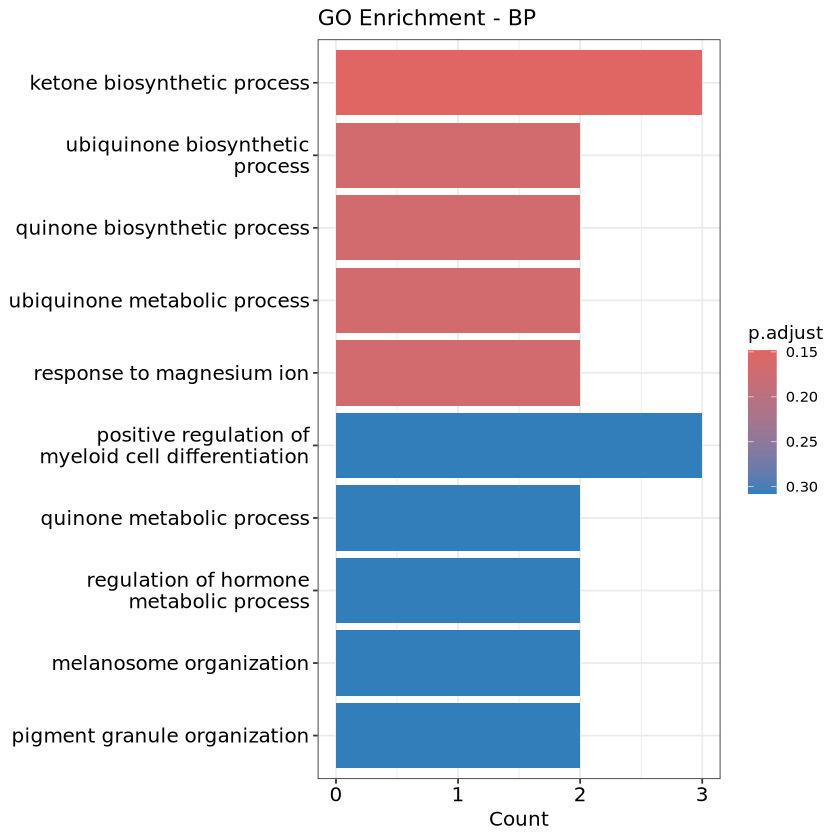

In [165]:
barplot(Aging4_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [166]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_Aging4_GO_BP.png', width = 6, height = 6)

In [167]:
Aging4_xQTL_ego_cc <- enrichGO(
  gene          = image_Aging4_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [168]:
head(Aging4_xQTL_ego_cc, n=5)

ID         Description                                      
GO:0090575 GO:0090575 RNA polymerase II transcription regulator complex
GO:0016591 GO:0016591 RNA polymerase II, holoenzyme                    
GO:0042564 GO:0042564 NLS-dependent protein nuclear import complex     
GO:0000782 GO:0000782 telomere cap complex                             
GO:0000783 GO:0000783 nuclear telomere cap complex                     
           GeneRatio BgRatio   pvalue      p.adjust  qvalue   
GO:0090575 4/48      281/22568 0.002976787 0.2919467 0.2608281
GO:0016591 2/48      99/22568  0.018849436 0.2919467 0.2608281
GO:0042564 1/48      11/22568  0.023153811 0.2919467 0.2608281
GO:0000782 1/48      13/22568  0.027306824 0.2919467 0.2608281
GO:0000783 1/48      13/22568  0.027306824 0.2919467 0.2608281
           geneID                                                         
GO:0090575 ENSG00000197780/ENSG00000196284/ENSG00000148737/ENSG00000170581
GO:0016591 ENSG00000197780/ENSG00000196284                                
GO:0042564 ENSG00000182481                                                
GO:0000782 ENSG00000107960                                                
GO:0000783 ENSG00000107960                                                
           Count
GO:0090575 4    
GO:0016591 2    
GO:0042564 1    
GO:0000782 1    
GO:0000783 1

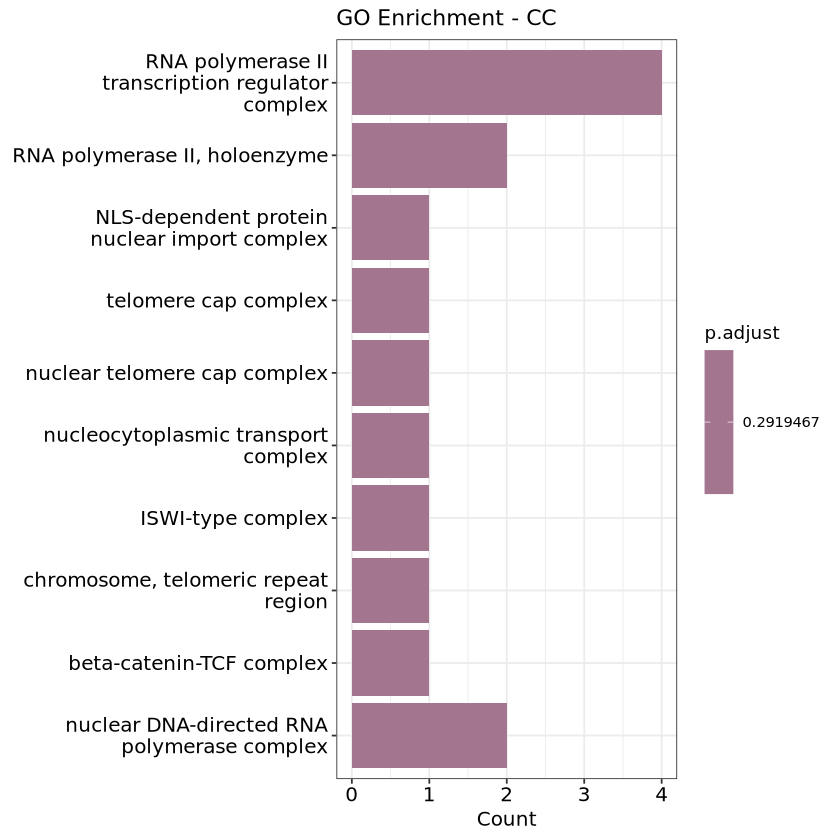

In [169]:
barplot(Aging4_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [170]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_Aging4_GO_CC.png', width = 6, height = 6)

In [171]:
Aging4_xQTL_ego_mf <- enrichGO(
  gene          = image_Aging4_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [172]:
head(Aging4_xQTL_ego_mf, n=10)

ID        
GO:0043047 GO:0043047
GO:0098847 GO:0098847
GO:0015035 GO:0015035
GO:0015036 GO:0015036
GO:0042162 GO:0042162
GO:0016667 GO:0016667
GO:0003924 GO:0003924
GO:0005525 GO:0005525
GO:0019001 GO:0019001
GO:0032561 GO:0032561
           Description                                                
GO:0043047 single-stranded telomeric DNA binding                      
GO:0098847 sequence-specific single stranded DNA binding              
GO:0015035 protein-disulfide reductase activity                       
GO:0015036 disulfide oxidoreductase activity                          
GO:0042162 telomeric DNA binding                                      
GO:0016667 oxidoreductase activity, acting on a sulfur group of donors
GO:0003924 GTPase activity                                            
GO:0005525 GTP binding                                                
GO:0019001 guanyl nucleotide binding                                  
GO:0032561 guanyl ribonucleotide binding                              
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0043047 2/49      12/21059  0.0003448765 0.04834096 0.03967322
GO:0098847 2/49      15/21059  0.0005462255 0.04834096 0.03967322
GO:0015035 2/49      30/21059  0.0022130974 0.13057275 0.10716051
GO:0015036 2/49      37/21059  0.0033533570 0.13841205 0.11359419
GO:0042162 2/49      40/21059  0.0039099449 0.13841205 0.11359419
GO:0016667 2/49      60/21059  0.0086140766 0.21348766 0.17520843
GO:0003924 4/49      353/21059 0.0090868213 0.21348766 0.17520843
GO:0005525 4/49      411/21059 0.0151796952 0.21348766 0.17520843
GO:0019001 4/49      433/21059 0.0180341220 0.21348766 0.17520843
GO:0032561 4/49      433/21059 0.0180341220 0.21348766 0.17520843
           geneID                                                         
GO:0043047 ENSG00000107960/ENSG00000139579                                
GO:0098847 ENSG00000107960/ENSG00000139579                                
GO:0015035 ENSG00000086619/ENSG00000239264                                
GO:0015036 ENSG00000086619/ENSG00000239264                                
GO:0042162 ENSG00000107960/ENSG00000139579                                
GO:0016667 ENSG00000086619/ENSG00000239264                                
GO:0003924 ENSG00000117280/ENSG00000276600/ENSG00000168827/ENSG00000146535
GO:0005525 ENSG00000117280/ENSG00000276600/ENSG00000168827/ENSG00000146535
GO:0019001 ENSG00000117280/ENSG00000276600/ENSG00000168827/ENSG00000146535
GO:0032561 ENSG00000117280/ENSG00000276600/ENSG00000168827/ENSG00000146535
           Count
GO:0043047 2    
GO:0098847 2    
GO:0015035 2    
GO:0015036 2    
GO:0042162 2    
GO:0016667 2    
GO:0003924 4    
GO:0005525 4    
GO:0019001 4    
GO:0032561 4

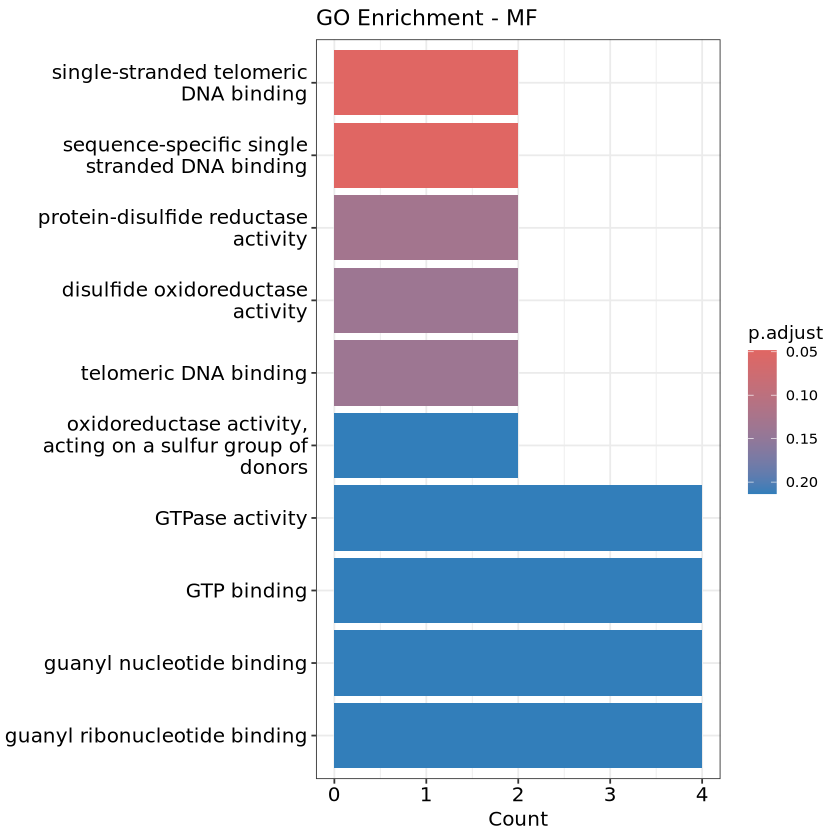

In [173]:
barplot(Aging4_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [174]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_Aging4_GO_MF.png', width = 6, height = 6)

### image_Aging5_xQTL list

In [175]:
Aging5_xQTL_ego <- enrichGO(
  gene          = image_Aging5_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [176]:
head(Aging5_xQTL_ego, n=5)

ID         Description                                        
GO:0007044 GO:0007044 cell-substrate junction assembly                   
GO:0061644 GO:0061644 protein localization to CENP-A containing chromatin
GO:0051893 GO:0051893 regulation of focal adhesion assembly              
GO:0090109 GO:0090109 regulation of cell-substrate junction assembly     
GO:0150115 GO:0150115 cell-substrate junction organization               
           GeneRatio BgRatio   pvalue       p.adjust    qvalue    
GO:0007044 7/133     104/21261 4.103762e-06 0.003026581 0.00284619
GO:0061644 4/133     18/21261  4.183995e-06 0.003026581 0.00284619
GO:0051893 6/133     70/21261  5.052342e-06 0.003026581 0.00284619
GO:0090109 6/133     70/21261  5.052342e-06 0.003026581 0.00284619
GO:0150115 7/133     111/21261 6.327544e-06 0.003026581 0.00284619
           geneID                                                                                                         
GO:0007044 ENSG00000149177/ENSG00000065618/ENSG00000108861/ENSG00000198728/ENSG00000169756/ENSG00000044524/ENSG00000035403
GO:0061644 ENSG00000273542/ENSG00000197061/ENSG00000278463/ENSG00000275126                                                
GO:0051893 ENSG00000149177/ENSG00000108861/ENSG00000198728/ENSG00000169756/ENSG00000044524/ENSG00000035403                
GO:0090109 ENSG00000149177/ENSG00000108861/ENSG00000198728/ENSG00000169756/ENSG00000044524/ENSG00000035403                
GO:0150115 ENSG00000149177/ENSG00000065618/ENSG00000108861/ENSG00000198728/ENSG00000169756/ENSG00000044524/ENSG00000035403
           Count
GO:0007044 7    
GO:0061644 4    
GO:0051893 6    
GO:0090109 6    
GO:0150115 7

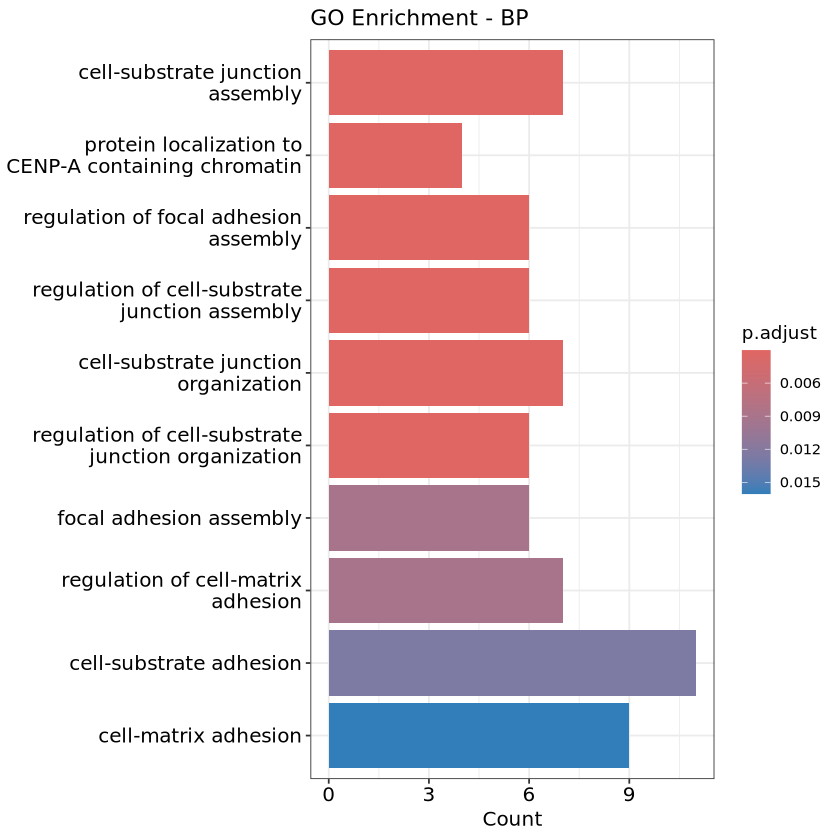

In [177]:
barplot(Aging5_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [178]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_Aging5_GO_BP.png', width = 6, height = 6)

In [179]:
Aging5_xQTL_ego_cc <- enrichGO(
  gene          = image_Aging5_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [180]:
head(Aging5_xQTL_ego_cc, n=5)

ID         Description                         GeneRatio BgRatio  
GO:0043505 GO:0043505 CENP-A containing nucleosome        4/140     18/22568 
GO:0061638 GO:0061638 CENP-A containing chromatin         4/140     18/22568 
GO:0034506 GO:0034506 chromosome, centromeric core domain 4/140     20/22568 
GO:0000786 GO:0000786 nucleosome                          6/140     137/22568
GO:0045178 GO:0045178 basal part of cell                  7/140     330/22568
           pvalue       p.adjust     qvalue      
GO:0043505 4.057426e-06 0.0005193505 0.0005103815
GO:0061638 4.057426e-06 0.0005193505 0.0005103815
GO:0034506 6.362602e-06 0.0005429421 0.0005335656
GO:0000786 2.161508e-04 0.0138336500 0.0135947465
GO:0045178 4.600377e-03 0.2155728290 0.2118499429
           geneID                                                                                                         
GO:0043505 ENSG00000273542/ENSG00000197061/ENSG00000278463/ENSG00000275126                                                
GO:0061638 ENSG00000273542/ENSG00000197061/ENSG00000278463/ENSG00000275126                                                
GO:0034506 ENSG00000273542/ENSG00000197061/ENSG00000278463/ENSG00000275126                                                
GO:0000786 ENSG00000233822/ENSG00000273542/ENSG00000286522/ENSG00000197061/ENSG00000278463/ENSG00000275126                
GO:0045178 ENSG00000148842/ENSG00000185933/ENSG00000010704/ENSG00000137312/ENSG00000133059/ENSG00000204217/ENSG00000197405
           Count
GO:0043505 4    
GO:0061638 4    
GO:0034506 4    
GO:0000786 6    
GO:0045178 7

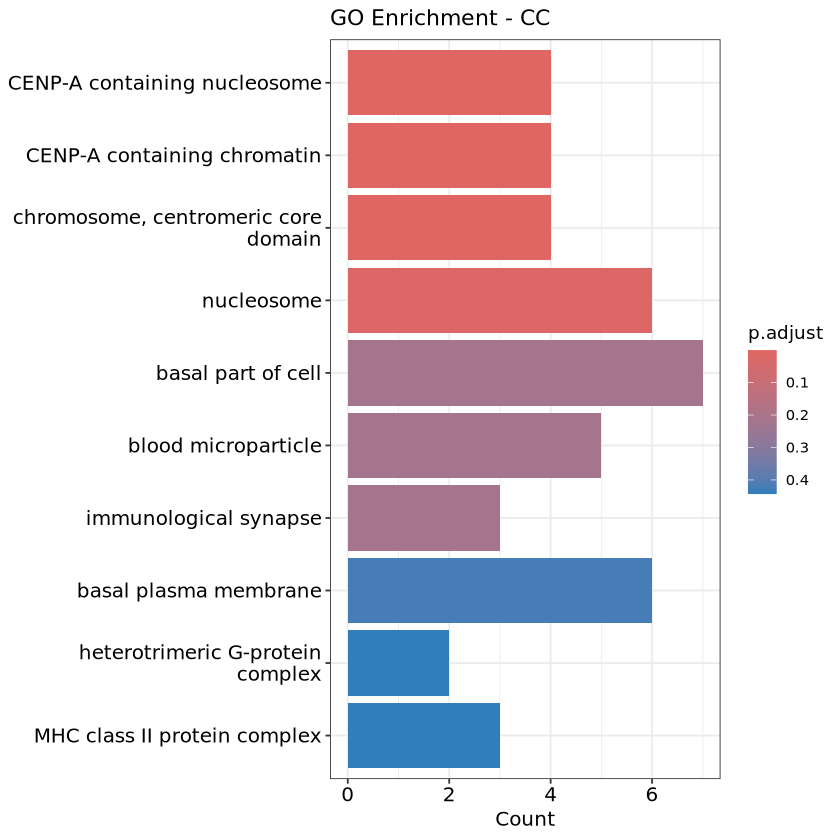

In [181]:
barplot(Aging5_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [182]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_Aging5_GO_CC.png', width = 6, height = 6)

In [183]:
Aging5_xQTL_ego_mf <- enrichGO(
  gene          = image_Aging5_sig_gene$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [184]:
head(Aging5_xQTL_ego_mf, n=5)

ID        
GO:0030527 GO:0030527
GO:0016717 GO:0016717
GO:0045296 GO:0045296
GO:0046982 GO:0046982
GO:0038177 GO:0038177
           Description                                                                                                                                                  
GO:0030527 structural constituent of chromatin                                                                                                                          
GO:0016717 oxidoreductase activity, acting on paired donors, with oxidation of a pair of donors resulting in the reduction of molecular oxygen to two molecules of water
GO:0045296 cadherin binding                                                                                                                                             
GO:0046982 protein heterodimerization activity                                                                                                                          
GO:0038177 death receptor agonist activity                                                                                                                              
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0030527 6/141     101/21059 6.088638e-05 0.01753528 0.01717637
GO:0016717 2/141     10/21059  1.933789e-03 0.21478887 0.21039260
GO:0045296 8/141     359/21059 2.933108e-03 0.21478887 0.21039260
GO:0046982 8/141     360/21059 2.983179e-03 0.21478887 0.21039260
GO:0038177 2/141     14/21059  3.842502e-03 0.22132813 0.21679802
           geneID                                                                                                                         
GO:0030527 ENSG00000233822/ENSG00000273542/ENSG00000286522/ENSG00000197061/ENSG00000278463/ENSG00000275126                                
GO:0016717 ENSG00000134824/ENSG00000149485                                                                                                
GO:0045296 ENSG00000213719/ENSG00000149177/ENSG00000286522/ENSG00000204389/ENSG00000204217/ENSG00000072518/ENSG00000035403/ENSG00000184640
GO:0046982 ENSG00000233822/ENSG00000273542/ENSG00000166197/ENSG00000286522/ENSG00000197061/ENSG00000278463/ENSG00000275126/ENSG00000203760
GO:0038177 ENSG00000204389/ENSG00000232810                                                                                                
           Count
GO:0030527 6    
GO:0016717 2    
GO:0045296 8    
GO:0046982 8    
GO:0038177 2

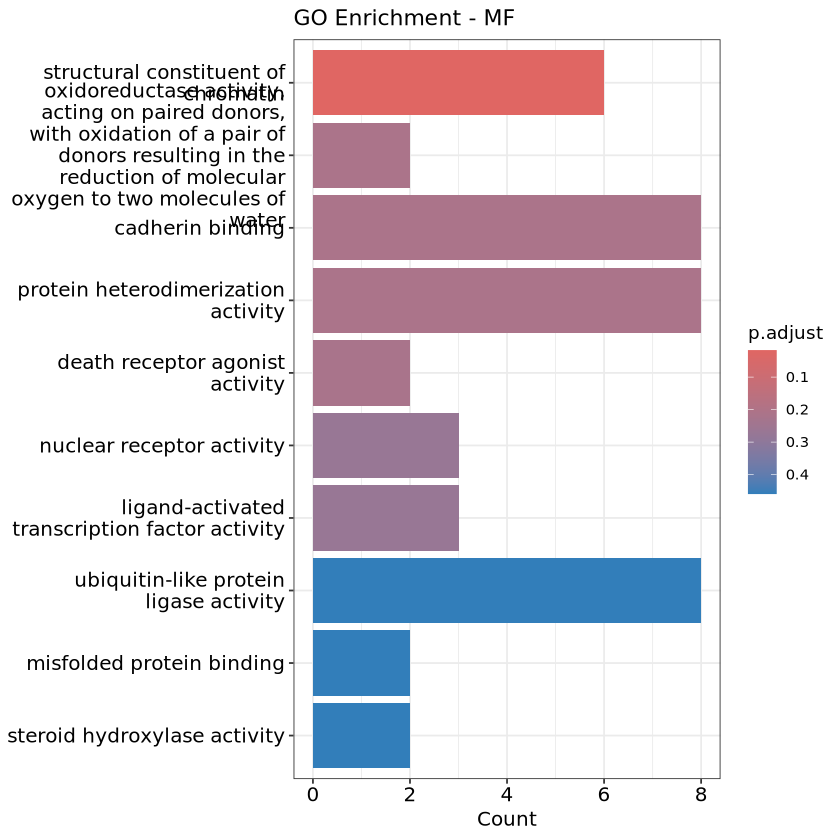

In [185]:
barplot(Aging5_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [186]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_Aging5_GO_MF.png', width = 6, height = 6)

#### KEGG

**TL1_AD1_Aging3**

In [264]:
entrez_ids <- bitr(TL1_AD1_Aging3, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns



In [265]:
kegg_enrich %>% head(n=10)

category                             subcategory                     
hsa00430 Metabolism                           Metabolism of other amino acids 
hsa00480 Metabolism                           Metabolism of other amino acids 
hsa04137 Cellular Processes                   Transport and catabolism        
hsa04141 Genetic Information Processing       Folding, sorting and degradation
hsa04310 Environmental Information Processing Signal transduction             
hsa04360 Organismal Systems                   Development and regeneration    
hsa04820 NA                                   NA                              
         ID       Description                                 GeneRatio
hsa00430 hsa00430 Taurine and hypotaurine metabolism          1/6      
hsa00480 hsa00480 Glutathione metabolism                      1/6      
hsa04137 hsa04137 Mitophagy - animal                          1/6      
hsa04141 hsa04141 Protein processing in endoplasmic reticulum 1/6      
hsa04310 hsa04310 Wnt signaling pathway                       1/6      
hsa04360 hsa04360 Axon guidance                               1/6      
hsa04820 hsa04820 Cytoskeleton in muscle cells                1/6      
         BgRatio  pvalue     p.adjust   qvalue     geneID Count
hsa00430 17/9440  0.01075939 0.07531575 0.05662838 2686   1    
hsa00480 59/9440  0.03692855 0.12924993 0.09718040 2686   1    
hsa04137 105/9440 0.06492552 0.12999513 0.09774070 84315  1    
hsa04141 171/9440 0.10390802 0.12999513 0.09774070 80331  1    
hsa04310 174/9440 0.10564725 0.12999513 0.09774070 25776  1    
hsa04360 184/9440 0.11142439 0.12999513 0.09774070 5364   1    
hsa04820 233/9440 0.13928490 0.13928490 0.10472549 25777  1

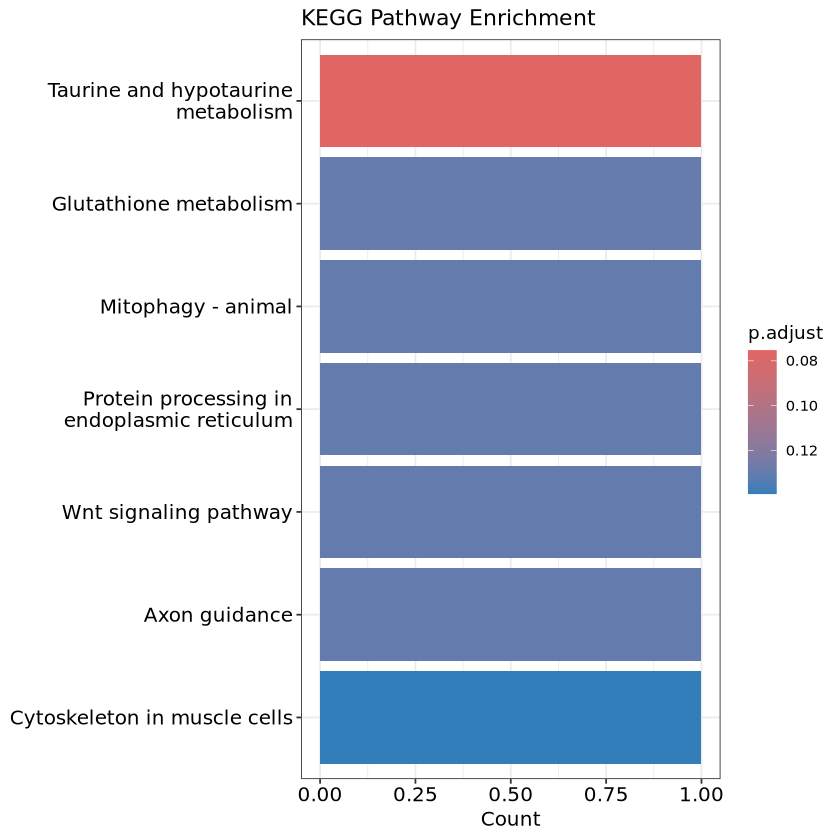

In [266]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [267]:
entrez_ids |> filter(ENTREZID %in% c("84557","84315"))

ENSEMBL         ENTREZID
1 ENSG00000164077 84315

**AD2_Aging2**

In [268]:
entrez_ids <- bitr(AD2_Aging2_sig_gene, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(AD2_Aging2_sig_gene, fromType = "ENSEMBL", toType = "ENTREZID", :
"1.2% of input gene IDs are fail to map..."


In [269]:
entrez_ids |> filter(ENTREZID %in% c("9776","5595", "9110", "598", "10912", "1500"))

ENSEMBL         ENTREZID
1 ENSG00000175224 9776    
2 ENSG00000198561 1500    
3 ENSG00000102882 5595    
4 ENSG00000171552 598     
5 ENSG00000108389 9110

In [270]:
kegg_enrich %>% head(n=10)

category                       subcategory                    
hsa04140 Cellular Processes             Transport and catabolism       
hsa03460 Genetic Information Processing Replication and repair         
hsa04625 Organismal Systems             Immune system                  
hsa05131 Human Diseases                 Infectious disease: bacterial  
hsa04621 Organismal Systems             Immune system                  
hsa05133 Human Diseases                 Infectious disease: bacterial  
hsa04613 Organismal Systems             Immune system                  
hsa03440 Genetic Information Processing Replication and repair         
hsa05417 Human Diseases                 Cardiovascular disease         
hsa04520 Cellular Processes             Cellular community - eukaryotes
         ID       Description                              GeneRatio BgRatio 
hsa04140 hsa04140 Autophagy - animal                       7/64      169/9440
hsa03460 hsa03460 Fanconi anemia pathway                   4/64      55/9440 
hsa04625 hsa04625 C-type lectin receptor signaling pathway 5/64      105/9440
hsa05131 hsa05131 Shigellosis                              7/64      253/9440
hsa04621 hsa04621 NOD-like receptor signaling pathway      6/64      189/9440
hsa05133 hsa05133 Pertussis                                4/64      78/9440 
hsa04613 hsa04613 Neutrophil extracellular trap formation  6/64      196/9440
hsa03440 hsa03440 Homologous recombination                 3/64      41/9440 
hsa05417 hsa05417 Lipid and atherosclerosis                6/64      216/9440
hsa04520 hsa04520 Adherens junction                        4/64      93/9440 
         pvalue       p.adjust   qvalue    
hsa04140 0.0001370385 0.02699659 0.02279167
hsa03460 0.0005056678 0.04602309 0.03885465
hsa04625 0.0007008592 0.04602309 0.03885465
hsa05131 0.0015433634 0.05758046 0.04861188
hsa04621 0.0017015774 0.05758046 0.04861188
hsa05133 0.0018826730 0.05758046 0.04861188
hsa04613 0.0020460062 0.05758046 0.04861188
hsa03440 0.0026366719 0.06492805 0.05481502
hsa05417 0.0033238584 0.07038573 0.05942263
hsa04520 0.0035728799 0.07038573 0.05942263
         geneID                                Count
hsa04140 29110/9842/9776/5595/598/10010/9110   7    
hsa03460 672/79008/6119/5889                   4    
hsa04625 9020/51561/6773/5595/29108            5    
hsa05131 29110/84812/10318/5595/29108/598/5335 7    
hsa04621 29110/6773/5595/29108/598/10010       6    
hsa05133 721/51561/5595/29108                  4    
hsa04613 8335/8368/10014/8969/5595/5335        6    
hsa03440 672/6119/5889                         3    
hsa05417 29110/5595/29108/598/10010/5335       6    
hsa04520 1460/83605/1500/5595                  4

In [271]:
kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'lipid|Lipid|fatty|Fatty|Alzheimer|Cholesterol'))
kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'mito'))

category                             subcategory                    
hsa05417 Human Diseases                       Cardiovascular disease         
hsa00565 Metabolism                           Lipid metabolism               
hsa00561 Metabolism                           Lipid metabolism               
hsa05010 Human Diseases                       Neurodegenerative disease      
hsa00564 Metabolism                           Lipid metabolism               
hsa04071 Environmental Information Processing Signal transduction            
hsa04932 Human Diseases                       Endocrine and metabolic disease
         ID       Description                       GeneRatio BgRatio 
hsa05417 hsa05417 Lipid and atherosclerosis         6/64      216/9440
hsa00565 hsa00565 Ether lipid metabolism            1/64      51/9440 
hsa00561 hsa00561 Glycerolipid metabolism           1/64      65/9440 
hsa05010 hsa05010 Alzheimer disease                 3/64      391/9440
hsa00564 hsa00564 Glycerophospholipid metabolism    1/64      103/9440
hsa04071 hsa04071 Sphingolipid signaling pathway    1/64      122/9440
hsa04932 hsa04932 Non-alcoholic fatty liver disease 1/64      157/9440
         pvalue      p.adjust   qvalue     geneID                         
hsa05417 0.003323858 0.07038573 0.05942263 29110/5595/29108/598/10010/5335
hsa00565 0.293806049 0.51678385 0.43629094 79153                          
hsa00561 0.358335377 0.58218083 0.49150185 8525                           
hsa05010 0.498199267 0.63046090 0.53226194 1460/9776/5595                 
hsa00564 0.505648841 0.63046090 0.53226194 8525                           
hsa04071 0.566263763 0.66432632 0.56085257 5595                           
hsa04932 0.659379285 0.69340608 0.58540295 10062                          
         Count
hsa05417 6    
hsa00565 1    
hsa00561 1    
hsa05010 3    
hsa00564 1    
hsa04071 1    
hsa04932 1

category subcategory ID Description GeneRatio BgRatio pvalue p.adjust
     qvalue geneID Count

In [272]:
entrez_ids %>% filter(ENTREZID%in% (kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'Alzheimer')) %>% pull(geneID) %>% str_split(., '/') %>% unlist)) ##  CSNK2B & ATG13 & mapk3

ENSEMBL         ENTREZID
1 ENSG00000204435 1460    
2 ENSG00000175224 9776    
3 ENSG00000102882 5595

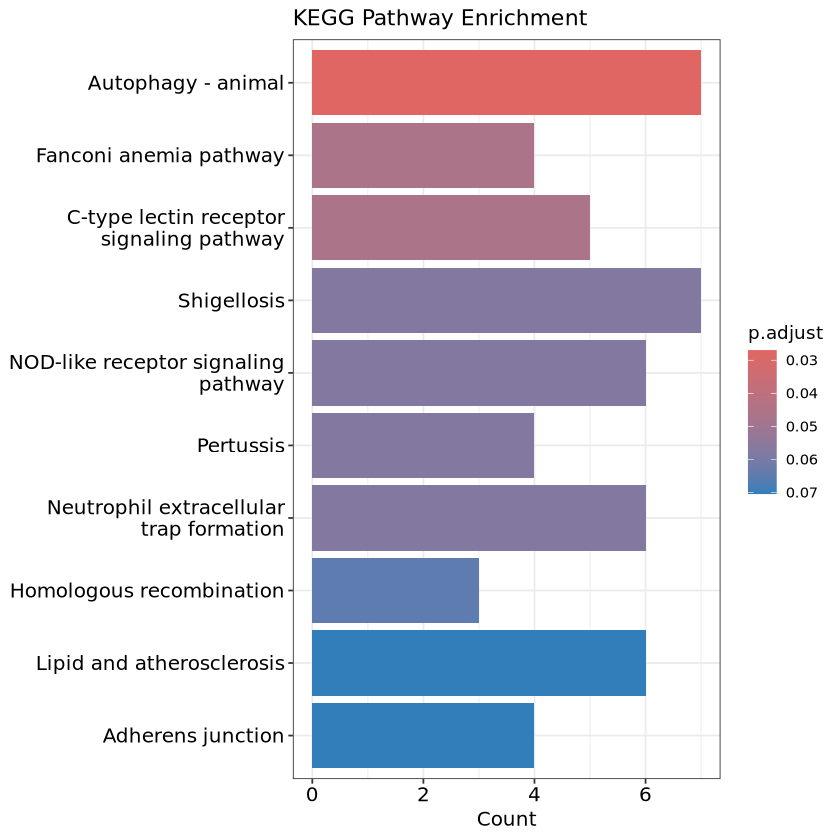

In [273]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [274]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_AD2_Aging2_union_KEGG.png', width = 6, height = 6)

**AD2_Aging4**

In [275]:
entrez_ids <- bitr(AD2_Aging4_sig_gene, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(AD2_Aging4_sig_gene, fromType = "ENSEMBL", toType = "ENTREZID", :
"0.68% of input gene IDs are fail to map..."


In [276]:
kegg_enrich %>% head(n=10)

category                             subcategory                    
hsa04520 Cellular Processes                   Cellular community - eukaryotes
hsa04936 Human Diseases                       Endocrine and metabolic disease
hsa05322 Human Diseases                       Immune disease                 
hsa05160 Human Diseases                       Infectious disease: viral      
hsa04140 Cellular Processes                   Transport and catabolism       
hsa04137 Cellular Processes                   Transport and catabolism       
hsa04625 Organismal Systems                   Immune system                  
hsa05034 Human Diseases                       Substance dependence           
hsa04350 Environmental Information Processing Signal transduction            
hsa04613 Organismal Systems                   Immune system                  
         ID       Description                              GeneRatio BgRatio 
hsa04520 hsa04520 Adherens junction                        4/59      93/9440 
hsa04936 hsa04936 Alcoholic liver disease                  4/59      144/9440
hsa05322 hsa05322 Systemic lupus erythematosus             4/59      144/9440
hsa05160 hsa05160 Hepatitis C                              4/59      159/9440
hsa04140 hsa04140 Autophagy - animal                       4/59      169/9440
hsa04137 hsa04137 Mitophagy - animal                       3/59      105/9440
hsa04625 hsa04625 C-type lectin receptor signaling pathway 3/59      105/9440
hsa05034 hsa05034 Alcoholism                               4/59      191/9440
hsa04350 hsa04350 TGF-beta signaling pathway               3/59      110/9440
hsa04613 hsa04613 Neutrophil extracellular trap formation  4/59      196/9440
         pvalue      p.adjust  qvalue    geneID                  Count
hsa04520 0.002656647 0.4197502 0.4110811 1460/83605/1500/6934    4    
hsa04936 0.012357162 0.5246332 0.5137980 29110/9020/721/6934     4    
hsa05322 0.012357162 0.5246332 0.5137980 8335/721/8368/8969      4    
hsa05160 0.017215363 0.5246332 0.5137980 29110/10062/6773/439996 4    
hsa04140 0.021036819 0.5246332 0.5137980 29110/9842/9776/338382  4    
hsa04137 0.027731011 0.5246332 0.5137980 29110/1460/338382       3    
hsa04625 0.027731011 0.5246332 0.5137980 9020/51561/6773         3    
hsa05034 0.031170660 0.5246332 0.5137980 8335/8368/10014/8969    4    
hsa04350 0.031239202 0.5246332 0.5137980 23592/8200/654          3    
hsa04613 0.033814067 0.5246332 0.5137980 8335/8368/10014/8969    4

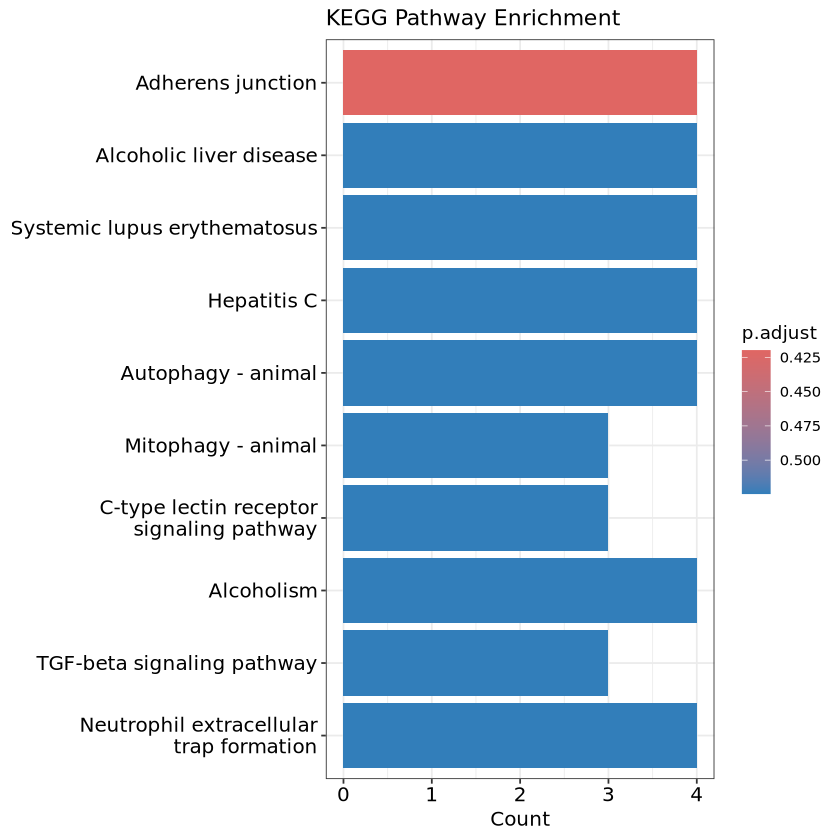

In [277]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [278]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_AD2_Aging4_union_KEGG.png', width = 6, height = 6)

**Aging3**

In [279]:
entrez_ids <- bitr(image_Aging3_sig_gene$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(image_Aging3_sig_gene$gene_id, fromType = "ENSEMBL", toType = "ENTREZID", :
"1.61% of input gene IDs are fail to map..."


In [280]:
kegg_enrich %>% head(n=10)

category                             subcategory                    
hsa04933 Human Diseases                       Endocrine and metabolic disease
hsa05205 Human Diseases                       Cancer: overview               
hsa04930 Human Diseases                       Endocrine and metabolic disease
hsa04370 Environmental Information Processing Signal transduction            
hsa04932 Human Diseases                       Endocrine and metabolic disease
hsa05211 Human Diseases                       Cancer: specific types         
hsa04140 Cellular Processes                   Transport and catabolism       
hsa05212 Human Diseases                       Cancer: specific types         
hsa04010 Environmental Information Processing Signal transduction            
hsa04666 Organismal Systems                   Immune system                  
         ID       Description                                         
hsa04933 hsa04933 AGE-RAGE signaling pathway in diabetic complications
hsa05205 hsa05205 Proteoglycans in cancer                             
hsa04930 hsa04930 Type II diabetes mellitus                           
hsa04370 hsa04370 VEGF signaling pathway                              
hsa04932 hsa04932 Non-alcoholic fatty liver disease                   
hsa05211 hsa05211 Renal cell carcinoma                                
hsa04140 hsa04140 Autophagy - animal                                  
hsa05212 hsa05212 Pancreatic cancer                                   
hsa04010 hsa04010 MAPK signaling pathway                              
hsa04666 hsa04666 Fc gamma R-mediated phagocytosis                    
         GeneRatio BgRatio  pvalue       p.adjust   qvalue    
hsa04933 4/27      101/9440 0.0001793088 0.02012094 0.01517531
hsa05205 5/27      204/9440 0.0002458623 0.02012094 0.01517531
hsa04930 3/27      47/9440  0.0003111485 0.02012094 0.01517531
hsa04370 3/27      60/9440  0.0006405838 0.03068270 0.02314105
hsa04932 4/27      157/9440 0.0009589710 0.03068270 0.02314105
hsa05211 3/27      70/9440  0.0010053850 0.03068270 0.02314105
hsa04140 4/27      169/9440 0.0012611689 0.03068270 0.02314105
hsa05212 3/27      77/9440  0.0013257344 0.03068270 0.02314105
hsa04010 5/27      300/9440 0.0014234240 0.03068270 0.02314105
hsa04666 3/27      99/9440  0.0027261795 0.05288788 0.03988831
         geneID                  Count
hsa04933 7124/7422/998/5595      4    
hsa05205 7124/7422/3339/998/5595 5    
hsa04930 7124/8660/5595          3    
hsa04370 7422/998/5595           3    
hsa04932 7124/998/8660/83737     4    
hsa05211 7422/998/5595           3    
hsa04140 8660/5595/9842/84557    4    
hsa05212 7422/998/5595           3    
hsa04010 7124/7422/998/5595/4137 5    
hsa04666 274/998/5595            3

In [281]:
kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'lipid|Lipid|fatty|Fatty|Alzheimer|Cholesterol|phagy'))


category                             subcategory                    
hsa04932 Human Diseases                       Endocrine and metabolic disease
hsa04140 Cellular Processes                   Transport and catabolism       
hsa05010 Human Diseases                       Neurodegenerative disease      
hsa05417 Human Diseases                       Cardiovascular disease         
hsa04071 Environmental Information Processing Signal transduction            
hsa00565 Metabolism                           Lipid metabolism               
hsa04137 Cellular Processes                   Transport and catabolism       
         ID       Description                       GeneRatio BgRatio 
hsa04932 hsa04932 Non-alcoholic fatty liver disease 4/27      157/9440
hsa04140 hsa04140 Autophagy - animal                4/27      169/9440
hsa05010 hsa05010 Alzheimer disease                 5/27      391/9440
hsa05417 hsa05417 Lipid and atherosclerosis         3/27      216/9440
hsa04071 hsa04071 Sphingolipid signaling pathway    2/27      122/9440
hsa00565 hsa00565 Ether lipid metabolism            1/27      51/9440 
hsa04137 hsa04137 Mitophagy - animal                1/27      105/9440
         pvalue      p.adjust   qvalue     geneID                   Count
hsa04932 0.000958971 0.03068270 0.02314105 7124/998/8660/83737      4    
hsa04140 0.001261169 0.03068270 0.02314105 8660/5595/9842/84557     4    
hsa05010 0.004512112 0.07036883 0.05307253 5684/7124/8660/5595/4137 5    
hsa05417 0.023065857 0.13320440 0.10046344 7124/998/5595            3    
hsa04071 0.047125026 0.16777643 0.12653784 7124/5595                2    
hsa00565 0.136245288 0.27062458 0.20410644 79153                    1    
hsa04137 0.260972022 0.32663595 0.24635050 84557                    1

In [282]:
entrez_ids |> filter(ENTREZID %in% c("8660", "5595", "9842", "84557")) # IRS2, MAPK3, PLEKHM1, LC3
entrez_ids |> filter(ENTREZID %in% c("5684", "7124", "8660", "5595", "4137"))#PMSA3, TNF, IRS2, MAPK3, MAPT


ENSEMBL         ENTREZID
1 ENSG00000185950 8660    
2 ENSG00000102882 5595    
3 ENSG00000225190 9842    
4 ENSG00000101460 84557

ENSEMBL         ENTREZID
1 ENSG00000100567 5684    
2 ENSG00000232810 7124    
3 ENSG00000185950 8660    
4 ENSG00000102882 5595    
5 ENSG00000186868 4137

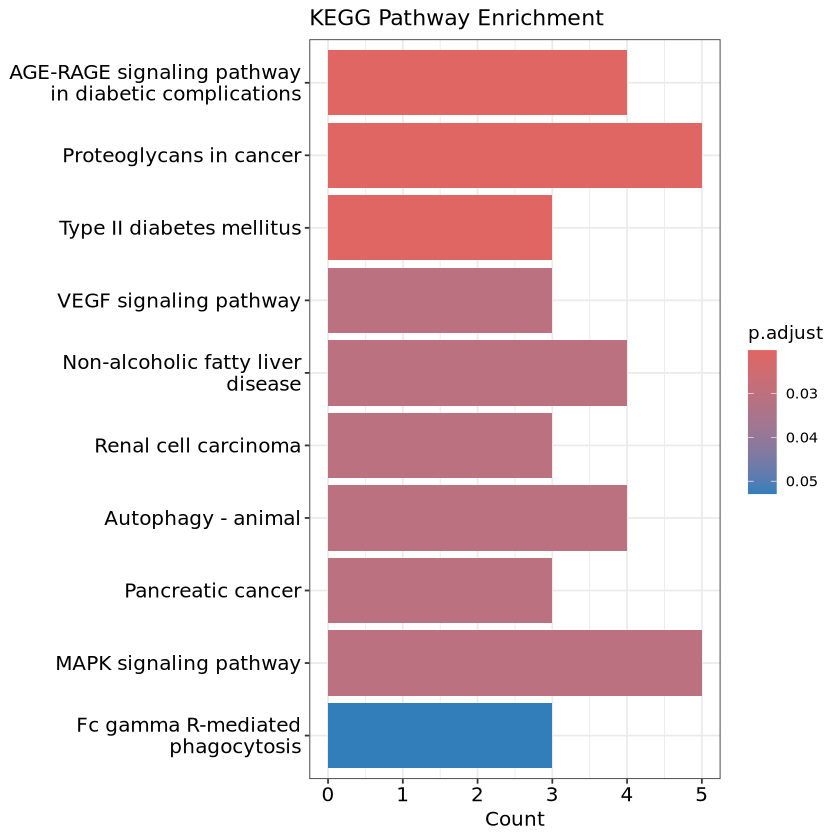

In [283]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

Autophagy - animal: IRS2,MAPK3,PLEKHM1,MAP1LC3A; Non-alcoholic fatty liver disease: CDC42; Type II diabetes mellitus: IRS2,MAPK3; Long-term depression: CRHR1 ; Alzheimer disease: IRS2,PSMA3(important in mitochondria clearance during fertalization), MAPK3, MAPT.

In [284]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_Aging3_xqtl_KEGG.png', width = 6, height = 6)

**Aging5**

In [285]:
entrez_ids <- bitr(image_Aging5_sig_gene$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(image_Aging5_sig_gene$gene_id, fromType = "ENSEMBL", toType = "ENTREZID", :
"1.99% of input gene IDs are fail to map..."


In [286]:
kegg_enrich %>% head(n=10)

category           subcategory                     ID      
hsa05322 Human Diseases     Immune disease                  hsa05322
hsa05150 Human Diseases     Infectious disease: bacterial   hsa05150
hsa04612 Organismal Systems Immune system                   hsa04612
hsa05310 Human Diseases     Immune disease                  hsa05310
hsa04613 Organismal Systems Immune system                   hsa04613
hsa05330 Human Diseases     Immune disease                  hsa05330
hsa05133 Human Diseases     Infectious disease: bacterial   hsa05133
hsa04940 Human Diseases     Endocrine and metabolic disease hsa04940
hsa05332 Human Diseases     Immune disease                  hsa05332
hsa04610 Organismal Systems Immune system                   hsa04610
         Description                             GeneRatio BgRatio 
hsa05322 Systemic lupus erythematosus            14/71     144/9440
hsa05150 Staphylococcus aureus infection         8/71      102/9440
hsa04612 Antigen processing and presentation     6/71      82/9440 
hsa05310 Asthma                                  4/71      32/9440 
hsa04613 Neutrophil extracellular trap formation 8/71      196/9440
hsa05330 Allograft rejection                     4/71      39/9440 
hsa05133 Pertussis                               5/71      78/9440 
hsa04940 Type I diabetes mellitus                4/71      44/9440 
hsa05332 Graft-versus-host disease               4/71      45/9440 
hsa04610 Complement and coagulation cascades     5/71      88/9440 
         pvalue       p.adjust     qvalue      
hsa05322 2.231733e-12 4.151023e-10 3.523789e-10
hsa05150 8.544056e-07 7.945972e-05 6.745308e-05
hsa04612 3.260011e-05 2.021207e-03 1.715796e-03
hsa05310 9.011439e-05 3.866281e-03 3.282072e-03
hsa04613 1.039323e-04 3.866281e-03 3.282072e-03
hsa05330 1.980987e-04 6.141059e-03 5.213123e-03
hsa05133 2.878089e-04 7.168465e-03 6.085285e-03
hsa04940 3.178231e-04 7.168465e-03 6.085285e-03
hsa05332 3.468612e-04 7.168465e-03 6.085285e-03
hsa04610 5.039554e-04 9.367303e-03 7.951870e-03
         geneID                                                                 
hsa05322 8341/8362/720/110384692/3122/3108/713/8358/8364/8335/721/8368/7124/3109
hsa05150 720/110384692/3122/3108/713/721/3109/728                               
hsa04612 3122/3108/6891/3303/7124/3109                                          
hsa05310 3122/3108/7124/3109                                                    
hsa04613 8341/8362/8358/8364/8335/8368/177/728                                  
hsa05330 3122/3108/7124/3109                                                    
hsa05133 720/110384692/713/721/7124                                             
hsa04940 3122/3108/7124/3109                                                    
hsa05332 3122/3108/7124/3109                                                    
hsa04610 720/110384692/713/721/728                                              
         Count
hsa05322 14   
hsa05150  8   
hsa04612  6   
hsa05310  4   
hsa04613  8   
hsa05330  4   
hsa05133  5   
hsa04940  4   
hsa05332  4   
hsa04610  5

In [287]:
kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'lipid|Alzheimer|Cholesterol|cell-substrate junction assembly'))


category                            
hsa00603 Metabolism                          
hsa05010 Human Diseases                      
hsa00601 Metabolism                          
hsa04071 Environmental Information Processing
         subcategory                        ID      
hsa00603 Glycan biosynthesis and metabolism hsa00603
hsa05010 Neurodegenerative disease          hsa05010
hsa00601 Glycan biosynthesis and metabolism hsa00601
hsa04071 Signal transduction                hsa04071
         Description                                                GeneRatio
hsa00603 Glycosphingolipid biosynthesis - globo and isoglobo series 1/71     
hsa05010 Alzheimer disease                                          5/71     
hsa00601 Glycosphingolipid biosynthesis - lacto and neolacto series 1/71     
hsa04071 Sphingolipid signaling pathway                             2/71     
         BgRatio  pvalue    p.adjust  qvalue    geneID                   Count
hsa00603 16/9440  0.1138688 0.4235919 0.3595857 10690                    1    
hsa05010 391/9440 0.1704473 0.5107441 0.4335688 516/203068/1460/7124/177 5    
hsa00601 28/9440  0.1907871 0.5107441 0.4335688 10690                    1    
hsa04071 122/9440 0.2336204 0.5478336 0.4650540 7124/2768                2

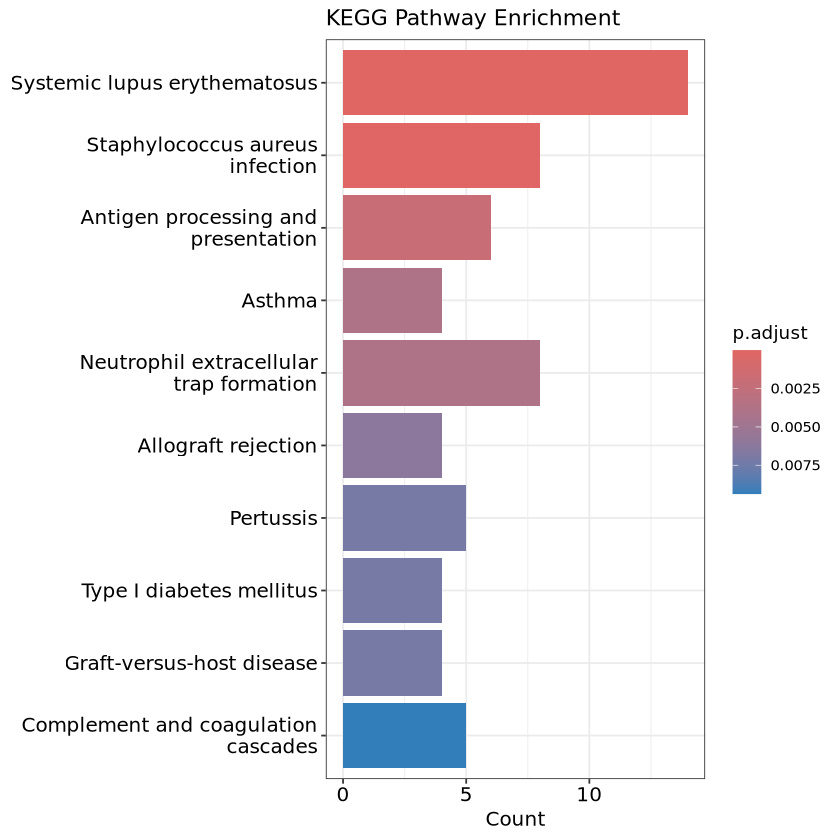

In [288]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [289]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/figs/image_Aging5_xqtl_KEGG.png', width = 6, height = 6)

**AD1_Aging5**

In [290]:
entrez_ids <- bitr(AD1_Aging5_sig_gene, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(AD1_Aging5_sig_gene, fromType = "ENSEMBL", toType = "ENTREZID", :
"1.47% of input gene IDs are fail to map..."


In [291]:
kegg_enrich %>% head(n=10)

category           subcategory                     ID      
hsa05322 Human Diseases     Immune disease                  hsa05322
hsa05150 Human Diseases     Infectious disease: bacterial   hsa05150
hsa04612 Organismal Systems Immune system                   hsa04612
hsa04610 Organismal Systems Immune system                   hsa04610
hsa05310 Human Diseases     Immune disease                  hsa05310
hsa05330 Human Diseases     Immune disease                  hsa05330
hsa05034 Human Diseases     Substance dependence            hsa05034
hsa04613 Organismal Systems Immune system                   hsa04613
hsa04940 Human Diseases     Endocrine and metabolic disease hsa04940
hsa05332 Human Diseases     Immune disease                  hsa05332
         Description                             GeneRatio BgRatio 
hsa05322 Systemic lupus erythematosus            14/97     144/9440
hsa05150 Staphylococcus aureus infection         8/97      102/9440
hsa04612 Antigen processing and presentation     7/97      82/9440 
hsa04610 Complement and coagulation cascades     6/97      88/9440 
hsa05310 Asthma                                  4/97      32/9440 
hsa05330 Allograft rejection                     4/97      39/9440 
hsa05034 Alcoholism                              8/97      191/9440
hsa04613 Neutrophil extracellular trap formation 8/97      196/9440
hsa04940 Type I diabetes mellitus                4/97      44/9440 
hsa05332 Graft-versus-host disease               4/97      45/9440 
         pvalue       p.adjust     qvalue      
hsa05322 1.849622e-10 4.217139e-08 3.679775e-08
hsa05150 9.212901e-06 1.050271e-03 9.164412e-04
hsa04612 1.971295e-05 1.498184e-03 1.307280e-03
hsa04610 2.769431e-04 1.377629e-02 1.202086e-02
hsa05310 3.021116e-04 1.377629e-02 1.202086e-02
hsa05330 6.540544e-04 2.454566e-02 2.141796e-02
hsa05034 7.535949e-04 2.454566e-02 2.141796e-02
hsa04613 8.920637e-04 2.499264e-02 2.180799e-02
hsa04940 1.037982e-03 2.499264e-02 2.180799e-02
hsa05332 1.130358e-03 2.499264e-02 2.180799e-02
         geneID                                                                 
hsa05322 8341/8362/720/110384692/3122/3108/713/8358/8364/8335/721/8368/7124/3109
hsa05150 720/110384692/3122/3108/713/721/3109/728                               
hsa04612 1508/3122/3108/6891/3303/7124/3109                                     
hsa04610 3053/720/110384692/713/721/728                                         
hsa05310 3122/3108/7124/3109                                                    
hsa05330 3122/3108/7124/3109                                                    
hsa05034 135/8341/8362/2793/8358/8364/8335/8368                                 
hsa04613 8341/8362/8358/8364/8335/8368/177/728                                  
hsa04940 3122/3108/7124/3109                                                    
hsa05332 3122/3108/7124/3109                                                    
         Count
hsa05322 14   
hsa05150  8   
hsa04612  7   
hsa04610  6   
hsa05310  4   
hsa05330  4   
hsa05034  8   
hsa04613  8   
hsa04940  4   
hsa05332  4

In [292]:
# Neurodegenerative disease
entrez_ids |> filter(ENTREZID %in% c("5903", "23225", "10121", "5684", "516"))
# 	: RANBP2,NUP210(nucleus), ACTR1A, PSMA3(proteosome), ATP5MC1(mitochondria)

ENSEMBL         ENTREZID
1 ENSG00000100567 5684    
2 ENSG00000138107 10121   
3 ENSG00000159199 516     
4 ENSG00000153201 5903    
5 ENSG00000132182 23225

In [293]:
kegg_enrich |> as.data.frame() |> filter(str_detect(Description, "fat| lipid| vesicle| Fatty| Alzheimer's| neur"))

category           subcategory                     ID      
hsa01040 Metabolism         Lipid metabolism                hsa01040
hsa05022 Human Diseases     Neurodegenerative disease       hsa05022
hsa00565 Metabolism         Lipid metabolism                hsa00565
hsa04721 Organismal Systems Nervous system                  hsa04721
hsa04932 Human Diseases     Endocrine and metabolic disease hsa04932
         Description                                       GeneRatio BgRatio 
hsa01040 Biosynthesis of unsaturated fatty acids           2/97      27/9440 
hsa05022 Pathways of neurodegeneration - multiple diseases 7/97      483/9440
hsa00565 Ether lipid metabolism                            1/97      51/9440 
hsa04721 Synaptic vesicle cycle                            1/97      79/9440 
hsa04932 Non-alcoholic fatty liver disease                 1/97      157/9440
         pvalue     p.adjust  qvalue    geneID                             
hsa01040 0.03104787 0.2212161 0.1930279 9415/3992                          
hsa05022 0.22756351 0.6738244 0.5879631 5684/10121/516/203068/1460/7124/177
hsa00565 0.41031388 0.7418223 0.6472965 5168                               
hsa04721 0.55928873 0.7681797 0.6702953 534                                
hsa04932 0.80508794 0.8268471 0.7214871 7124                               
         Count
hsa01040 2    
hsa05022 7    
hsa00565 1    
hsa04721 1    
hsa04932 1

In [294]:
# lipid metabolism
entrez_ids |> filter(ENTREZID %in% c("9415", "3992", "5168", "10121", "5684", "516"))
# ENPP2, FADS2, FADS1, |ACTR1A, PSMA3, ATP5MC1

ENSEMBL         ENTREZID
1 ENSG00000100567 5684    
2 ENSG00000136960 5168    
3 ENSG00000138107 10121   
4 ENSG00000159199 516     
5 ENSG00000134824 9415    
6 ENSG00000149485 3992

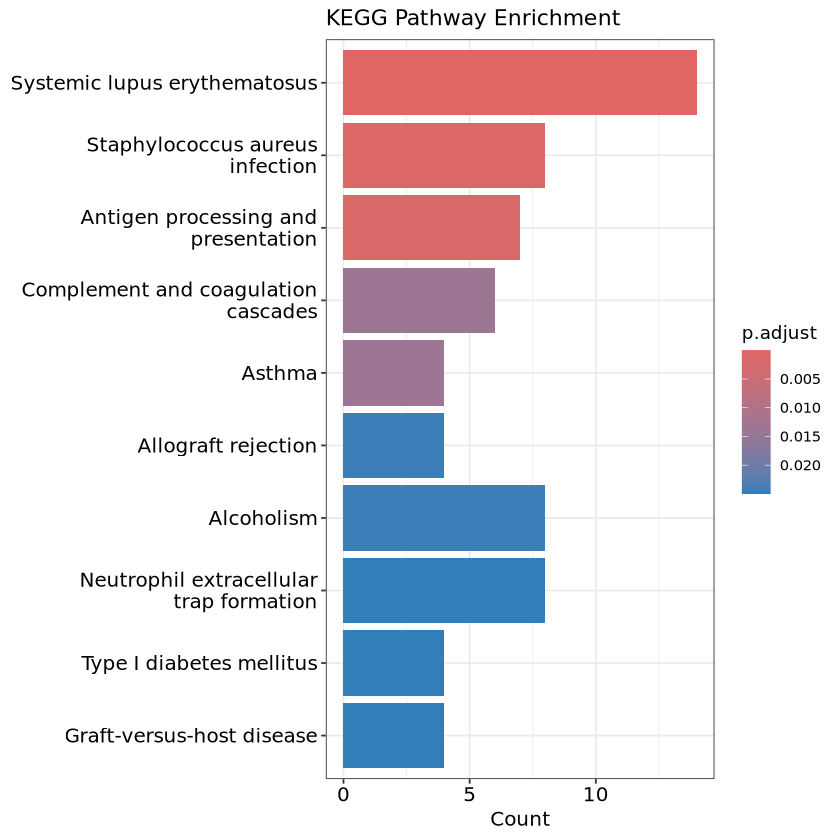

In [295]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

**TL1_AD1**

In [296]:
entrez_ids <- bitr(TL1_AD1, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns



In [297]:
kegg_enrich %>% head(n=5)

category           subcategory                  ID      
hsa04137 Cellular Processes Transport and catabolism     hsa04137
hsa04360 Organismal Systems Development and regeneration hsa04360
         Description        GeneRatio BgRatio  pvalue     p.adjust   qvalue
hsa04137 Mitophagy - animal 1/2       105/9440 0.02212321 0.03860516 NA    
hsa04360 Axon guidance      1/2       184/9440 0.03860516 0.03860516 NA    
         geneID Count
hsa04137 84315  1    
hsa04360 5364   1

In [298]:

a = entrez_ids |> filter(ENTREZID %in% c("29072", "84315", "5364", "64147", "151903"))
a 
TL1_sig_gene |> filter(gene_id %in% a$ENSEMBL)
## SETD2, MON1A, PLXNB1, KIF9, CCDC12

ENSEMBL         ENTREZID
1 ENSG00000164077 84315   
2 ENSG00000164050 5364

#chr start    end      gene_id         gene_name
1 chr3 46680000 50930173 ENSG00000164077          
2 chr3 48403853 48430085 ENSG00000164050 PLXNB1   
3 chr3 49907159 49930172 ENSG00000164077 MON1A

In [299]:
kegg_enrich |> as.data.frame() |> filter(str_detect(Description, "fat| lipid| vesicle| Fatty| Alzheimer's| neur"))

category subcategory ID Description GeneRatio BgRatio pvalue p.adjust
     qvalue geneID Count

In [300]:
# lipid metabolism
entrez_ids |> filter(ENTREZID %in% c("9415", "3992", "5168", "10121", "5684", "516"))
# ENPP2, FADS2, FADS1, |ACTR1A, PSMA3, ATP5MC1

ENSEMBL ENTREZID

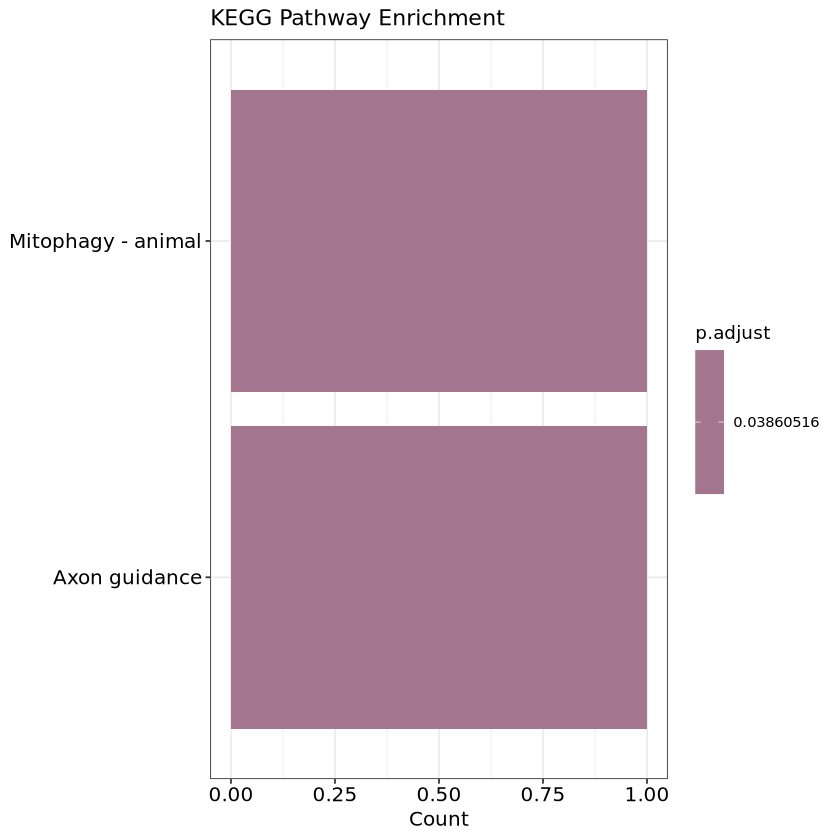

In [301]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

**AD1**

In [302]:
entrez_ids <- bitr(image_AD1_sig_gene$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns



In [303]:
kegg_enrich %>% head(n=10)

category                            
hsa04814 Cellular Processes                  
hsa00983 Metabolism                          
hsa03083 Genetic Information Processing      
hsa04928 Organismal Systems                  
hsa03082 Genetic Information Processing      
hsa00230 Metabolism                          
hsa04270 Organismal Systems                  
hsa04072 Environmental Information Processing
hsa04921 Organismal Systems                  
hsa04934 Human Diseases                      
         subcategory                               ID      
hsa04814 Cell motility                             hsa04814
hsa00983 Xenobiotics biodegradation and metabolism hsa00983
hsa03083 Chromosome                                hsa03083
hsa04928 Endocrine system                          hsa04928
hsa03082 Chromosome                                hsa03082
hsa00230 Nucleotide metabolism                     hsa00230
hsa04270 Circulatory system                        hsa04270
hsa04072 Signal transduction                       hsa04072
hsa04921 Endocrine system                          hsa04921
hsa04934 Endocrine and metabolic disease           hsa04934
         Description                                         GeneRatio BgRatio 
hsa04814 Motor proteins                                      3/28      197/9440
hsa00983 Drug metabolism - other enzymes                     2/28      81/9440 
hsa03083 Polycomb repressive complex                         2/28      83/9440 
hsa04928 Parathyroid hormone synthesis, secretion and action 2/28      115/9440
hsa03082 ATP-dependent chromatin remodeling                  2/28      117/9440
hsa00230 Purine metabolism                                   2/28      128/9440
hsa04270 Vascular smooth muscle contraction                  2/28      134/9440
hsa04072 Phospholipase D signaling pathway                   2/28      149/9440
hsa04921 Oxytocin signaling pathway                          2/28      155/9440
hsa04934 Cushing syndrome                                    2/28      155/9440
         pvalue     p.adjust qvalue   geneID            Count
hsa04814 0.01998208 0.456541 0.456541 64147/63971/10121 3    
hsa00983 0.02379475 0.456541 0.456541 3615/7364         2    
hsa03083 0.02490126 0.456541 0.456541 7528/84678        2    
hsa04928 0.04526638 0.456541 0.456541 2768/1956         2    
hsa03082 0.04669272 0.456541 0.456541 7528/6599         2    
hsa00230 0.05482848 0.456541 0.456541 5151/3615         2    
hsa04270 0.05946452 0.456541 0.456541 2768/135          2    
hsa04072 0.07162154 0.456541 0.456541 2768/1956         2    
hsa04921 0.07669631 0.456541 0.456541 1956/1938         2    
hsa04934 0.07669631 0.456541 0.456541 5151/1956         2

In [304]:
# lipid metabolism
entrez_ids |> filter(ENTREZID %in% c("9415", "3992", "5168", "10121", "5684", "516"))
# ENPP2, FADS2, FADS1, |ACTR1A, PSMA3, ATP5MC1

ENSEMBL         ENTREZID
1 ENSG00000100567 5684    
2 ENSG00000136960 5168    
3 ENSG00000138107 10121

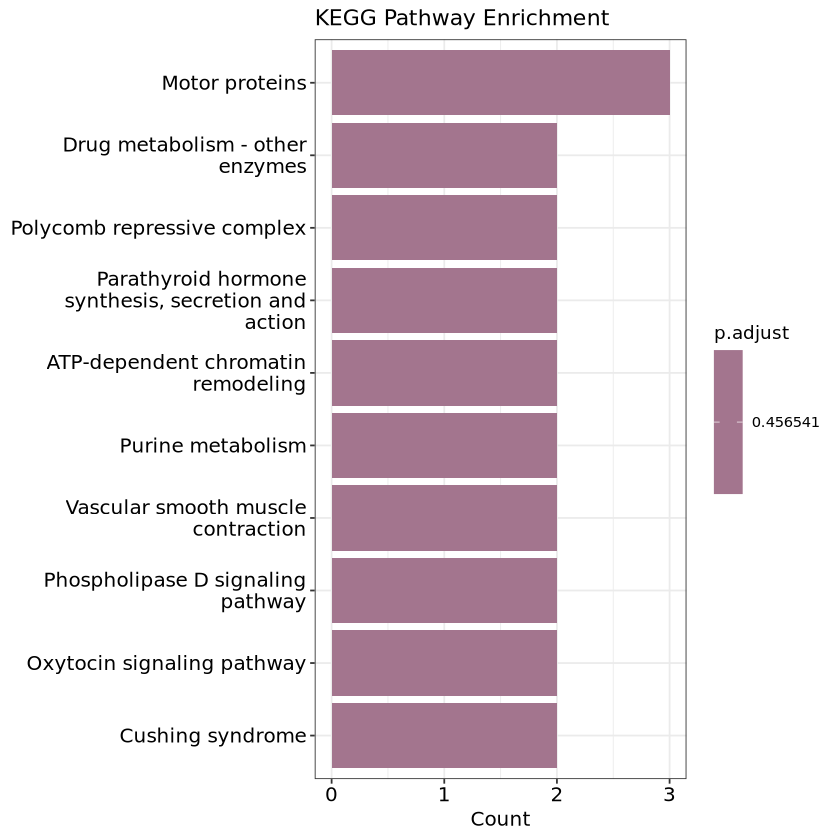

In [305]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

**AD2**

In [306]:
entrez_ids <- bitr(image_AD2_sig_gene$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(image_AD2_sig_gene$gene_id, fromType = "ENSEMBL", toType = "ENTREZID", :
"0.95% of input gene IDs are fail to map..."


In [307]:
kegg_enrich %>% head(n=10)

category           subcategory                     ID      
hsa05322 Human Diseases     Immune disease                  hsa05322
hsa04520 Cellular Processes Cellular community - eukaryotes hsa04520
hsa05034 Human Diseases     Substance dependence            hsa05034
hsa04613 Organismal Systems Immune system                   hsa04613
hsa04625 Organismal Systems Immune system                   hsa04625
hsa05162 Human Diseases     Infectious disease: viral       hsa05162
hsa04936 Human Diseases     Endocrine and metabolic disease hsa04936
hsa04217 Cellular Processes Cell growth and death           hsa04217
hsa05160 Human Diseases     Infectious disease: viral       hsa05160
hsa04140 Cellular Processes Transport and catabolism        hsa04140
         Description                              GeneRatio BgRatio 
hsa05322 Systemic lupus erythematosus             4/40      144/9440
hsa04520 Adherens junction                        3/40      93/9440 
hsa05034 Alcoholism                               4/40      191/9440
hsa04613 Neutrophil extracellular trap formation  4/40      196/9440
hsa04625 C-type lectin receptor signaling pathway 3/40      105/9440
hsa05162 Measles                                  3/40      139/9440
hsa04936 Alcoholic liver disease                  3/40      144/9440
hsa04217 Necroptosis                              3/40      159/9440
hsa05160 Hepatitis C                              3/40      159/9440
hsa04140 Autophagy - animal                       3/40      169/9440
         pvalue      p.adjust  qvalue    geneID               Count
hsa05322 0.003098994 0.2391985 0.2270219 8335/721/8368/8969   4    
hsa04520 0.007027325 0.2391985 0.2270219 1460/83605/1500      3    
hsa05034 0.008404976 0.2391985 0.2270219 8335/8368/10014/8969 4    
hsa04613 0.009187703 0.2391985 0.2270219 8335/8368/10014/8969 4    
hsa04625 0.009803217 0.2391985 0.2270219 9020/51561/6773      3    
hsa05162 0.020752871 0.3966695 0.3764767 29110/1460/6773      3    
hsa04936 0.022759726 0.3966695 0.3764767 29110/9020/721       3    
hsa04217 0.029397506 0.3984995 0.3782135 8335/8969/6773       3    
hsa05160 0.029397506 0.3984995 0.3782135 29110/10062/6773     3    
hsa04140 0.034335474 0.4188928 0.3975686 29110/9842/9776      3

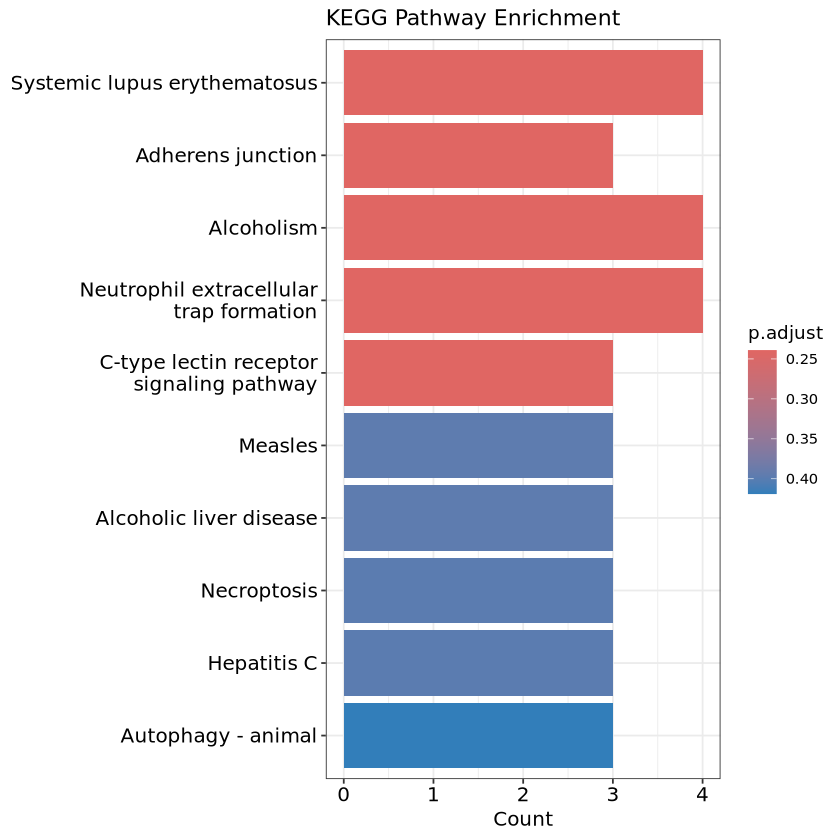

In [308]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

**Aging1**

In [309]:
entrez_ids <- bitr(image_Aging1_sig_gene$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(image_Aging1_sig_gene$gene_id, fromType = "ENSEMBL", toType = "ENTREZID", :
"1.55% of input gene IDs are fail to map..."


In [310]:
kegg_enrich %>% head(n=10)

category                             subcategory              
hsa05168 Human Diseases                       Infectious disease: viral
hsa00620 Metabolism                           Carbohydrate metabolism  
hsa00310 Metabolism                           Amino acid metabolism    
hsa03420 Genetic Information Processing       Replication and repair   
hsa04144 Cellular Processes                   Transport and catabolism 
hsa05204 Human Diseases                       Cancer: overview         
hsa04022 Environmental Information Processing Signal transduction      
hsa04260 Organismal Systems                   Circulatory system       
hsa05202 Human Diseases                       Cancer: overview         
hsa05415 Human Diseases                       Cardiovascular disease   
         ID       Description                             GeneRatio BgRatio 
hsa05168 hsa05168 Herpes simplex virus 1 infection        5/54      183/9440
hsa00620 hsa00620 Pyruvate metabolism                     2/54      47/9440 
hsa00310 hsa00310 Lysine degradation                      2/54      63/9440 
hsa03420 hsa03420 Nucleotide excision repair              2/54      63/9440 
hsa04144 hsa04144 Endocytosis                             4/54      252/9440
hsa05204 hsa05204 Chemical carcinogenesis - DNA adducts   2/54      71/9440 
hsa04022 hsa04022 cGMP-PKG signaling pathway              3/54      166/9440
hsa04260 hsa04260 Cardiac muscle contraction              2/54      87/9440 
hsa05202 hsa05202 Transcriptional misregulation in cancer 3/54      201/9440
hsa05415 hsa05415 Diabetic cardiomyopathy                 3/54      205/9440
         pvalue      p.adjust  qvalue    geneID                    Count
hsa05168 0.003801378 0.5892136 0.5892136 598/3105/29990/29992/8892 5    
hsa00620 0.029464358 0.6682340 0.6682340 39/97                     2    
hsa00310 0.050249719 0.6682340 0.6682340 9739/39                   2    
hsa03420 0.050249719 0.6682340 0.6682340 5431/2965                 2    
hsa04144 0.055495787 0.6682340 0.6682340 51019/10015/5590/3105     4    
hsa05204 0.062129923 0.6682340 0.6682340 6817/6799                 2    
hsa04022 0.069098501 0.6682340 0.6682340 85366/487/2768            3    
hsa04260 0.088343800 0.6682340 0.6682340 84701/487                 2    
hsa05202 0.107352312 0.6682340 0.6682340 26471/598/51274           3    
hsa05415 0.112168306 0.6682340 0.6682340 84701/487/5590            3

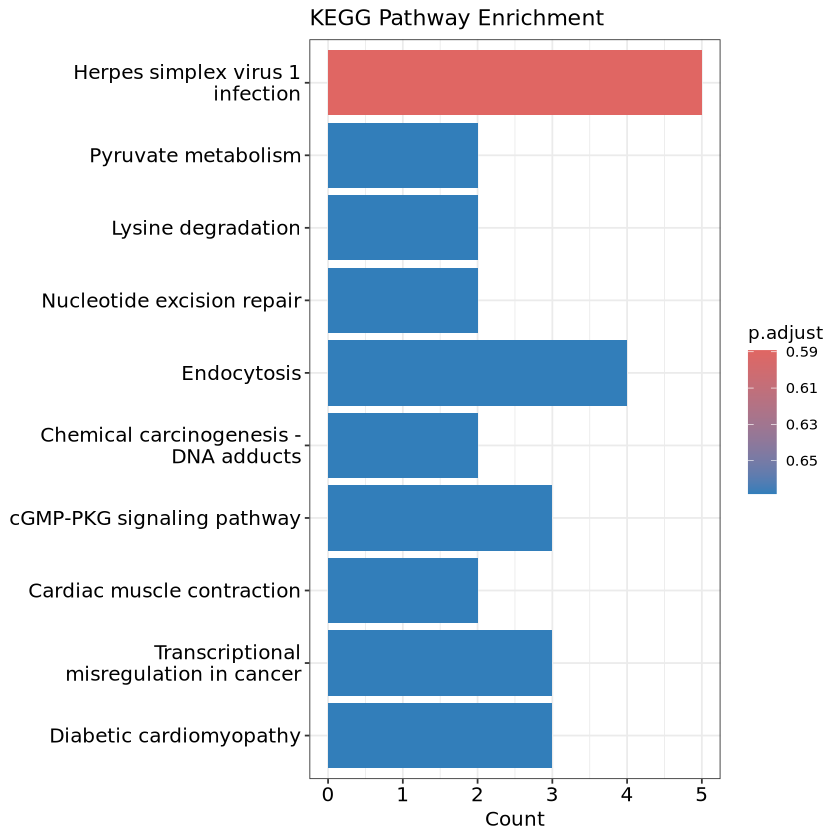

In [311]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

**Aging2**

In [312]:
entrez_ids <- bitr(image_Aging2_sig_gene$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(image_Aging2_sig_gene$gene_id, fromType = "ENSEMBL", toType = "ENTREZID", :
"1.19% of input gene IDs are fail to map..."


In [313]:
kegg_enrich %>% head(n=10)

category                             subcategory                    
hsa05417 Human Diseases                       Cardiovascular disease         
hsa03460 Genetic Information Processing       Replication and repair         
hsa04210 Cellular Processes                   Cell growth and death          
hsa05131 Human Diseases                       Infectious disease: bacterial  
hsa04140 Cellular Processes                   Transport and catabolism       
hsa01521 Human Diseases                       Drug resistance: antineoplastic
hsa04621 Organismal Systems                   Immune system                  
hsa04064 Environmental Information Processing Signal transduction            
hsa04625 Organismal Systems                   Immune system                  
hsa04660 Organismal Systems                   Immune system                  
         ID       Description                               GeneRatio BgRatio 
hsa05417 hsa05417 Lipid and atherosclerosis                 5/32      216/9440
hsa03460 hsa03460 Fanconi anemia pathway                    3/32      55/9440 
hsa04210 hsa04210 Apoptosis                                 4/32      137/9440
hsa05131 hsa05131 Shigellosis                               5/32      253/9440
hsa04140 hsa04140 Autophagy - animal                        4/32      169/9440
hsa01521 hsa01521 EGFR tyrosine kinase inhibitor resistance 3/32      80/9440 
hsa04621 hsa04621 NOD-like receptor signaling pathway       4/32      189/9440
hsa04064 hsa04064 NF-kappa B signaling pathway              3/32      105/9440
hsa04625 hsa04625 C-type lectin receptor signaling pathway  3/32      105/9440
hsa04660 hsa04660 T cell receptor signaling pathway         3/32      122/9440
         pvalue       p.adjust   qvalue     geneID                    Count
hsa05417 0.0007284577 0.05956234 0.04906737 5595/29108/598/10010/5335 5    
hsa03460 0.0008236107 0.05956234 0.04906737 79008/6119/5889           3    
hsa04210 0.0011136672 0.05956234 0.04906737 8739/5595/9020/598        4    
hsa05131 0.0014798096 0.05956234 0.04906737 5595/29108/598/5335/10318 5    
hsa04140 0.0024106348 0.06534937 0.05383472 5595/598/10010/9110       4    
hsa01521 0.0024353803 0.06534937 0.05383472 5595/598/5335             3    
hsa04621 0.0036099957 0.08302990 0.06839992 5595/29108/598/10010      4    
hsa04064 0.0052472312 0.09386714 0.07732762 9020/598/5335             3    
hsa04625 0.0052472312 0.09386714 0.07732762 5595/9020/29108           3    
hsa04660 0.0079488562 0.12304370 0.10136323 5595/9020/5335            3

In [314]:
entrez_ids %>% filter(ENTREZID%in% (kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'Lipid and atherosclerosis')) %>% pull(geneID) %>% str_split(., '/') %>% unlist)) ##  MAPK3, PYCARD, TANK BCL2L1, PLCG1

ENSEMBL         ENTREZID
1 ENSG00000102882 5595    
2 ENSG00000103490 29108   
3 ENSG00000171552 598     
4 ENSG00000136560 10010   
5 ENSG00000124181 5335

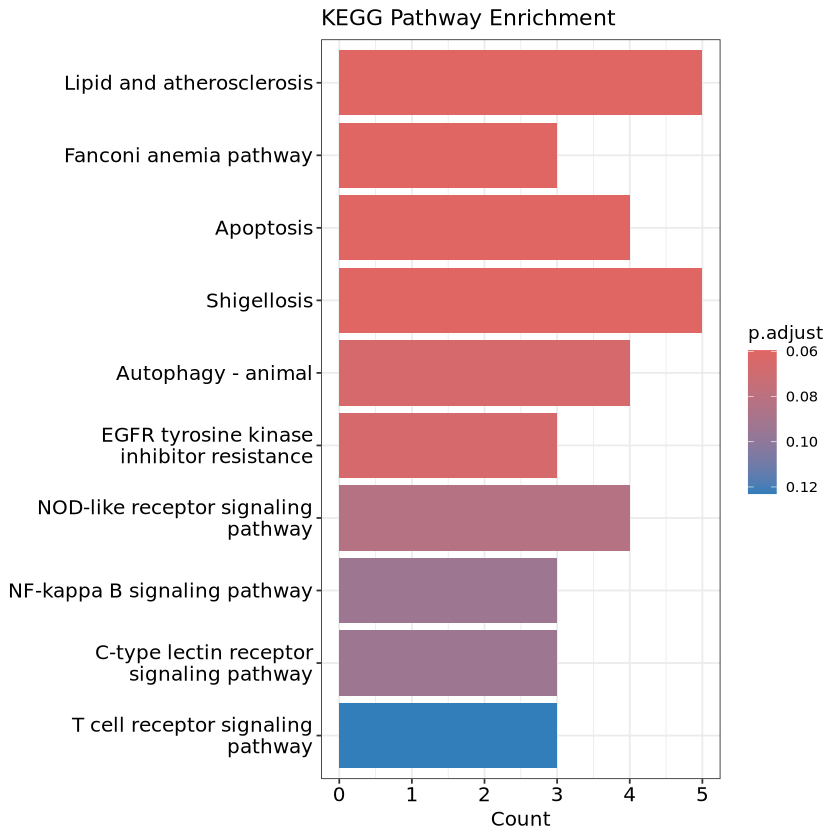

In [315]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

**Aging4**

In [316]:
entrez_ids <- bitr(image_Aging4_sig_gene$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns



In [317]:
kegg_enrich %>% head(n=10)

category                             subcategory                     
hsa04625 Organismal Systems                   Immune system                   
hsa04142 Cellular Processes                   Transport and catabolism        
hsa04934 Human Diseases                       Endocrine and metabolic disease 
hsa04390 Environmental Information Processing Signal transduction             
hsa05160 Human Diseases                       Infectious disease: viral       
hsa04630 Environmental Information Processing Signal transduction             
hsa04141 Genetic Information Processing       Folding, sorting and degradation
hsa05164 Human Diseases                       Infectious disease: viral       
hsa00020 Metabolism                           Carbohydrate metabolism         
hsa00630 Metabolism                           Carbohydrate metabolism         
         ID       Description                                 GeneRatio
hsa04625 hsa04625 C-type lectin receptor signaling pathway    2/25     
hsa04142 hsa04142 Lysosome                                    2/25     
hsa04934 hsa04934 Cushing syndrome                            2/25     
hsa04390 hsa04390 Hippo signaling pathway                     2/25     
hsa05160 hsa05160 Hepatitis C                                 2/25     
hsa04630 hsa04630 JAK-STAT signaling pathway                  2/25     
hsa04141 hsa04141 Protein processing in endoplasmic reticulum 2/25     
hsa05164 hsa05164 Influenza A                                 2/25     
hsa00020 hsa00020 Citrate cycle (TCA cycle)                   1/25     
hsa00630 hsa00630 Glyoxylate and dicarboxylate metabolism     1/25     
         BgRatio  pvalue     p.adjust  qvalue    geneID      Count
hsa04625 105/9440 0.03113075 0.4784738 0.4784738 51561/6773  2    
hsa04142 133/9440 0.04785462 0.4784738 0.4784738 1510/8546   2    
hsa04934 155/9440 0.06282154 0.4784738 0.4784738 3776/6934   2    
hsa04390 157/9440 0.06425356 0.4784738 0.4784738 654/6934    2    
hsa05160 159/9440 0.06569682 0.4784738 0.4784738 439996/6773 2    
hsa04630 168/9440 0.07232664 0.4784738 0.4784738 51561/6773  2    
hsa04141 171/9440 0.07458421 0.4784738 0.4784738 56605/81567 2    
hsa05164 173/9440 0.07610207 0.4784738 0.4784738 3838/6773   2    
hsa00020 30/9440  0.07658558 0.4784738 0.4784738 1431        1    
hsa00630 32/9440  0.08148588 0.4784738 0.4784738 1431        1

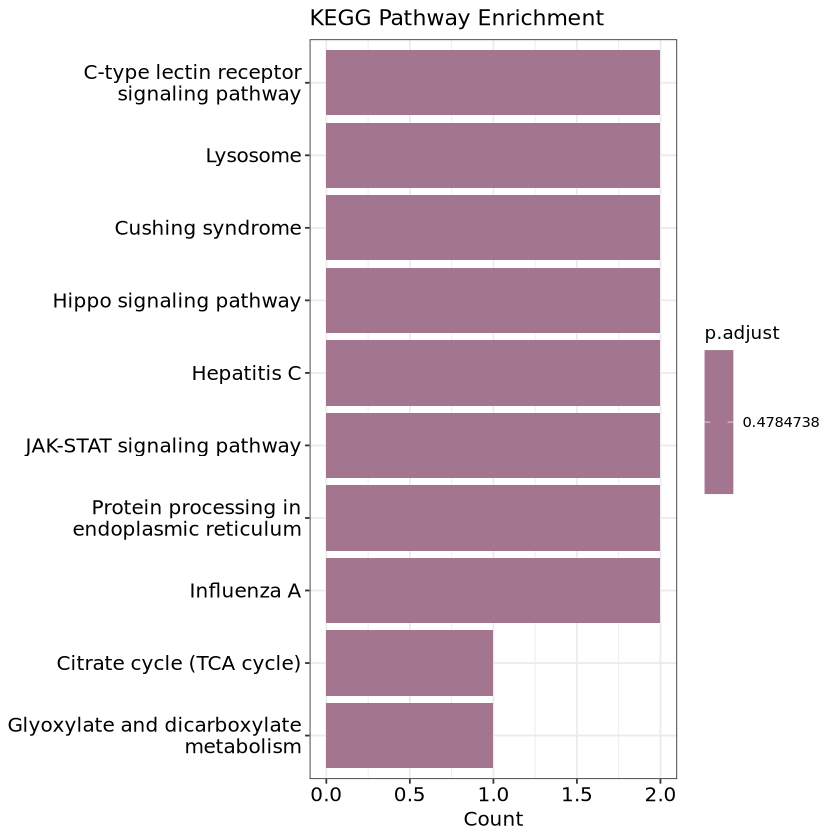

In [318]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

## Other image traits are not enriched in Autophagy pathways

## image_AD1+Aging5

In [242]:
image_AD1_Aging5_xQTL_ego <- enrichGO(
  gene          = AD1_Aging5_sig_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [243]:
head(image_AD1_Aging5_xQTL_ego, n=5)

ID         Description                                        
GO:0071168 GO:0071168 protein localization to chromatin                  
GO:0034502 GO:0034502 protein localization to chromosome                 
GO:0061644 GO:0061644 protein localization to CENP-A containing chromatin
GO:0051893 GO:0051893 regulation of focal adhesion assembly              
GO:0090109 GO:0090109 regulation of cell-substrate junction assembly     
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0071168 6/183     60/21261  1.275214e-05 0.01430135 0.01312365
GO:0034502 8/183     127/21261 1.448544e-05 0.01430135 0.01312365
GO:0061644 4/183     18/21261  1.478940e-05 0.01430135 0.01312365
GO:0051893 6/183     70/21261  3.110390e-05 0.01586753 0.01456085
GO:0090109 6/183     70/21261  3.110390e-05 0.01586753 0.01456085
           geneID                                                                                                                         
GO:0071168 ENSG00000181555/ENSG00000105229/ENSG00000273542/ENSG00000197061/ENSG00000278463/ENSG00000275126                                
GO:0034502 ENSG00000181555/ENSG00000254093/ENSG00000258724/ENSG00000105229/ENSG00000273542/ENSG00000197061/ENSG00000278463/ENSG00000275126
GO:0061644 ENSG00000273542/ENSG00000197061/ENSG00000278463/ENSG00000275126                                                                
GO:0051893 ENSG00000149177/ENSG00000108861/ENSG00000198728/ENSG00000169756/ENSG00000044524/ENSG00000035403                                
GO:0090109 ENSG00000149177/ENSG00000108861/ENSG00000198728/ENSG00000169756/ENSG00000044524/ENSG00000035403                                
           Count
GO:0071168 6    
GO:0034502 8    
GO:0061644 4    
GO:0051893 6    
GO:0090109 6

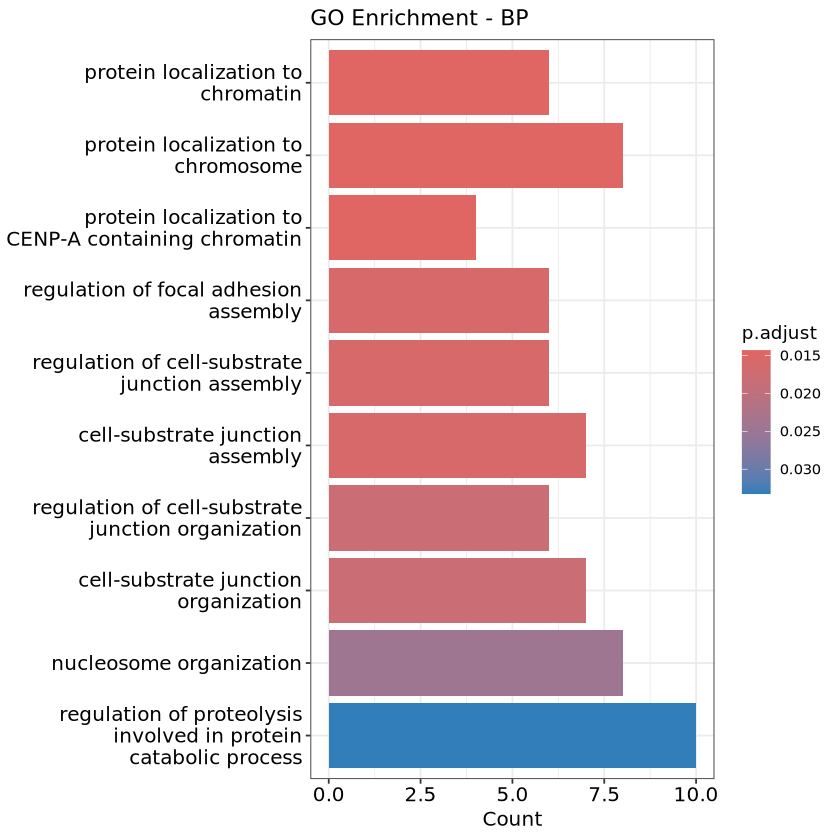

In [244]:
barplot(image_AD1_Aging5_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [245]:
image_AD1_Aging5_xQTL_ego_cc <- enrichGO(
  gene          = AD1_Aging5_sig_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [246]:
head(image_AD1_Aging5_xQTL_ego_cc, n=5)

ID         Description                         GeneRatio BgRatio  
GO:0043505 GO:0043505 CENP-A containing nucleosome        4/192     18/22568 
GO:0061638 GO:0061638 CENP-A containing chromatin         4/192     18/22568 
GO:0034506 GO:0034506 chromosome, centromeric core domain 4/192     20/22568 
GO:0000786 GO:0000786 nucleosome                          6/192     137/22568
GO:1904813 GO:1904813 ficolin-1-rich granule lumen        6/192     150/22568
           pvalue       p.adjust    qvalue     
GO:0043505 1.415197e-05 0.002214783 0.002152589
GO:0061638 1.415197e-05 0.002214783 0.002152589
GO:0034506 2.211062e-05 0.002306875 0.002242095
GO:0000786 1.146498e-03 0.089713493 0.087194214
GO:1904813 1.821725e-03 0.114039976 0.110837576
           geneID                                                                                         
GO:0043505 ENSG00000273542/ENSG00000197061/ENSG00000278463/ENSG00000275126                                
GO:0061638 ENSG00000273542/ENSG00000197061/ENSG00000278463/ENSG00000275126                                
GO:0034506 ENSG00000273542/ENSG00000197061/ENSG00000278463/ENSG00000275126                                
GO:0000786 ENSG00000233822/ENSG00000273542/ENSG00000286522/ENSG00000197061/ENSG00000278463/ENSG00000275126
GO:1904813 ENSG00000178035/ENSG00000164733/ENSG00000167658/ENSG00000204435/ENSG00000204389/ENSG00000035403
           Count
GO:0043505 4    
GO:0061638 4    
GO:0034506 4    
GO:0000786 6    
GO:1904813 6

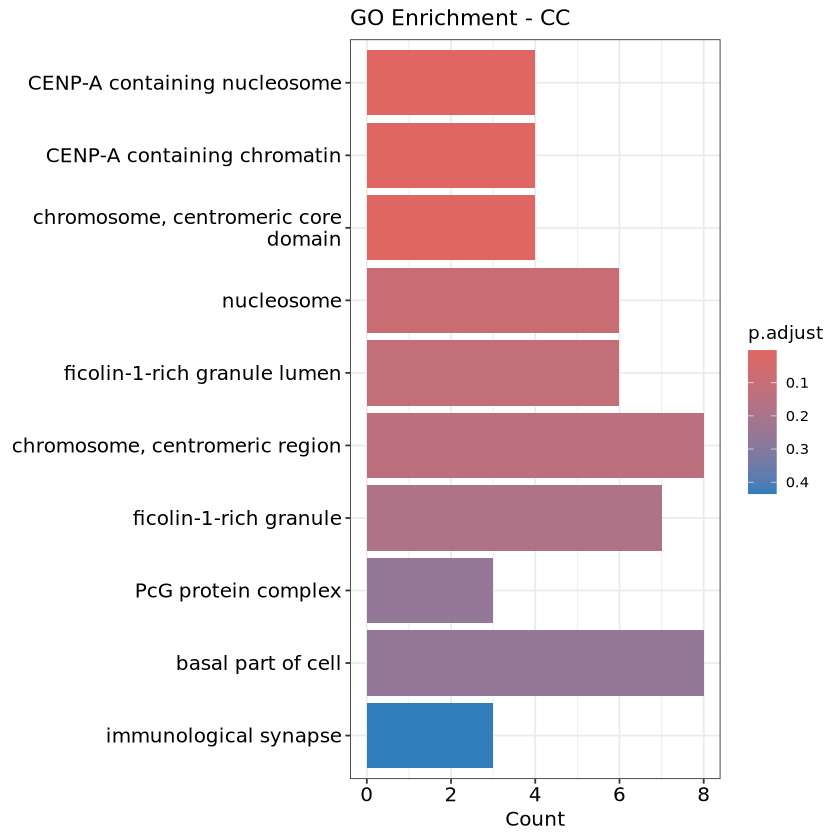

In [247]:
barplot(image_AD1_Aging5_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [248]:
image_AD1_Aging5_xQTL_ego_mf <- enrichGO(
  gene          = AD1_Aging5_sig_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [249]:
head(image_AD1_Aging5_xQTL_ego_mf, n=10)

ID        
GO:0030527 GO:0030527
GO:0045296 GO:0045296
GO:0031625 GO:0031625
GO:0044389 GO:0044389
GO:0016717 GO:0016717
GO:0038177 GO:0038177
GO:0061665 GO:0061665
GO:0019199 GO:0019199
GO:0008013 GO:0008013
GO:0061659 GO:0061659
           Description                                                                                                                                                  
GO:0030527 structural constituent of chromatin                                                                                                                          
GO:0045296 cadherin binding                                                                                                                                             
GO:0031625 ubiquitin protein ligase binding                                                                                                                             
GO:0044389 ubiquitin-like protein ligase binding                                                                                                                        
GO:0016717 oxidoreductase activity, acting on paired donors, with oxidation of a pair of donors resulting in the reduction of molecular oxygen to two molecules of water
GO:0038177 death receptor agonist activity                                                                                                                              
GO:0061665 SUMO ligase activity                                                                                                                                         
GO:0019199 transmembrane receptor protein kinase activity                                                                                                               
GO:0008013 beta-catenin binding                                                                                                                                         
GO:0061659 ubiquitin-like protein ligase activity                                                                                                                       
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0030527 6/192     101/21059 0.0003283681 0.06263620 0.06023948
GO:0045296 11/192    359/21059 0.0004773032 0.06263620 0.06023948
GO:0031625 11/192    363/21059 0.0005234223 0.06263620 0.06023948
GO:0044389 11/192    382/21059 0.0007965847 0.07149347 0.06875783
GO:0016717 2/192     10/21059  0.0035463585 0.25462854 0.24488539
GO:0038177 2/192     14/21059  0.0070016848 0.37118363 0.35698059
GO:0061665 2/192     15/21059  0.0080306930 0.37118363 0.35698059
GO:0019199 4/192     88/21059  0.0086119063 0.37118363 0.35698059
GO:0008013 4/192     90/21059  0.0093054392 0.37118363 0.35698059
GO:0061659 10/192    464/21059 0.0103864450 0.37287338 0.35860568
           geneID                                                                                                                                                                         
GO:0030527 ENSG00000233822/ENSG00000273542/ENSG00000286522/ENSG00000197061/ENSG00000278463/ENSG00000275126                                                                                
GO:0045296 ENSG00000241973/ENSG00000146648/ENSG00000167658/ENSG00000213719/ENSG00000149177/ENSG00000286522/ENSG00000204389/ENSG00000204217/ENSG00000072518/ENSG00000035403/ENSG00000184640
GO:0031625 ENSG00000100567/ENSG00000050130/ENSG00000147324/ENSG00000146648/ENSG00000105229/ENSG00000100106/ENSG00000196230/ENSG00000204389/ENSG00000204463/ENSG00000166272/ENSG00000035403
GO:0044389 ENSG00000100567/ENSG00000050130/ENSG00000147324/ENSG00000146648/ENSG00000105229/ENSG00000100106/ENSG00000196230/ENSG00000204389/ENSG00000204463/ENSG00000166272/ENSG00000035403
GO:0016717 ENSG00000134824/ENSG00000149485                                                                                                                                                
GO:0038177 ENSG00000204389/ENSG00000232810                    

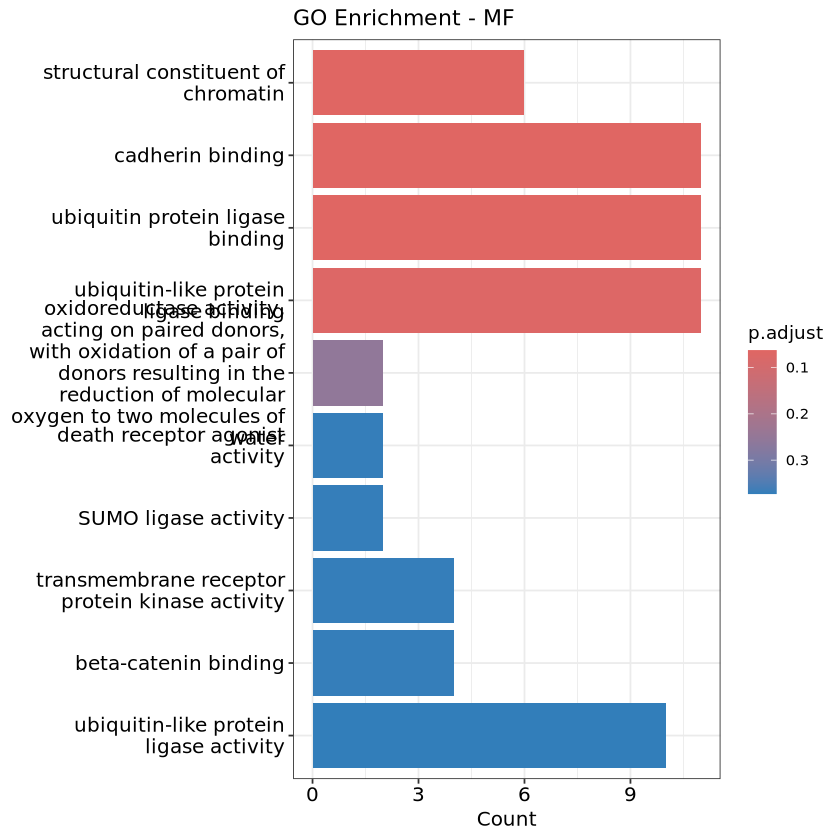

In [250]:
barplot(image_AD1_Aging5_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

## GSEA

In [251]:
might be done after I got TWAS z score...

ERROR: Error in parse(text = input): <text>:1:7: unexpected symbol
1: might be
          ^
